<a href="https://colab.research.google.com/github/ferrazzijk/Predicting-ISBE-Summative-Desgination-Rating/blob/master/Predicting_ISBE_Summative_Designation_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summative Designation Model Prediction**

The data provided is provided compliments of the Illinois State Board of Education. We are examining the report card of schools and districts in Illinois for the 18-19 school year and training a model to predict the Summative Designation rating. 

The original data set can be found [here](https://www.isbe.net/_layouts/Download.aspx?SourceUrl=/Documents/2019-Report-Card-Public-Data-Set.xlsx).

A Glossary of Terms can be found [here](https://www.isbe.net/Documents/2019-Report-Card-Glossary-Terms.pdf).

The data set was chosen out of direct personal relation with it. I was a teacher at a school in the data set, A. Vito Martinez Middle School, from the 2011-2012 school year through the 2018-2019 school year. 

# **Table of Contents**
1. [Imports & Reading Dataset ](#1)
2. [Data Exploration & Cleaning](#2)

  a. [Initial Missing Value Check](#3)

  b. [Narrowing Down of General Columns](#4)

  c. [Narrowing Down of Financial Columns](#5)

  d. [Narrowing Down of ELA Math Science Columns](#6)

  e. [Narrowing Down of IAR Columns](#7)

  f. [Missing Data Continued](#8)

  g. [Data Distributions & Outliers](#9)

  h. [Correlations](#10)

3. [Prep for Building illinois_df Models](#11)

4. [Classification Models illinois_df](#12)

  a. [Logistic Regression](#13)

  b. [Random Forest](#14)

  c. [KNN Unweighted](#15)

  d. [KNN Weighted](#16)

  e. [Support Vector Machine](#17)

  f. [Gradient Boosting](#18)

  g. [Ridge](#19)

5. [Regression Models illinois_df](#20)

  a. [KNN Unweighted](#21)

  b. [KNN Weighted](#22)

  c. [Random Forest](#23)

  d. [Support Vector Machine](#24)

6. [Prep for focused_illinois_df Models](#25)

7. [Classifiation Models focused_illinois_df](#26)

  a. [Logistic Regression](#27)

  b. [Random Forest](#28)

  c. [KNN Unweighted](#29)

  d. [KNN Weighted](#30)

  e. [Support Vector Machine](#31)

  f. [Gradient Boosting](#32)

8. [Regression Models focused_illinois_df](#33)

  a. [KNN Unweighted](#34)

  b. [KNN Weighted](#35)

  c. [Random Forest](#36)

  d. [Support Vector Machine](#37)

9. [Prep for illinois_df Models with Log(y)](#38)

10. [Classification Models illinois_df Log(y)](#39)

  a. [Logistic Regression](#40)

  b. [Random Forest](#41)

  c. [KNN Unweighted](#42)

  d. [KNN Weighted](#43)

  e. [Support Vector Machine](#44)

  f. [Gradient Boosting](#45)

  g. [Ridge](#46)

11. [Model Comparisons](#47)

  a. [Data Frame Creation for Model Comparisons](#48)

  b. [Classification Model Comparisons](#49)

  c. [Regression Model Comparisons](#50)

  d. [Confusion Matrices](#51)

12. [Conclusion](#52)

# **Imports & Reading Dataset** <a name="1"></a>

In [ ]:
#necessary imports
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt

from scipy.stats import jarque_bera, normaltest

from sklearn import neighbors, metrics, svm, ensemble
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV, ElasticNetCV, RidgeClassifierCV
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVR

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
url = 'https://raw.githubusercontent.com/ferrazzijk/Unsupervised-Learning-Capstone/master/2018-2019%20Illinois%20State%20Board%20of%20Ed%20Report%20Card.csv'
df = pd.read_csv(url, encoding='cp1252')


df.head()

,RCDTS,Type,School Name,District,City,County,District Type,District Size,School Type,Grades Served,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,% 8th Grade Passing Algebra 1,Student Attendance Rate,Student Mobility Rate,Student Mobility Rate - Male,Student Mobility Rate - Female,Student Mobility Rate - White,Student Mobility Rate - Black or African American,Student Mobility Rate - Hispanic or Latino,Student Mobility Rate - Asian,Student Mobility Rate - Native Hawaiian or Other Pacific Islander,Student Mobility Rate - American Indian or Alaska Native,...,% SAT Math Participation - Female,% SAT Math Participation - White,% SAT Math Participation - Black or African American,% SAT Math Participation - Hispanic or Latino,% SAT Math Participation - Asian,% SAT Math Participation - Native Hawaiian or Other Pacific Islander,% SAT Math Participation - American Indian or Alaska Native,% SAT Math Participation - Two or More Race,% SAT Math Participation - Children with Disabilities,% SAT Math Participation - IEP,% SAT Math Participation - EL,% SAT Math Participation - Low Income,# Students SAT ELA Participation,# SAT ELA Participation - Female,# SAT ELA Participation - Male,# SAT ELA Participation - White,# SAT ELA Participation - Black or African American,# SAT ELA Participation - Hispanic or Latino,# SAT ELA Participation - Asian,# SAT ELA Participation - Native Hawaiian or Other Pacific Islander,# SAT ELA Participation - American Indian or Alaska Native,# SAT ELA Participation - Two or More Race,# SAT ELA Participation - Children with Disabilities,# SAT ELA Participation - IEP,# SAT ELA Participation - EL,# SAT ELA Participation - Low Income,% SAT ELA Participation,% SAT ELA Participation - Female,% SAT ELA Participation - Male,% SAT ELA Participation - White,% SAT ELA Participation - Black or African American,% SAT ELA Participation - Hispanic or Latino,% SAT ELA Participation - Asian,% SAT ELA Participation - Native Hawaiian or Other Pacific Islander,% SAT ELA Participation - American Indian or Alaska Native,% SAT ELA Participation - Two or More Race,% SAT ELA Participation - Children with Disabilities,% SAT ELA Participation - IEP,% SAT ELA Participation - EL,% SAT ELA Participation - Low Income
0,010010010260001,School,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,239,95.4,NaN,0.4,0.8,NaN,NaN,3.3,16.7,1.7,16.7,46.4,NaN,167.0,45.2,95.1,7.9,8.2,7.6,8.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,010010010262002,School,Seymour Elementary School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,ELEMENTARY,PK K 1 2 3 4 5 6,Commendable,All Students,Schoolwide Title I Program,47.0,94.0,316,94.6,0.3,NaN,0.3,NaN,NaN,4.7,19.6,0.3,19.6,51.9,NaN,167.0,NaN,96.0,7.5,8.6,6.1,7.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,010010020260001,School,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,288,97.6,0.3,NaN,NaN,NaN,NaN,2.1,25.

# **Data Exploration & Cleaning** <a name="2"></a>

In [ ]:
#check shape
df.shape

(4738, 2539)

In [ ]:
#create a copy of df, in case original df is desired later
illinois_df = df
illinois_df.head()

#drop RCDTS columns. It's a code identifier for region, county, district type, 
# & school. This information can be seen elsewhere. Also drop duplicate columns 
#'State Senate District.1', 'State Representative District.1'
illinois_df.drop(columns=['RCDTS', 'State Senate District.1',
       'State Representative District.1', 
       'Five Essential Survey Ambitious Instruction.1'], inplace=True)

illinois_df

,Type,School Name,District,City,County,District Type,District Size,School Type,Grades Served,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,% 8th Grade Passing Algebra 1,Student Attendance Rate,Student Mobility Rate,Student Mobility Rate - Male,Student Mobility Rate - Female,Student Mobility Rate - White,Student Mobility Rate - Black or African American,Student Mobility Rate - Hispanic or Latino,Student Mobility Rate - Asian,Student Mobility Rate - Native Hawaiian or Other Pacific Islander,Student Mobility Rate - American Indian or Alaska Native,Student Mobility Rate - Two or More Races,...,% SAT Math Participation - Female,% SAT Math Participation - White,% SAT Math Participation - Black or African American,% SAT Math Participation - Hispanic or Latino,% SAT Math Participation - Asian,% SAT Math Participation - Native Hawaiian or Other Pacific Islander,% SAT Math Participation - American Indian or Alaska Native,% SAT Math Participation - Two or More Race,% SAT Math Participation - Children with Disabilities,% SAT Math Participation - IEP,% SAT Math Participation - EL,% SAT Math Participation - Low Income,# Students SAT ELA Participation,# SAT ELA Participation - Female,# SAT ELA Participation - Male,# SAT ELA Participation - White,# SAT ELA Participation - Black or African American,# SAT ELA Participation - Hispanic or Latino,# SAT ELA Participation - Asian,# SAT ELA Participation - Native Hawaiian or Other Pacific Islander,# SAT ELA Participation - American Indian or Alaska Native,# SAT ELA Participation - Two or More Race,# SAT ELA Participation - Children with Disabilities,# SAT ELA Participation - IEP,# SAT ELA Participation - EL,# SAT ELA Participation - Low Income,% SAT ELA Participation,% SAT ELA Participation - Female,% SAT ELA Participation - Male,% SAT ELA Participation - White,% SAT ELA Participation - Black or African American,% SAT ELA Participation - Hispanic or Latino,% SAT ELA Participation - Asian,% SAT ELA Participation - Native Hawaiian or Other Pacific Islander,% SAT ELA Participation - American Indian or Alaska Native,% SAT ELA Participation - Two or More Race,% SAT ELA Participation - Children with Disabilities,% SAT ELA Participation - IEP,% SAT ELA Participation - EL,% SAT ELA Participation - Low Income
0,School,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,239,95.4,NaN,0.4,0.8,NaN,NaN,3.3,16.7,1.7,16.7,46.4,NaN,167.0,45.2,95.1,7.9,8.2,7.6,8.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,School,Seymour Elementary School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,ELEMENTARY,PK K 1 2 3 4 5 6,Commendable,All Students,Schoolwide Title I Program,47.0,94.0,316,94.6,0.3,NaN,0.3,NaN,NaN,4.7,19.6,0.3,19.6,51.9,NaN,167.0,NaN,96.0,7.5,8.6,6.1,7.3,NaN,NaN,NaN,NaN,NaN,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,School,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,288,97.6,0.3,NaN,NaN,NaN,NaN,2.1,25.3,N

In [ ]:
#Entities that do not have a summative designation listed are either an entity 
# that does not receive a summative designation or an entity with insufficient 
# size or data to meet the n-size rules for summative designation calculations. 
# Drop these rows since this will be target variable.
illinois_df.dropna(subset=['Summative Designation'], inplace = True)
illinois_df

,Type,School Name,District,City,County,District Type,District Size,School Type,Grades Served,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,% 8th Grade Passing Algebra 1,Student Attendance Rate,Student Mobility Rate,Student Mobility Rate - Male,Student Mobility Rate - Female,Student Mobility Rate - White,Student Mobility Rate - Black or African American,Student Mobility Rate - Hispanic or Latino,Student Mobility Rate - Asian,Student Mobility Rate - Native Hawaiian or Other Pacific Islander,Student Mobility Rate - American Indian or Alaska Native,Student Mobility Rate - Two or More Races,...,% SAT Math Participation - Female,% SAT Math Participation - White,% SAT Math Participation - Black or African American,% SAT Math Participation - Hispanic or Latino,% SAT Math Participation - Asian,% SAT Math Participation - Native Hawaiian or Other Pacific Islander,% SAT Math Participation - American Indian or Alaska Native,% SAT Math Participation - Two or More Race,% SAT Math Participation - Children with Disabilities,% SAT Math Participation - IEP,% SAT Math Participation - EL,% SAT Math Participation - Low Income,# Students SAT ELA Participation,# SAT ELA Participation - Female,# SAT ELA Participation - Male,# SAT ELA Participation - White,# SAT ELA Participation - Black or African American,# SAT ELA Participation - Hispanic or Latino,# SAT ELA Participation - Asian,# SAT ELA Participation - Native Hawaiian or Other Pacific Islander,# SAT ELA Participation - American Indian or Alaska Native,# SAT ELA Participation - Two or More Race,# SAT ELA Participation - Children with Disabilities,# SAT ELA Participation - IEP,# SAT ELA Participation - EL,# SAT ELA Participation - Low Income,% SAT ELA Participation,% SAT ELA Participation - Female,% SAT ELA Participation - Male,% SAT ELA Participation - White,% SAT ELA Participation - Black or African American,% SAT ELA Participation - Hispanic or Latino,% SAT ELA Participation - Asian,% SAT ELA Participation - Native Hawaiian or Other Pacific Islander,% SAT ELA Participation - American Indian or Alaska Native,% SAT ELA Participation - Two or More Race,% SAT ELA Participation - Children with Disabilities,% SAT ELA Participation - IEP,% SAT ELA Participation - EL,% SAT ELA Participation - Low Income
0,School,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,239,95.4,NaN,0.4,0.8,NaN,NaN,3.3,16.7,1.7,16.7,46.4,NaN,167.0,45.2,95.1,7.9,8.2,7.6,8.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,School,Seymour Elementary School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,ELEMENTARY,PK K 1 2 3 4 5 6,Commendable,All Students,Schoolwide Title I Program,47.0,94.0,316,94.6,0.3,NaN,0.3,NaN,NaN,4.7,19.6,0.3,19.6,51.9,NaN,167.0,NaN,96.0,7.5,8.6,6.1,7.3,NaN,NaN,NaN,NaN,NaN,11.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,School,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,288,97.6,0.3,NaN,NaN,NaN,NaN,2.1,25.3,N

###**Initial Missing Value Check** <a name="3"></a>

In [ ]:
#initial inspection shows numerous NaN values, so let's drop columns using 
#.dropna's thresh parameter
illinois_df.dropna(thresh =illinois_df.shape[0]*0.5, how = 'any', axis = 1, inplace= True )

illinois_df

,Type,School Name,District,City,County,District Type,District Size,School Type,Grades Served,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Mobility Rate - Male,Student Mobility Rate - Female,Student Mobility Rate - White,Student Mobility Rate - Black or African American,Student Mobility Rate - Hispanic or Latino,Student Mobility Rate - Two or More Races,Student Mobility Rate - Children with Disabilities,Student Mobility Rate - EL,Student Mobility Rate - IEP,Student Mobility Rate - Low Income,Chronically Truant Students,Student Chronic Truancy Rate,...,Non-IEP students IAR ELA Level 3 - Grade 5,Non-IEP students IAR ELA Level 4 - Grade 5,Non-IEP students IAR ELA Level 5 - Grade 5,Non-IEP students IAR Mathematics Level 1 - Grade 5,Non-IEP students IAR Mathematics Level 2 - Grade 5,Non-IEP students IAR Mathematics Level 3 - Grade 5,Non-IEP students IAR Mathematics Level 4 - Grade 5,Non-IEP students IAR Mathematics Level 5 - Grade 5,# Students IAR Math Participation,# Female Students IAR Math Participation,# Male Students IAR Math Participation,# White Students IAR Math Participation,# Hispanic or Latino Students IAR Math Participation,# Children with Disabilities Students IAR Math Participation,# IEP Students IAR Math Participation,# Low Income Students IAR Math Participation,% Students IAR Math Participation,% Female Students IAR Math Participation,% Male Students IAR Math Participation,% White Students IAR Math Participation,% Hispanic or Latino Students IAR Math Participation,% Children with Disabilities Students IAR Math Participation,% IEP Students IAR Math Participation,% Low Income Students IAR Math Participation,# Students IAR ELA Participation,# Female Students IAR ELA Participation,# Male Students IAR ELA Participation,# White Students IAR ELA Participation,# Hispanic or Latino Students IAR ELA Participation,# Children with Disabilities Students IAR ELA Participation,# IEP Students IAR ELA Participation,# Low Income Students IAR ELA Participation,% Students IAR ELA Participation,% Female Students IAR ELA Participation,% Male Students IAR ELA Participation,% White Students IAR ELA Participation,% Hispanic or Latino Students IAR ELA Participation,% Children with Disabilities Students IAR ELA Participation,% IEP Students IAR ELA Participation,% Low Income Students IAR ELA Participation
0,School,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All Students,"Eligible, but Not a Participant in Title I Pro...",47.0,94.0,239,95.4,NaN,0.4,0.8,3.3,16.7,1.7,16.7,46.4,NaN,167.0,95.1,7.9,8.2,7.6,8.2,NaN,NaN,NaN,6.9,NaN,6.9,10.0,17.0,7.2,...,41.0,47.5,0.0,1.6,24.6,34.4,37.7,1.6,222.0,110.0,112.0,187.0,20.0,36.0,28.0,19.0,99.6,99.1,100.0,99.5,100.0,97.3,96.6,95.0,222.0,110.0,112.0,187.0,20.0,36.0,28.0,19.0,99.6,99.1,100.0,99.5,100.0,97.3,96.6,95.0
1,School,Seymour Elementary School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,ELEMENTARY,PK K 1 2 3 4 5 6,Commendable,All Students,Schoolwide Title I Program,47.0,94.0,316,94.6,0.3,NaN,0.3,4.7,19.6,0.3,19.6,51.9,NaN,167.0,96.0,7.5,8.6,6.1,7.3,NaN,NaN,11.8,5.7,NaN,5.7,12.6,12.0,4.9,...,35.3,30.0,0.5,12.1,43.2,30.0,13.7,1.1,408.0,198.0,210.0,110.0,288.0,64.0,55.0,219.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,407.0,198.0,209.0,109.0,288.0,63.0,54.0,219.0,99.8,100.0,99.5,99.1,100.0,98.4,98.2,100.0
2,School,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,7 8 9 10 11 12,Commendable,All S

###**Narrowing Down of General Columns** <a name="4"></a>

The data was combined into one csv file from several Excel sheets. Therefore, a thorough investigation of smaller sections of features at a time is neccessary to check for possible data scientist error, repeated columns, and irrelevant columns. 

In [ ]:
#Find out index of last column of the general tab from the excel workbook
illinois_df.columns.get_loc('EBF Tier')

100

In [ ]:
#name general columns
general = illinois_df.columns[0:100]
general

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Grades Served',
       'Summative Designation', 'Summative Designation: Student Group(s)',
       'Title 1 Status', 'State Senate District',
       'State Representative District', '# Student Enrollment',
       '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Mobility Rate - Male',
       'Student Mobility Rate - Female', 'Student Mobility Rate - White',
       'Student Mobility Rate 

In [ ]:
#all columns are type school now, drop column
#School Type and Grades Served are Similar, drop one
illinois_df.drop(columns=['Grades Served'], inplace=True)

In [ ]:
##the CRDC numbers on Illinois’ 2019 Report Card were collected 
#in the 2015-16 school year, drop those.

#Find out index of first CRDC column
illinois_df.columns.get_loc('# CRDC Total Enrollment')

74

In [ ]:
#Find out index of last CRDC column
illinois_df.columns.get_loc('# CRDC Homicide Incident')

98

In [ ]:
#verify all CRDC columns are within the range found
crdc = illinois_df.columns[74:99]
crdc

Index(['# CRDC Total Enrollment', '# CRDC In-School Suspensions',
       '% CRDC In-School Suspensions', '# CRDC Out-of-School Suspensions',
       '% CRDC Out-of-School Suspensions', '# CRDC Expulsions',
       '% CRDC Expulsions', '# CRDC School Related Arrests',
       '% CRDC School Related Arrests', '# CRDC Referral to Law Enforcement',
       '% CRDC Referral to Law Enforcement', '# CRDC Chronic Absenteeism',
       '% CRDC Chronic Absenteeism', '# CRDC Incidents of Violence',
       '% CRDC Incidents of Violence', '# CRDC Enrolled PreK',
       '% CRDC Enrolled PreK', '# CRDC Advanced Placement Coursework',
       '% CRDC Advanced Placement Coursework', '# CRDC IB Course',
       '% CRDC IB Course', '# CRDC Dual Credit Courses',
       '% CRDC Dual Credeit Courses', '# CRDC Firearm Incident',
       '# CRDC Homicide Incident'],
      dtype='object')

In [ ]:
#drop CRDC columns
illinois_df.drop(illinois_df.iloc[:,74:99], axis = 1, inplace=True)
illinois_df.columns.get_loc('EBF Tier')

74

In [ ]:
#Title 1 Status could be utilied usefully numerically later, find out how many 
#unqiue values there are of them
illinois_df['Title 1 Status'].unique()

array(['Eligible, but Not a Participant in Title I Program',
       'Schoolwide Title I Program',
       'Targeted Assistance Title I Program', nan], dtype=object)

In [ ]:
#Assign numeric values to unique values of Title 1 Status
illinois_df.loc[illinois_df['Title 1 Status']== 'NaN', 'Title 1 Status'] = 0
illinois_df.loc[illinois_df['Title 1 Status']== 'Eligible, but Not a Participant in Title I Program', 'Title 1 Status'] = 1
illinois_df.loc[illinois_df['Title 1 Status']== 'Targeted Assistance Title I Program', 'Title 1 Status'] = 2
illinois_df.loc[illinois_df['Title 1 Status']== 'Schoolwide Title I Program', 'Title 1 Status'] = 3
illinois_df.head()

,Type,School Name,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Mobility Rate - Male,Student Mobility Rate - Female,Student Mobility Rate - White,Student Mobility Rate - Black or African American,Student Mobility Rate - Hispanic or Latino,Student Mobility Rate - Two or More Races,Student Mobility Rate - Children with Disabilities,Student Mobility Rate - EL,Student Mobility Rate - IEP,Student Mobility Rate - Low Income,Chronically Truant Students,Student Chronic Truancy Rate,Avg Class Size - Kindergarten,...,Non-IEP students IAR ELA Level 3 - Grade 5,Non-IEP students IAR ELA Level 4 - Grade 5,Non-IEP students IAR ELA Level 5 - Grade 5,Non-IEP students IAR Mathematics Level 1 - Grade 5,Non-IEP students IAR Mathematics Level 2 - Grade 5,Non-IEP students IAR Mathematics Level 3 - Grade 5,Non-IEP students IAR Mathematics Level 4 - Grade 5,Non-IEP students IAR Mathematics Level 5 - Grade 5,# Students IAR Math Participation,# Female Students IAR Math Participation,# Male Students IAR Math Participation,# White Students IAR Math Participation,# Hispanic or Latino Students IAR Math Participation,# Children with Disabilities Students IAR Math Participation,# IEP Students IAR Math Participation,# Low Income Students IAR Math Participation,% Students IAR Math Participation,% Female Students IAR Math Participation,% Male Students IAR Math Participation,% White Students IAR Math Participation,% Hispanic or Latino Students IAR Math Participation,% Children with Disabilities Students IAR Math Participation,% IEP Students IAR Math Participation,% Low Income Students IAR Math Participation,# Students IAR ELA Participation,# Female Students IAR ELA Participation,# Male Students IAR ELA Participation,# White Students IAR ELA Participation,# Hispanic or Latino Students IAR ELA Participation,# Children with Disabilities Students IAR ELA Participation,# IEP Students IAR ELA Participation,# Low Income Students IAR ELA Participation,% Students IAR ELA Participation,% Female Students IAR ELA Participation,% Male Students IAR ELA Participation,% White Students IAR ELA Participation,% Hispanic or Latino Students IAR ELA Participation,% Children with Disabilities Students IAR ELA Participation,% IEP Students IAR ELA Participation,% Low Income Students IAR ELA Participation
0,School,Seymour High School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,HIGH SCHOOL,Commendable,All Students,1,47.0,94.0,239,95.4,NaN,0.4,0.8,3.3,16.7,1.7,16.7,46.4,NaN,167.0,95.1,7.9,8.2,7.6,8.2,NaN,NaN,NaN,6.9,NaN,6.9,10.0,17.0,7.2,NaN,...,41.0,47.5,0.0,1.6,24.6,34.4,37.7,1.6,222.0,110.0,112.0,187.0,20.0,36.0,28.0,19.0,99.6,99.1,100.0,99.5,100.0,97.3,96.6,95.0,222.0,110.0,112.0,187.0,20.0,36.0,28.0,19.0,99.6,99.1,100.0,99.5,100.0,97.3,96.6,95.0
1,School,Seymour Elementary School,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,ELEMENTARY,Commendable,All Students,3,47.0,94.0,316,94.6,0.3,NaN,0.3,4.7,19.6,0.3,19.6,51.9,NaN,167.0,96.0,7.5,8.6,6.1,7.3,NaN,NaN,11.8,5.7,NaN,5.7,12.6,12.0,4.9,19.2,...,35.3,30.0,0.5,12.1,43.2,30.0,13.7,1.1,408.0,198.0,210.0,110.0,288.0,64.0,55.0,219.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,407.0,198.0,209.0,109.0,288.0,63.0,54.0,219.0,99.8,100.0,99.5,99.1,100.0,98.4,98.2,100.0
2,School,Liberty High School,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,HIGH SCHOOL,Commendable,All Students,1,47.0,94.0,288,97.6,0.3,NaN,NaN,2.1,25.3,NaN,16.3,20.5,NaN,170.0,95.8,4.1,3.9,4.3,3.8,Na

In [ ]:
#let's look at the first 50 columns for any possible condensation
illinois_df.columns[0:50]

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', 'State Representative District',
       '# Student Enrollment', '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Mobility Rate - Male',
       'Student Mobility Rate - Female', 'Student Mobility Rate - White',
       'Student Mobility Rate - Black or African Ameri

In [ ]:
#student mobility rate is the count for students who transferred in and out of 
#serving school at anyitime during school year. The additional columns broken 
#down by gender or race seem unnecessary. Drop them.

#Find index of first mobility column to drop.
illinois_df.columns.get_loc('Student Mobility Rate - Male')

27

In [ ]:
#Find index of last mobility column to drop.
illinois_df.columns.get_loc('Student Mobility Rate - Low Income')

36

In [ ]:
#drop extra mobility columns
illinois_df.drop(illinois_df.iloc[:,27:37], axis = 1, inplace=True)

In [ ]:
#check the right columns were dropped
illinois_df.columns.get_loc('Chronically Truant Students')

27

In [ ]:
#drop chronically truant students since column for rate of chronically truant
# is also present.
illinois_df.drop(columns='Chronically Truant Students', inplace=True)

In [ ]:
#The average class size columns seem repetitive. Keep overall average &
#drop sub columns of average class size.

#find index of first avg class size column to drop
illinois_df.columns.get_loc('Avg Class Size - Kindergarten')

28

In [ ]:
#find index of first avg class size column to drop
illinois_df.columns.get_loc('Avg Class Size - 5')

33

In [ ]:
#Drop specific grade class sizes and keep avg class size all grades.
illinois_df.drop(illinois_df.iloc[:,28:34], axis = 1, inplace=True)
illinois_df.columns.get_loc('Avg Class Size – All Grades')

28

In [ ]:
#not every school listed will have grade 3, so dropping the min per subjects
#grade 3 columns is a good idea.

#find where the minutes per subject grade 3 start
illinois_df.columns.get_loc('Min per Day Math Grade 3')

29

In [ ]:
#find where the minutes per subject grade 3 end
illinois_df.columns.get_loc('Min per Day Social Sciences Grade 3')

32

In [ ]:
#Drop minutes per subject grade 3
illinois_df.drop(illinois_df.iloc[:,29:33], axis = 1, inplace=True)
illinois_df.columns.get_loc('Avg Number of Days of Physical Education per Week Per Student')

29

In [ ]:
#there's many chronic absenteeism columns, let's keep overall and drop the 
#'subcolumns'.

#find where the subcolumns of absenteeism start
illinois_df.columns.get_loc('Chronic Absenteeism - Male')

33

In [ ]:
#find where the subcolumns of absenteeism end
illinois_df.columns.get_loc('Chronic Absenteeism - Low Income')

41

In [ ]:
#Drop chronic absenteeism subcolumns
illinois_df.drop(illinois_df.iloc[:,33:42], axis = 1, inplace=True)
illinois_df.columns.get_loc('Five Essential Survey Effective Leaders')

33

In [ ]:
#let's look at the first 50 columns for any possible condensation
illinois_df.columns[0:50]

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', 'State Representative District',
       '# Student Enrollment', '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Re

In [ ]:
#The 5 Essentials Survey is a Teacher, Parent, and Student climate related survey.
#Let's keep the levels & rate columns related to the survey and drop the redunudant 
#counts. Low numbered levels correspond to low level rating.
illinois_df.drop(columns=['Five Essential Survey Effective Leaders',
       'Five Essential Survey Collaborative Teachers',
       'Five Essential Survey Involved Families',
       'Five Essential Survey Supportive Environment',
       'Five Essential Survey Ambitious Instruction',],
        inplace=True)

In [ ]:
#find where the general tab ends
illinois_df.columns.get_loc('Five Essential Survey Teacher Response Rate')

38

In [ ]:
#review columns 0-38 to see if further reduction is possible
illinois_df.columns[0:39]

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', 'State Representative District',
       '# Student Enrollment', '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Re

###**Narrowing Down of Financial Columns** <a name="5"></a>

In [ ]:
#find where financial columns start
illinois_df.columns.get_loc('EBF Tier')

39

In [ ]:
#find where financial columns end
illinois_df.columns.get_loc('$ Total Per-Pupil Expenditures - Subtotal')

50

In [ ]:
#financial tab
financial = illinois_df.columns[39:51]
financial

Index(['EBF Tier', '% EBF Capacity to Meet Expectations',
       '# School Enrollment', '$ Site-Level Per-Pupil Expenditures - Federal',
       '$ Site-level Per-Pupil Expenditures - State/Local',
       '$ Site-level PEr-Pupil Expenditures - Subtotal',
       '$ District Centralized Per-Pupil Expenditure - Federal',
       '$ District Centralized Per-Pupil Expenditure - State/Local',
       '$ District Centralized Per-Pupil Expenditure - Subtotal',
       '$ Total Per-Pupil Expenditures - Federal',
       '$ Total Per-Pupil Expenditures - State/Local',
       '$ Total Per-Pupil Expenditures - Subtotal'],
      dtype='object')

While these columns have repetive sub columns, they could be useful later so we'll keep them all. 

###**Narrowing Down of ELA Math Science Columns** <a name="6"></a>

In [ ]:
#find where ELA Math Science tab starts
illinois_df.columns.get_loc('# ELA Proficiency')

51

In [ ]:
#find where ELA Math Science tab ends
illinois_df.columns.get_loc('% Science Proficiency - Low Income')

168

In [ ]:
#ela math science tab
ela_math_science = illinois_df.columns[51:169]
ela_math_science

Index(['# ELA Proficiency', '# ELA Proficiency - Male',
       '# ELA Proficiency - Female', '# ELA Proficiency - White',
       '# ELA Proficiency - Black or African American',
       '# ELA Proficiency - Hispanic or Latino',
       '# ELA Proficiency - Children with Disabilities',
       '# ELA Proficiency - IEP', '# ELA Proficiency - Low Income',
       '% ELA Proficiency',
       ...
       '# Science Proficiency - Children with Disabilities',
       '# Science Proficiency - IEP', '# Science Proficiency - Low Income',
       '% Science Proficiency', '% Science Proficiency - Male',
       '% Science Proficiency - Female', '% Science Proficiency - White',
       '% Science Proficiency - Children with Disabilities',
       '% Science Proficiency - IEP', '% Science Proficiency - Low Income'],
      dtype='object', length=118)

In [ ]:
#Keep overal % proficiency scores and drop the sub columns of proficiency
#find index of '% ELA Proficiency
illinois_df.columns.get_loc('% ELA Proficiency')

60

In [ ]:

#drop after overall ELA proficiency until % ELA proficiency
illinois_df.drop(illinois_df.iloc[:,51:60], axis = 1, inplace=True)

In [ ]:
#make sure we didn't drop '% ELA Proficiency
illinois_df.columns.get_loc('% ELA Proficiency')

51

In [ ]:
#find index of '% Math Proficiency
illinois_df.columns.get_loc('% Math Proficiency')

69

In [ ]:
#drop columns from % ELA Profciency until %Math Proficiency
illinois_df.drop(illinois_df.iloc[:,52:69], axis = 1, inplace=True)

In [ ]:
#make sure we didn't drop '% Math Proficiency
illinois_df.columns.get_loc('% Math Proficiency')

52

In [ ]:
#find index of '% Science Proficiency
illinois_df.columns.get_loc('% Science Proficiency')

136

In [ ]:
#drop columns from % Math Profciency until %Science Proficiency
illinois_df.drop(illinois_df.iloc[:,53:136], axis = 1, inplace=True)

In [ ]:
#make sure we didn't drop '% Science Proficiency
illinois_df.columns.get_loc('% Science Proficiency')

53

In [ ]:
#Find index where ELA Math Science Tab ends
illinois_df.columns.get_loc('% Science Proficiency - Low Income')

59

In [ ]:
#drop columns from 1 after % Science Proficiency through end of IAR Tab
illinois_df.drop(illinois_df.iloc[:,54:60], axis = 1, inplace=True)

In [ ]:
#make sure we didn't drop '% Science Proficiency
illinois_df.columns.get_loc('% Science Proficiency')

53

###**Narrowing Down of IAR Columns** <a name="7"></a>

In [ ]:
#check that IAR sheet starts at index 48
illinois_df.columns.get_loc('All students IAR ELA Level 1 - Grade 3')

54

In [ ]:
#iar tab
iar = illinois_df.columns[54:]
iar

Index(['All students IAR ELA Level 1 - Grade 3',
       'All students IAR ELA Level 2 - Grade 3',
       'All students IAR ELA Level 3 - Grade 3',
       'All students IAR ELA Level 4 - Grade 3',
       'All students IAR ELA Level 5 - Grade 3',
       'All students IAR Mathematics Level 1 - Grade 3',
       'All students IAR Mathematics Level 2 - Grade 3',
       'All students IAR Mathematics Level 3 - Grade 3',
       'All students IAR Mathematics Level 4 - Grade 3',
       'All students IAR Mathematics Level 5 - Grade 3',
       ...
       '# IEP Students IAR ELA Participation',
       '# Low Income Students IAR ELA Participation',
       '% Students IAR ELA Participation',
       '% Female Students IAR ELA Participation',
       '% Male Students IAR ELA Participation',
       '% White Students IAR ELA Participation',
       '% Hispanic or Latino Students IAR ELA Participation',
       '% Children with Disabilities Students IAR ELA Participation',
       '% IEP Students IAR ELA Parti

In [ ]:
#In order to be considered proficienct on IAR, students, must fall into Level 4
# or 5. This information was reported in the ELA Math Science tab so we will 
#drop leveled scores here. We will keep the percent of students who participated 
#in ElA & Math IAR assessment.

#find index of %Students IAR Math Participation
illinois_df.columns.get_loc('% Students IAR Math Participation')

162

In [ ]:
#drop columns from beginning of IAR tab until % Students IAR Math Participation
illinois_df.drop(illinois_df.iloc[:,54:162], axis = 1, inplace=True)

In [ ]:
#make sure % Students IAR Math Participation wasn't dropped
illinois_df.columns.get_loc('% Students IAR Math Participation')

54

In [ ]:
#find index of % Students IAR ELA Participation
illinois_df.columns.get_loc('% Students IAR ELA Participation')

70

In [ ]:
#drop from % who participated in math to % who participated in ELA
illinois_df.drop(illinois_df.iloc[:,55:70], axis = 1, inplace=True)

In [ ]:
#make sure % Students IAR ELA Participation wasn't dropped
illinois_df.columns.get_loc('% Students IAR ELA Participation')

55

In [ ]:
#drop columns after % Students IAR ELA Participation
illinois_df.drop(illinois_df.iloc[:,55:], axis = 1, inplace=True)
illinois_df.shape

(3670, 55)

###**Missing Data Continued** <a name="8"></a>

In [ ]:
#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
% Student Enrollment - Asian,1010,0.275204
% Students IAR Math Participation,871,0.237330
% Student Enrollment - EL,732,0.199455
% Student Enrollment - Homeless,606,0.165123
Title 1 Status,592,0.161308
% Science Proficiency,489,0.133243
% Student Enrollment - Black or African American,327,0.089101
% Student Enrollment - Two or More Races,267,0.072752
% Student Enrollment - White,162,0.044142
% ELA Proficiency,141,0.038420


In [ ]:
#some of the missing data is intentionally left blank. For example,
#the IAR assessment is only given to 3rd-8th graders. If a school
#doesn't service that range of grade levels, they won't have IAR
#or proficiency data.
missing_values_none = ['Title 1 Status', '% Students IAR Math Participation', 
  '% Math Proficiency', '% ELA Proficiency', '% Science Proficiency']

for i in missing_values_none:
  illinois_df[i] = illinois_df[i].fillna(0)

#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
% Student Enrollment - Asian,1010,0.275204
% Student Enrollment - EL,732,0.199455
% Student Enrollment - Homeless,606,0.165123
% Student Enrollment - Black or African American,327,0.089101
% Student Enrollment - Two or More Races,267,0.072752
% Student Enrollment - White,162,0.044142
% Student Enrollment - Hispanic or Latino,134,0.036512
Five Essential Survey Supportive Environment Level,92,0.025068
Five Essential Survey Leaders Level,92,0.025068
Five Essential Survey Collaborative Teachers Level,92,0.025068


In [ ]:
#some of the missing data is representative of true 0's. For example,
#a missing value for any race/ethnicity/population could represent a populuation with
#0% of the corresponding race/ethnicity/population. 
missing_values_true0 = ['% Student Enrollment - Asian',
'% Student Enrollment - EL','% Student Enrollment - Homeless',
'% Student Enrollment - Black or African American',
'% Student Enrollment - Two or More Races','% Student Enrollment - White',
'% Student Enrollment - Hispanic or Latino','Chronic Absenteeism',
'Teacher Retention Rate','Student Chronic Truancy Rate',
'Principal Turnover within 6 Years', '% Student Enrollment - Low Income',
'Avg Number of Days of Physical Education per Week Per Student',
'% Student Enrollment - IEP',
'% Student Enrollment - Children with Disabilities']

for i in missing_values_true0:
  illinois_df[i] = illinois_df[i].fillna(0)

#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
Five Essential Survey Involved Families Level,92,0.025068
Five Essential Survey Leaders Level,92,0.025068
Five Essential Survey Collaborative Teachers Level,92,0.025068
Five Essential Survey Supportive Environment Level,92,0.025068
Student Attendance Rate,23,0.006267
Avg Class Size – All Grades,23,0.006267
Five Essential Survey Student Response Rate,20,0.005450
Five Essential Survey Teacher Response Rate,20,0.005450
EBF Tier,11,0.002997
% EBF Capacity to Meet Expectations,11,0.002997


In [ ]:
#About 3% of schools in the county did not take 5 Essentials Survey, 
#focuses on community/environment, so let's drop those schools.
illinois_df.dropna(subset=['Five Essential Survey Collaborative Teachers Level'], inplace = True)

#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Student Attendance Rate,23,0.006428
Avg Class Size – All Grades,23,0.006428
EBF Tier,9,0.002515
% EBF Capacity to Meet Expectations,9,0.002515
$ Site-Level Per-Pupil Expenditures - Federal,5,0.001397
# School Enrollment,5,0.001397
$ Site-level Per-Pupil Expenditures - State/Local,5,0.001397
$ Site-level PEr-Pupil Expenditures - Subtotal,5,0.001397
$ District Centralized Per-Pupil Expenditure - Federal,5,0.001397
$ District Centralized Per-Pupil Expenditure - State/Local,5,0.001397


In [ ]:
#missing student or attendance rate seems erroneous, fill with mean of state.
missing_values_mean = ['Student Attendance Rate', 'Avg Class Size – All Grades',
                       '% EBF Capacity to Meet Expectations']

for i in missing_values_mean:
  column_means = df[i].mean()
  illinois_df[i] = illinois_df[i].fillna(column_means)

#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
EBF Tier,9,0.002515
$ Site-level Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Subtotal,5,0.001397
$ Total Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Federal,5,0.001397
$ District Centralized Per-Pupil Expenditure - Subtotal,5,0.001397
$ District Centralized Per-Pupil Expenditure - State/Local,5,0.001397
$ District Centralized Per-Pupil Expenditure - Federal,5,0.001397
$ Site-level PEr-Pupil Expenditures - Subtotal,5,0.001397
$ Site-Level Per-Pupil Expenditures - Federal,5,0.001397


In [ ]:
#view missing EBF data
null_ebf_tier = illinois_df[illinois_df['EBF Tier'].isnull()]
null_ebf_tier.head(10)

,Type,School Name,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Chronic Absenteeism,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,EBF Tier,% EBF Capacity to Meet Expectations,# School Enrollment,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ Site-level PEr-Pupil Expenditures - Subtotal,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ District Centralized Per-Pupil Expenditure - Subtotal,$ Total Per-Pupil Expenditures - Federal,$ Total Per-Pupil Expenditures - State/Local,$ Total Per-Pupil Expenditures - Subtotal,% ELA Proficiency,% Math Proficiency,% Science Proficiency,% Students IAR Math Participation
845,School,Southland College Prep Charter High School,Southland College Prep Charter High School,Richton Park,Cook,HIGH SCHOOL,SMALL,CHARTER SCH,Exemplary,All Students,2,19.0,38.0,543,1.5,91.2,4.4,0.2,2.8,13.3,1.3,8.5,55.1,0.7,177.0,95.7,6.4,0.4,19.4,5.0,83.8,2.0,8.4,2.0,3.0,3.0,3.0,98.9,99.9,NaN,74.878565,546.0,1213.45,18577.69,19791.14,0.00,0.00,0.00,1213.45,18577.69,19791.14,38.0,29.8,38.3,100.0
1759,School,Horizon Science Acad-McKinley Park Charter Sch,Horizon Science Acad-McKinley Park Charter Sch,Chicago,Cook,UNIT,MEDIUM,CHARTER SCH,Commendable,All Students,3,1.0,2.0,788,7.0,3.8,84.8,0.9,3.6,12.4,24.2,10.4,75.5,0.0,185.0,94.1,4.7,34.3,20.5,2.9,80.1,1.0,18.6,3.0,3.0,3.0,3.0,68.3,60.9,NaN,74.878565,776.5,1074.72,11655.24,12729.96,0.00,243.04,243.04,1074.72,11898.28,12973.00,44.9,41.7,41.3,95.0
1760,School,Horizon Science Acad-Belmont Charter Sch,Horizon Science Acad-Belmont Charter Sch,Chicago,Cook,ELEMENTARY,MEDIUM,CHARTER SCH,Commendable,All Students,3,4.0,8.0,548,0.0,60.2,35.4,0.5,3.8,9.3,17.3,9.3,90.1,0.0,185.0,93.8,3.5,33.2,25.4,3.0,52.2,1.0,19.9,3.0,3.0,2.0,4.0,77.0,73.9,NaN,74.878565,536.0,1422.77,11892.19,13314.96,0.00,246.92,246.92,1422.77,12139.11,13561.88,36.3,25.4,38.8,0.0
1761,School,Amandla Charter School,Amandla Charter School,Chicago,Cook,HIGH SCHOOL,SMALL,CHARTER SCH,Commendable,All Students,3,16.0,32.0,272,0.7,89.3,9.9,0.0,0.0,23.5,5.1,23.5,85.7,22.8,176.0,79.1,39.3,82.1,21.9,5.0,54.2,3.0,85.0,2.0,2.0,1.0,3.0,64.1,93.3,NaN,74.878565,258.0,1500.81,15083.33,16584.14,3.16,1475.32,1478.48,1503.97,16558.65,18062.62,4.3,1.4,0.0,99.1
1762,School,Bronzeville Academy Charter School,Bronzeville Academy Chtr School,Chicago,Cook,ELEMENTARY,SMALL,CHARTER SCH,Comprehensive,All Students,3,3.0,5.0,240,0.0,99.6,0.4,0.0,0.0,14.2,0.0,13.3,100.0,1.7,NaN,86.0,18.0,0.0,21.4,1.0,50.0,2.0,0.0,2.0,2.0,2.0,2.0,76.2,99.9,NaN,74.878565,237.5,1248.27,10961.90,12210.17,231.21,1934.45,2165.66,1479.48,12896.35,14375.83,7.0,2.5,13.9,100.0
1763,School,Betty Shabazz International Charter School,Betty Shabazz International Charter School,Chicago,Cook,ELEMENTARY,MEDIUM,CHARTER SCH,Targeted,CWD,3,3.0,5.0,317,0.0,98.4,1.3,0.0,0.3,8.8,0.3,8.5,97.5,5.4,NaN,86.1,16.3,0.0,26.7,1.0,77.3,1.0,0.0,3.0,3.0,2.0,2.0,99.9,74.1,NaN,74.878565,314.0,1908.66,9615.

In [ ]:
#all missing ebf data is from charter schools. We can fill these value with
#0 because the lowest EBF tier is 1, so adding a 0 to these will be indicative
#of not having an EBF Tier. Furthermore, the % EBF Capacity to Meet Expectations,
#was filled with average across the state in previous cell.

missing_values_ebf = ['EBF Tier']

for i in missing_values_ebf:
  illinois_df[i] = illinois_df[i].fillna(0)

#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
$ Site-level Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Subtotal,5,0.001397
$ Total Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Federal,5,0.001397
$ District Centralized Per-Pupil Expenditure - Subtotal,5,0.001397
$ District Centralized Per-Pupil Expenditure - State/Local,5,0.001397
$ District Centralized Per-Pupil Expenditure - Federal,5,0.001397
$ Site-level PEr-Pupil Expenditures - Subtotal,5,0.001397
$ Site-Level Per-Pupil Expenditures - Federal,5,0.001397
# School Enrollment,5,0.001397


In [ ]:
# # School Enrollment is very similar to #Student Enrollment, let's drop the 
#School Enrollment column.
illinois_df.drop(columns=['# School Enrollment'], inplace=True)

In [ ]:
#view missing financial data
null_financials = illinois_df[illinois_df['$ Site-level Per-Pupil Expenditures - State/Local'].isnull()]
null_financials.head()

,Type,School Name,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Chronic Absenteeism,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,EBF Tier,% EBF Capacity to Meet Expectations,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ Site-level PEr-Pupil Expenditures - Subtotal,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ District Centralized Per-Pupil Expenditure - Subtotal,$ Total Per-Pupil Expenditures - Federal,$ Total Per-Pupil Expenditures - State/Local,$ Total Per-Pupil Expenditures - Subtotal,% ELA Proficiency,% Math Proficiency,% Science Proficiency,% Students IAR Math Participation
1164,School,Disney II Magnet HS,City of Chicago SD 299,Chicago,Cook,UNIT,LARGE,HIGH SCHOOL,Commendable,All Students,0,20.0,40.0,711,22.8,17.9,52.0,3.7,3.2,25.9,2.7,13.4,47.8,1.4,178.0,91.6,4.6,43.3,25.0,5.0,78.4,2.0,31.2,3.0,3.0,5.0,3.0,81.2,80.4,1.0,64.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.2,31.4,45.2,98.8
1262,School,Alcott Humanities High School,City of Chicago SD 299,Chicago,Cook,UNIT,LARGE,HIGH SCHOOL,Commendable,All Students,0,6.0,11.0,318,10.4,19.2,67.3,0.9,1.3,25.5,7.9,19.2,74.5,2.8,178.0,90.9,6.3,64.5,21.5,5.0,89.0,1.0,36.0,5.0,5.0,5.0,4.0,86.2,65.5,1.0,64.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.7,20.0,5.9,100.0
1266,School,Ogden Int High School,City of Chicago SD 299,Chicago,Cook,UNIT,LARGE,HIGH SCHOOL,Commendable,All Students,0,5.0,9.0,594,12.6,43.8,37.2,3.0,3.0,19.9,2.5,10.4,63.6,1.9,178.0,91.6,7.3,49.4,24.2,4.0,85.7,4.0,31.6,3.0,3.0,4.0,4.0,83.9,87.7,1.0,64.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.9,20.3,34.6,0.0
2267,School,Mazon-Verona-Kinsman Middle Sch,Mazon-Verona-Kinsman ESD 2C,Mazon,Grundy,ELEMENTARY,MEDIUM,MIDDLE SCHL,Commendable,All Students,3,38.0,75.0,138,92.8,0.7,6.5,0.0,0.0,17.4,1.4,15.2,41.3,1.4,174.0,95.0,6.3,0.7,17.7,5.0,83.3,2.0,17.0,5.0,4.0,3.0,5.0,99.9,86.7,3.0,95.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6,26.2,59.5,98.8
2268,School,Mazon-Verona-Kinsman Elem School,Mazon-Verona-Kinsman ESD 2C,Mazon,Grundy,ELEMENTARY,MEDIUM,ELEMENTARY,Commendable,All Students,3,38.0,75.0,169,94.7,0.0,5.3,0.0,0.0,23.7,1.2,23.7,34.9,0.6,174.0,95.1,5.5,0.0,16.6,4.0,87.8,2.0,8.9,4.0,3.0,3.0,5.0,87.9,79.2,3.0,95.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.8,45.2,0.0,0.0


In [ ]:
#fill missing financial data with mean of columns based on county and district size. 

#find mean of financial columns for Cook County & Large District. Select all
#schools in Cook County with Large District size and get means of columns.
cook_large = (illinois_df['County']=='Cook') & (illinois_df['District Size']=='LARGE')
#select only schools for who this is true.
cook_large_bools = illinois_df.iloc[cook_large.values]
cook_large_bools = pd.DataFrame(data= cook_large_bools)

#find mean of financial columns for Grundy County & Medium District. Select all
#schools in Cook County with Large District size and get means of columns.
grundy_medium = (illinois_df['County']=='Grundy') & (illinois_df['District Size']=='MEDIUM')
#select only schools for who this is true.
grundy_medium_bools = illinois_df.iloc[grundy_medium.values]
grundy_medium_bools = pd.DataFrame(data= grundy_medium_bools)

In [ ]:
#print means of conditional subsets for financial columns
print('Cook County & Large District Means: ')
print(cook_large_bools[['$ Site-level Per-Pupil Expenditures - State/Local',
'$ Total Per-Pupil Expenditures - Subtotal',
'$ Total Per-Pupil Expenditures - State/Local',
'$ Total Per-Pupil Expenditures - Federal',
'$ District Centralized Per-Pupil Expenditure - Subtotal',
'$ District Centralized Per-Pupil Expenditure - State/Local',
'$ District Centralized Per-Pupil Expenditure - Federal',
'$ Site-level PEr-Pupil Expenditures - Subtotal',
'$ Site-Level Per-Pupil Expenditures - Federal']].mean())
print()
print('Grundy County & Medium District Means:')
print(grundy_medium_bools[['$ Site-level Per-Pupil Expenditures - State/Local',
'$ Total Per-Pupil Expenditures - Subtotal',
'$ Total Per-Pupil Expenditures - State/Local',
'$ Total Per-Pupil Expenditures - Federal',
'$ District Centralized Per-Pupil Expenditure - Subtotal',
'$ District Centralized Per-Pupil Expenditure - State/Local',
'$ District Centralized Per-Pupil Expenditure - Federal',
'$ Site-level PEr-Pupil Expenditures - Subtotal',
'$ Site-Level Per-Pupil Expenditures - Federal']].mean())

Cook County & Large District Means: 
$ Site-level Per-Pupil Expenditures - State/Local              9115.051301
$ Total Per-Pupil Expenditures - Subtotal                     13787.931407
$ Total Per-Pupil Expenditures - State/Local                  12788.039821
$ Total Per-Pupil Expenditures - Federal                        999.891586
$ District Centralized Per-Pupil Expenditure - Subtotal        3979.000372
$ District Centralized Per-Pupil Expenditure - State/Local     3672.988520
$ District Centralized Per-Pupil Expenditure - Federal          306.011851
$ Site-level PEr-Pupil Expenditures - Subtotal                 9808.931035
$ Site-Level Per-Pupil Expenditures - Federal                   693.879734
dtype: float64

Grundy County & Medium District Means:
$ Site-level Per-Pupil Expenditures - State/Local              7440.384
$ Total Per-Pupil Expenditures - Subtotal                     11840.728
$ Total Per-Pupil Expenditures - State/Local                  11546.688
$ Total Per-Pupil

In [ ]:
#create dictionaries of above values
missing_cook_large_dict = {'$ Site-level Per-Pupil Expenditures - State/Local':9115.051301,
'$ Total Per-Pupil Expenditures - Subtotal':13787.931407,
'$ Total Per-Pupil Expenditures - State/Local':12788.039821,
'$ Total Per-Pupil Expenditures - Federal':999.891586,
'$ District Centralized Per-Pupil Expenditure - Subtotal':3979.000372,
'$ District Centralized Per-Pupil Expenditure - State/Local':3672.988520,
'$ District Centralized Per-Pupil Expenditure - Federal':306.011851,
'$ Site-level PEr-Pupil Expenditures - Subtotal':9808.931035,
'$ Site-Level Per-Pupil Expenditures - Federal':693.879734}

missing_grundy_med_dict = {'$ Site-level Per-Pupil Expenditures - State/Local':7440.384,
'$ Total Per-Pupil Expenditures - Subtotal':11840.728,
'$ Total Per-Pupil Expenditures - State/Local':11546.688,
'$ Total Per-Pupil Expenditures - Federal':294.040,
'$ District Centralized Per-Pupil Expenditure - Subtotal':4297.904,
'$ District Centralized Per-Pupil Expenditure - State/Local':4106.304,
'$ District Centralized Per-Pupil Expenditure - Federal':191.600,
'$ Site-level PEr-Pupil Expenditures - Subtotal':7542.824,
'$ Site-Level Per-Pupil Expenditures - Federal':102.440}

#create conditional statements
condition_1 = (illinois_df['County']=='Cook') & (illinois_df['District Size'] == 'LARGE')
condition_2= (illinois_df['County']=='Grundy') & (illinois_df['District Size'] == 'MEDIUM')

#fillna of financial columns with conditional statements in mind
for i,avg in missing_cook_large_dict.items():
  illinois_df.loc[condition_1,i] = df.loc[condition_1, i].fillna(avg)

for i,avg in missing_grundy_med_dict.items():
  illinois_df.loc[condition_2,i] = df.loc[condition_2, i].fillna(avg)

In [ ]:
missing_data[:20]

,Total,Percent
$ Site-level Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Subtotal,5,0.001397
$ Total Per-Pupil Expenditures - State/Local,5,0.001397
$ Total Per-Pupil Expenditures - Federal,5,0.001397
$ District Centralized Per-Pupil Expenditure - Subtotal,5,0.001397
$ District Centralized Per-Pupil Expenditure - State/Local,5,0.001397
$ District Centralized Per-Pupil Expenditure - Federal,5,0.001397
$ Site-level PEr-Pupil Expenditures - Subtotal,5,0.001397
$ Site-Level Per-Pupil Expenditures - Federal,5,0.001397
# School Enrollment,5,0.001397


In [ ]:
#view missing school days
null_school_days = illinois_df[illinois_df['Total Number of School Days'].isnull()]
null_school_days.head()

,Type,School Name,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Chronic Absenteeism,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,EBF Tier,% EBF Capacity to Meet Expectations,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ Site-level PEr-Pupil Expenditures - Subtotal,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ District Centralized Per-Pupil Expenditure - Subtotal,$ Total Per-Pupil Expenditures - Federal,$ Total Per-Pupil Expenditures - State/Local,$ Total Per-Pupil Expenditures - Subtotal,% ELA Proficiency,% Math Proficiency,% Science Proficiency,% Students IAR Math Participation
1762,School,Bronzeville Academy Charter School,Bronzeville Academy Chtr School,Chicago,Cook,ELEMENTARY,SMALL,CHARTER SCH,Comprehensive,All Students,3,3.0,5.0,240,0.0,99.6,0.4,0.0,0.0,14.2,0.0,13.3,100.0,1.7,NaN,86.0,18.0,0.0,21.4,1.0,50.0,2.0,0.0,2.0,2.0,2.0,2.0,76.2,99.9,0.0,74.878565,1248.27,10961.90,12210.17,231.21,1934.45,2165.66,1479.48,12896.35,14375.83,7.0,2.5,13.9,100.0
1763,School,Betty Shabazz International Charter School,Betty Shabazz International Charter School,Chicago,Cook,ELEMENTARY,MEDIUM,CHARTER SCH,Targeted,CWD,3,3.0,5.0,317,0.0,98.4,1.3,0.0,0.3,8.8,0.3,8.5,97.5,5.4,NaN,86.1,16.3,0.0,26.7,1.0,77.3,1.0,0.0,3.0,3.0,2.0,2.0,99.9,74.1,0.0,74.878565,1908.66,9615.33,11523.99,16.84,2160.06,2176.90,1925.50,11775.39,13700.89,18.8,9.3,21.9,100.0
1764,School,Barbara A Sizemore Campus,Betty Shabazz International Charter School,Chicago,Cook,ELEMENTARY,MEDIUM,CHARTER SCH,Commendable,All Students,0,3.0,1.0,265,0.0,99.6,0.4,0.0,0.0,6.4,0.4,5.7,96.2,3.4,NaN,93.8,17.6,0.0,29.1,1.0,48.4,1.0,0.0,1.0,2.0,2.0,4.0,69.5,87.5,0.0,74.878565,1749.50,11502.13,13251.63,20.41,2557.20,2577.61,1769.91,14059.33,15829.24,4.9,6.0,13.2,98.2
2927,School,LEARN Charter 9 Campus in Waukegan,LEARN Charter 9 Campus in Waukegan,Waukegan,Lake,UNIT,SMALL,CHARTER SCH,Commendable,All Students,3,30.0,60.0,404,3.2,15.1,79.5,0.0,2.2,6.2,60.4,5.4,90.3,0.2,NaN,95.0,2.5,0.0,25.7,2.3,65.4,2.0,0.0,4.0,3.0,4.0,4.0,92.2,99.9,0.0,74.878565,668.30,13451.96,14120.26,0.00,0.00,0.00,668.30,13451.96,14120.26,28.4,19.5,52.4,100.0


In [ ]:
#all missing school days are from charter schools, investigate
#unique values of school type to see if we can use group by to
#to easily find avg school days by school type
illinois_df['School Type'].unique()

array(['HIGH SCHOOL', 'ELEMENTARY', 'MIDDLE SCHL', 'CHARTER SCH'],
      dtype=object)

In [ ]:
#with a limited number of School Types, it will be easy to group by
#School Type and see average number of school days quickly.
illinois_df.groupby(['School Type'])['Total Number of School Days'].describe()

,count,mean,std,min,25%,50%,75%,max
School Type,,,,,,,,
CHARTER SCH,126.0,177.761905,1.576977,172.0,178.0,178.0,178.0,185.0
ELEMENTARY,2272.0,174.771127,2.301473,165.0,174.0,175.0,176.0,180.0
HIGH SCHOOL,594.0,174.518519,2.495289,165.0,174.0,175.0,176.0,180.0
MIDDLE SCHL,582.0,174.034364,1.990214,165.0,174.0,174.0,175.0,180.0


In [ ]:
#fill mising school days with avg from Charter Schools
illinois_df['Total Number of School Days'] = illinois_df['Total Number of School Days'].fillna(177.761905)

In [ ]:
#view missing District Size
null_district_size = illinois_df[illinois_df['District Size'].isnull()]
null_district_size.head()

,Type,School Name,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Chronic Absenteeism,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,EBF Tier,% EBF Capacity to Meet Expectations,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ Site-level PEr-Pupil Expenditures - Subtotal,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ District Centralized Per-Pupil Expenditure - Subtotal,$ Total Per-Pupil Expenditures - Federal,$ Total Per-Pupil Expenditures - State/Local,$ Total Per-Pupil Expenditures - Subtotal,% ELA Proficiency,% Math Proficiency,% Science Proficiency,% Students IAR Math Participation
2936,School,Dimmick Comm Cons SD 175,Dimmick Community Consolidated SD #175,La Salle,La Salle,ELEMENTARY,NaN,ELEMENTARY,Commendable,All Students,2,38.0,76.0,157,90.4,0.0,7.6,1.3,0.6,13.4,7.0,13.4,19.7,0.0,175.0,96.4,1.9,1.4,18.1,5.0,100.0,2.0,5.0,2.0,2.0,3.0,4.0,92.3,85.7,4.0,130.4,445.0,12375.0,12820.0,0.0,0.0,0.0,445.0,12375.0,12820.0,51.7,39.7,73.2,0.0


In [ ]:
#The school with the missing District Size is the only school in that district
#Let's look at descriptive statistics for Student Enrollment grouped by District 
#Size to figure out what district size to assign 173 students.
illinois_df.groupby(['District Size'])['# Student Enrollment'].describe()

,count,mean,std,min,25%,50%,75%,max
District Size,,,,,,,,
LARGE,2217.0,620.838972,493.389926,45.0,355.00,488.0,692.0,4606.0
MEDIUM,1040.0,393.523077,320.980325,58.0,232.00,324.0,438.0,3514.0
SMALL,320.0,168.168750,106.973129,33.0,96.75,146.0,209.5,654.0


In [ ]:
#assign Small District Size to Dimmick Community Consolidated SD #175
illinois_df['District Size'] = illinois_df['District Size'].fillna('SMALL')

In [ ]:
#missing data check
total_missing = illinois_df.isnull().sum().sort_values(ascending=False)
percent_missing = (illinois_df.isnull().sum()/illinois_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
% Students IAR Math Participation,0,0.0
# Student Enrollment,0,0.0
Total Number of School Days,0,0.0
% Student Enrollment - Homeless,0,0.0
% Student Enrollment - Low Income,0,0.0


###**Data Distrubtion & Outliers** <a name="9"></a>

In [ ]:
#Split data into numeric & categorical data
numeric_cols = illinois_df.select_dtypes(['float64', 'int64']).columns
categorical_cols = illinois_df.select_dtypes(['object']).columns

print('Number of Numeric Columns in Illinois Data Frame: ', len(numeric_cols))
print('Number of Non-Numeric Columns in Illinois Data Frame: ', len(categorical_cols))

Number of Numeric Columns in Illinois Data Frame:  44
Number of Non-Numeric Columns in Illinois Data Frame:  10


In [ ]:
#list of numeric cols
numeric_cols

Index(['Title 1 Status', 'State Senate District',
       'State Representative District', '# Student Enrollment',
       '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Retention Rate', 'Principal Turnover within 6 Years',
       'Chronic Absenteeism', 'Five Essential Survey Leaders Level',
       'Five Essential Survey Collaborative Teachers Level',
  

In [ ]:
#create dictionary for numeric cols & visualize each distribution
numeric_cols_dict = {'State Senate District':1, 'State Representative District':2,
       '# Student Enrollment':3, '% Student Enrollment - White':4,
       '% Student Enrollment - Black or African American':5,
       '% Student Enrollment - Hispanic or Latino':6,
       '% Student Enrollment - Asian':7,
       '% Student Enrollment - Two or More Races':8,
       '% Student Enrollment - Children with Disabilities':9,
       '% Student Enrollment - EL':10, '% Student Enrollment - IEP':11,
       '% Student Enrollment - Low Income':12, '% Student Enrollment - Homeless':13,
       'Total Number of School Days':14, 'Student Mobility Rate':15,
       'Student Chronic Truancy Rate':16,
       'Avg Number of Days of Physical Education per Week Per Student':17,
       'Teacher Retention Rate':18, 'Principal Turnover within 6 Years':19,
       'Chronic Absenteeism':20, 'Five Essential Survey Leaders Level':21,
       'Five Essential Survey Collaborative Teachers Level':22,
       'Five Essential Survey Involved Families Level':23,
       'Five Essential Survey Supportive Environment Level':24,
       'Five Essential Survey Student Response Rate':25,
       'Five Essential Survey Teacher Response Rate':26, 'EBF Tier':27,
       '$ Site-Level Per-Pupil Expenditures - Federal':28,
       '$ Site-level Per-Pupil Expenditures - State/Local':29,
       '$ Site-level PEr-Pupil Expenditures - Subtotal':30,
       '$ District Centralized Per-Pupil Expenditure - Federal':31,
       '$ District Centralized Per-Pupil Expenditure - State/Local':32,
       '$ District Centralized Per-Pupil Expenditure - Subtotal':33,
       '$ Total Per-Pupil Expenditures - Federal':34,
       '$ Total Per-Pupil Expenditures - State/Local':35,
       '$ Total Per-Pupil Expenditures - Subtotal':36}

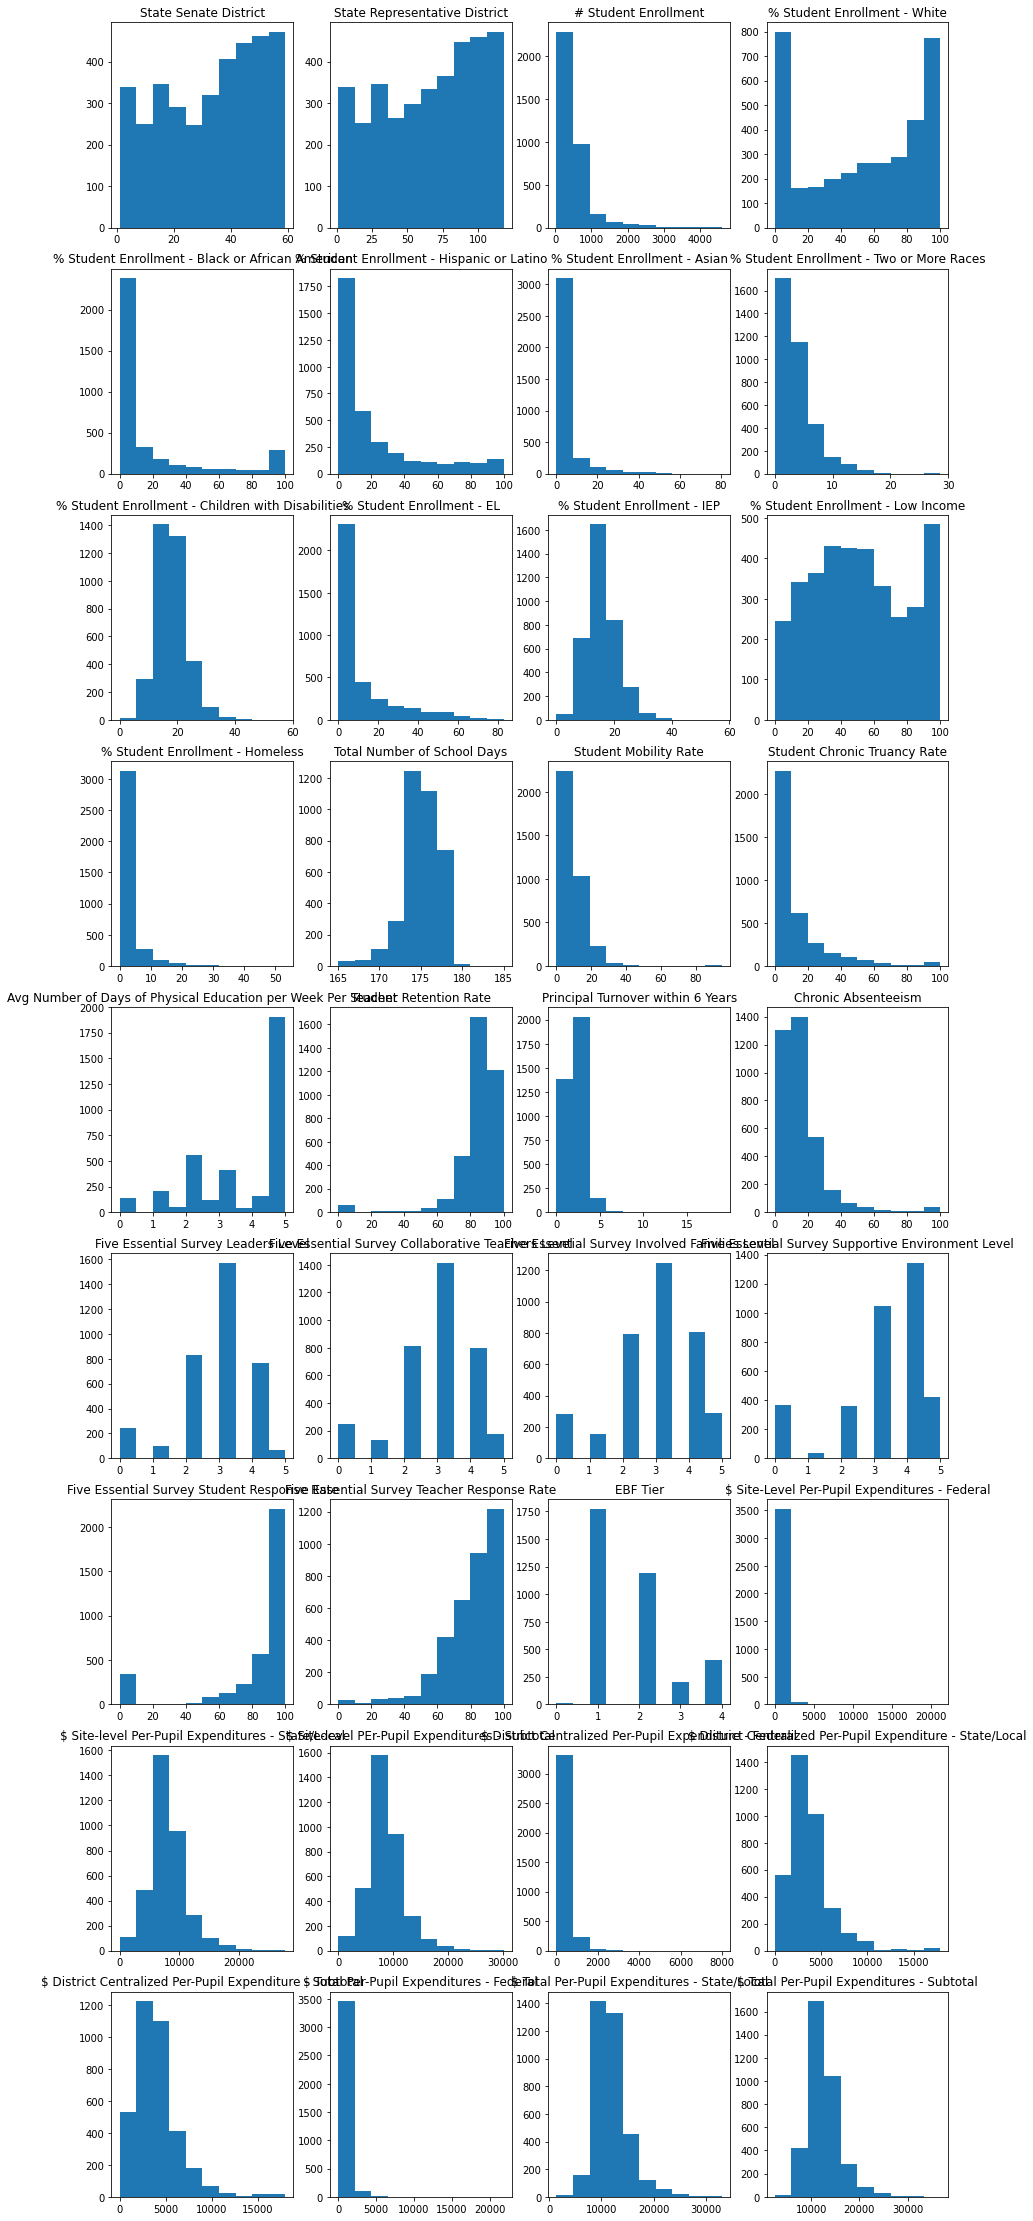

In [ ]:
#visualize distributions of numeric cols
plt.figure(figsize =(15, 40))

for variable,i in numeric_cols_dict.items():
  plt. subplot(9,4,i)
  plt.hist(illinois_df[variable])
  plt.title(variable)

In [ ]:
#create a list of categorical columns
categorical_cols

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)'],
      dtype='object')

In [ ]:
#normality tests on numeric columns
for variable,i in numeric_cols_dict.items():
  jb_stats = jarque_bera(illinois_df[variable])
  norm_stats = normaltest(illinois_df[variable])
  if jb_stats[1] < 0.05 and norm_stats[1]<0.05:
    print('Evidence to suggest {} IS NOT normally distributed'.format(variable))
  else:
    print('Evidence to support {} is normally distributed.'.format(variable))
  print('Jarque-Bera test statistis for {0} is {1} and p-value is {2}'.format(variable, jb_stats[0], jb_stats[1]))
  print('Normality test statistis for {0} is {1} and p-value is {2}'.format(variable, norm_stats[0], norm_stats[1]))
  print()

Evidence to suggest State Senate District IS NOT normally distributed
Jarque-Bera test statistis for State Senate District is 243.7842713847226 and p-value is 0.0
Normality test statistis for State Senate District is 2626.4712320687536 and p-value is 0.0

Evidence to suggest State Representative District IS NOT normally distributed
Jarque-Bera test statistis for State Representative District is 243.5701008317485 and p-value is 0.0
Normality test statistis for State Representative District is 2631.6104566630665 and p-value is 0.0

Evidence to suggest # Student Enrollment IS NOT normally distributed
Jarque-Bera test statistis for # Student Enrollment is 51278.58648656403 and p-value is 0.0
Normality test statistis for # Student Enrollment is 2695.2253196381935 and p-value is 0.0

Evidence to suggest % Student Enrollment - White IS NOT normally distributed
Jarque-Bera test statistis for % Student Enrollment - White is 358.10106326123486 and p-value is 0.0
Normality test statistis for % St

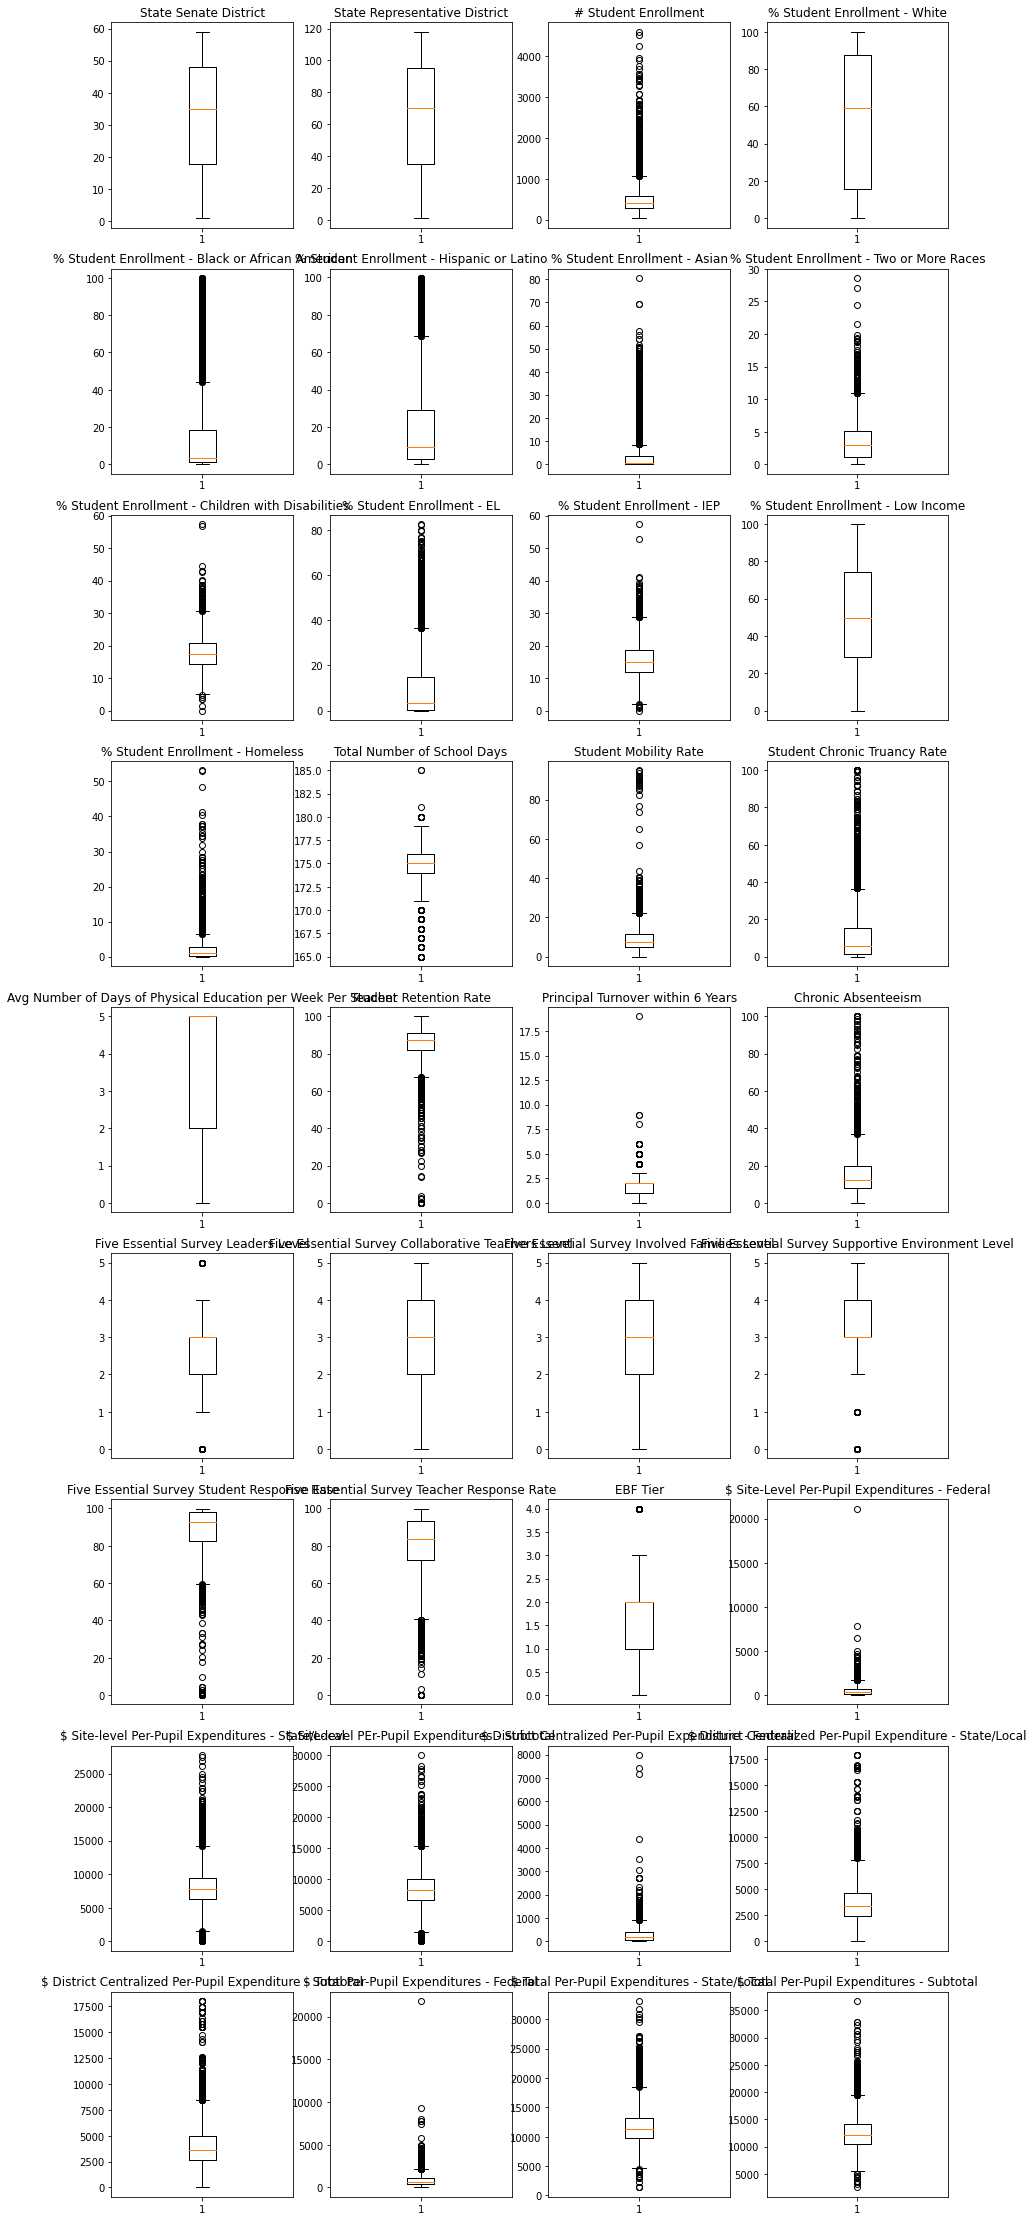

In [ ]:
#no surprise, the data is not normally distributed.

#view boxplots for potential outliers.
#visualize distributions of numeric cols
plt.figure(figsize =(15, 40))

for variable,i in numeric_cols_dict.items():
  plt. subplot(9,4,i)
  plt.boxplot(illinois_df[variable], whis=1.5)
  plt.title(variable)

The data has many outliers. However it's kind of expected here. Some schools have a higher population and should correspondingly have values that look like outliers. Also it's very common, based on area, for high percentage of students to be of one race/ethnicity/population. Outliers will remain for now. 

In [ ]:
#create dictionary of categorical columns
categorical_cols_dict = {'Type':1, 'School Name':2, 'District':3, 'City':4, 
       'County':5, 'District Type':6,'District Size':7, 'School Type':8, 
       'Summative Designation':9,'Summative Designation: Student Group(s)':10, 
       'Title 1 Status':11,'Student Attendance Rate':12, 
       'Avg Class Size – All Grades':13,'% EBF Capacity to Meet Expectations':14, 
       '% ELA Proficiency':15,'% Math Proficiency':16, '% Science Proficiency':17,
       '% Students IAR Math Participation':18}

###**Correlations** <a name="10"></a>

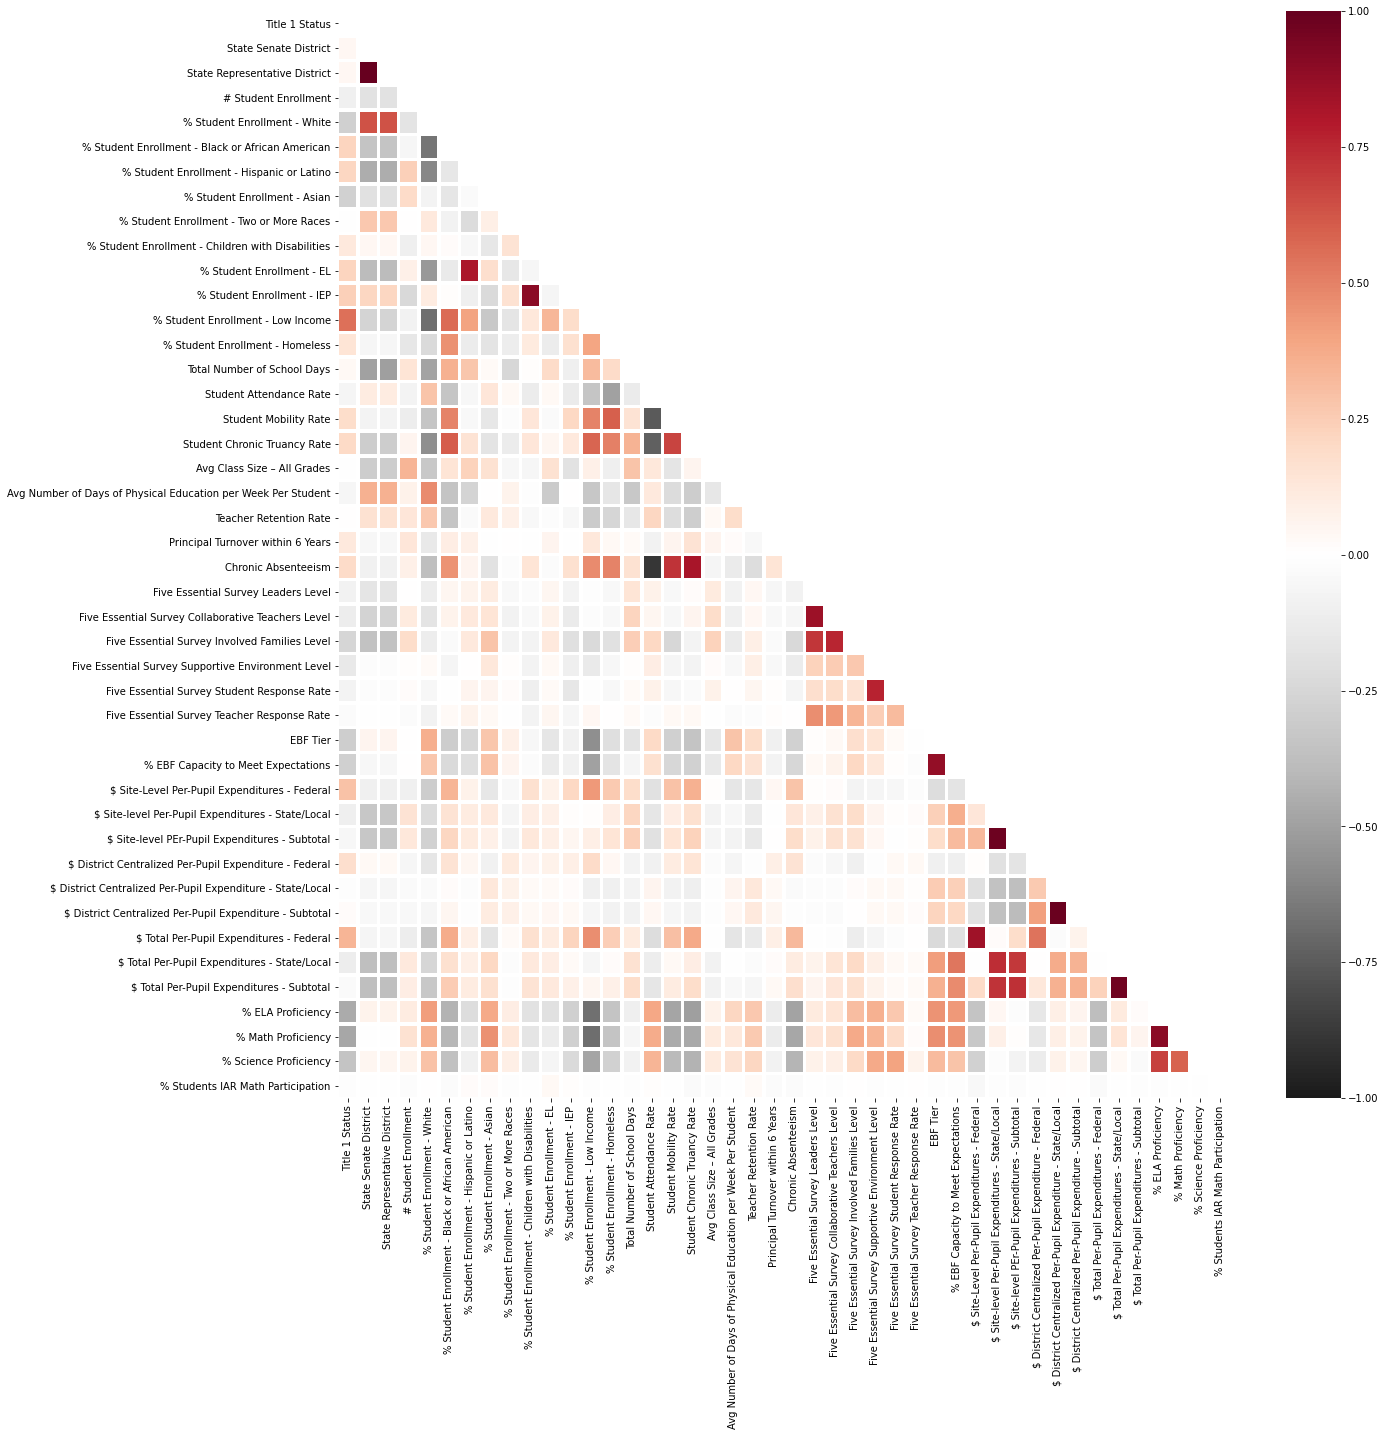

In [ ]:
#investigate correlations
corr_df = illinois_df.corr(method = 'pearson')
#create a mask to display only the lower triangle of the matrix
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

#create heatmap 
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, cmap= 'RdGy_r', vmax = 1.0, vmin = -1.0, mask = mask, linewidths=2.5 )
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#models can often be thrown off by highly correlated features, let's create
#another df that drops out some highly correlated features for later model
#comparison
corr = illinois_df.corr()

#select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))

#find index of feature columns  with correlations > 0.75
to_drop = [column for column in upper.columns if any(upper[column]>0.75)]

to_drop

['State Representative District',
 '% Student Enrollment - EL',
 '% Student Enrollment - IEP',
 'Chronic Absenteeism',
 'Five Essential Survey Collaborative Teachers Level',
 'Five Essential Survey Involved Families Level',
 'Five Essential Survey Student Response Rate',
 '% EBF Capacity to Meet Expectations',
 '$ Site-level PEr-Pupil Expenditures - Subtotal',
 '$ District Centralized Per-Pupil Expenditure - Subtotal',
 '$ Total Per-Pupil Expenditures - Federal',
 '$ Total Per-Pupil Expenditures - Subtotal',
 '% Math Proficiency']

In [ ]:
# #create a new df by droppping these columns
focused_illinois_df = illinois_df.drop(illinois_df[to_drop], axis = 1)
focused_illinois_df=pd.DataFrame(data=focused_illinois_df)
focused_illinois_df.columns

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', '# Student Enrollment',
       '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Retention Rate', 'Principal Turnover within 6 Years',
       'Five Essential Survey Leaders Level',
 

In [ ]:
illinois_df.columns

Index(['Type', 'School Name', 'District', 'City', 'County', 'District Type',
       'District Size', 'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', 'State Representative District',
       '# Student Enrollment', '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Re

# **Prep for Building all illinois_df Models** <a name="11"></a>

In [ ]:
#some unique identifier columns still exist because they were used during 
#feature engineering but are no longer needed. Let's drop them
illinois_df = illinois_df.drop(['Type', 'School Name'],1)
illinois_df.columns

Index(['District', 'City', 'County', 'District Type', 'District Size',
       'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', 'State Representative District',
       '# Student Enrollment', '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - EL', '% Student Enrollment - IEP',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Retention Rate', 'Princip

In [ ]:
illinois_df['Summative Designation'].unique()

array(['Commendable', 'Targeted', 'Comprehensive', 'Exemplary'],
      dtype=object)

In [ ]:
#encode following columns with number classifiers
labelencoder= LabelEncoder()
illinois_df['District']=labelencoder.fit_transform(illinois_df['District'])
illinois_df['City']=labelencoder.fit_transform(illinois_df['City'])
illinois_df['County']=labelencoder.fit_transform(illinois_df['County'])
illinois_df['District Type']=labelencoder.fit_transform(illinois_df['District Type'])
illinois_df['District Size']=labelencoder.fit_transform(illinois_df['District Size'])
illinois_df['School Type']=labelencoder.fit_transform(illinois_df['School Type'])
illinois_df['Summative Designation: Student Group(s)']=labelencoder.fit_transform(illinois_df['Summative Designation: Student Group(s)'])


#Assign numeric values to unique values of Summative Designation
illinois_df.loc[illinois_df['Summative Designation']== 'Comprehensive', 'Summative Designation'] = 0
illinois_df.loc[illinois_df['Summative Designation']== 'Targeted', 'Summative Designation'] = 1
illinois_df.loc[illinois_df['Summative Designation']== 'Commendable', 'Summative Designation'] = 2
illinois_df.loc[illinois_df['Summative Designation']== 'Exemplary', 'Summative Designation'] = 3

illinois_df.head()

illinois_df.head()

,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,State Representative District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - IEP,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Chronic Absenteeism,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,EBF Tier,% EBF Capacity to Meet Expectations,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ Site-level PEr-Pupil Expenditures - Subtotal,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ District Centralized Per-Pupil Expenditure - Subtotal,$ Total Per-Pupil Expenditures - Federal,$ Total Per-Pupil Expenditures - State/Local,$ Total Per-Pupil Expenditures - Subtotal,% ELA Proficiency,% Math Proficiency,% Science Proficiency,% Students IAR Math Participation
0,573,583,0,2,1,2,2,0,1,47.0,94.0,239,95.4,0.0,0.4,0.8,3.3,16.7,1.7,16.7,46.4,0.0,167.0,95.1,7.9,7.2,16.9,5.0,86.8,2.0,12.3,4.0,3.0,2.0,3.0,93.7,84.2,1.0,63.1,311.0000,5370.0000,5681.0000,294.0000,2637.0000,2931.0000,605.0000,8007.0000,8612.0000,31.4,18.6,48.7,99.6
1,573,583,0,2,1,1,2,0,3,47.0,94.0,316,94.6,0.3,0.0,0.3,4.7,19.6,0.3,19.6,51.9,0.0,167.0,96.0,7.5,4.9,19.1,5.0,86.7,3.0,7.4,3.0,3.0,2.0,4.0,71.8,87.5,1.0,63.1,623.0000,4377.0000,5000.0000,310.0000,2498.0000,2808.0000,933.0000,6875.0000,7808.0000,25.7,19.4,46.3,100.0
2,409,410,0,2,1,2,2,0,1,47.0,94.0,288,97.6,0.3,0.0,0.0,2.1,25.3,0.0,16.3,20.5,0.0,170.0,95.8,4.1,2.2,15.3,3.0,83.9,2.0,8.6,3.0,3.0,4.0,4.0,93.6,83.9,2.0,70.5,358.0000,6547.0000,6905.0000,198.0000,2561.0000,2759.0000,556.0000,9108.0000,9664.0000,40.1,35.0,54.9,100.0
3,409,410,0,2,1,1,2,0,3,47.0,94.0,350,97.4,0.3,0.0,0.0,2.3,18.6,0.0,16.3,25.1,0.0,170.0,96.7,4.4,0.4,17.9,3.0,86.9,1.0,4.9,3.0,3.0,4.0,5.0,92.1,75.6,2.0,70.5,313.0000,5359.0000,5672.0000,198.0000,2561.0000,2759.0000,511.0000,7920.0000,8431.0000,45.2,37.6,71.1,99.6
4,132,106,0,2,1,2,2,0,1,47.0,94.0,237,98.3,0.0,0.0,0.0,1.7,21.1,0.0,16.5,42.2,1.3,169.0,94.9,10.4,6.1,12.4,5.0,83.3,2.0,17.8,4.0,3.0,3.0,4.0,85.3,81.0,1.0,64.1,240.6874,6940.4054,7181.0928,525.0821,3620.1878,4145.2699,765.7695,10560.5932,11326.3627,26.2,21.3,69.2,99.5


In [ ]:
#investigate shape of illinois_df
print('The number of rows in the dataset is: ', illinois_df.shape[0])
print('The number of features in the dataset is: ', illinois_df.shape[1])

The number of rows in the dataset is:  3578
The number of features in the dataset is:  52


In [ ]:
#investigate distribution of target classes
np.bincount(illinois_df['Summative Designation'])

array([ 155,  373, 2667,  383])

In [ ]:
#investigate percentage of target classes
samples_list = ( 155,  373, 2667,  383)

for sample in samples_list:
  percentage = (sample/3578)*100
  print(percentage)

4.332029066517608
10.424818334264954
74.53884851872554
10.704304080491895


The classes are severly unbalanced.

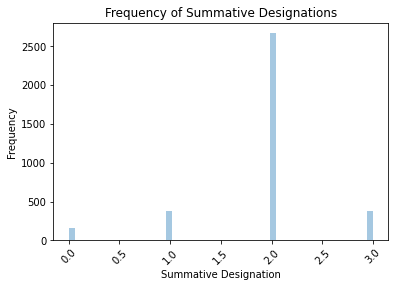

In [ ]:
all_illinois =sns.distplot(illinois_df['Summative Designation'], kde = False)
plt.xlabel('Summative Designation')
plt.ylabel('Frequency')
plt.title('Frequency of Summative Designations')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#set features & targets
X=illinois_df.drop(['Summative Designation'],1)
y= illinois_df['Summative Designation']
y = y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [ ]:
#view shapes of training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2504, 51)
(2504,)
(1074, 51)
(1074,)


# **Classification Model Testing with all illinois_df features** <a name="12"></a>

## **1. Cross Validation with Logistic Regression** <a name="13"></a>

In [ ]:
#standardize the data
scaler = StandardScaler()

#fit training set
scaler.fit(X_train)
scaler.fit(X_test)

#apply transformation to training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Instanstiate LogisticRegression classifier
lr_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter=1000)
lr_clf.fit(X_train, y_train)

#cross validate
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.83033932 0.84431138 0.86427146 0.85229541 0.842     ]
Mean Cross Validation Score: 0.846643512974051937192143668653443


In [ ]:
#generate predictions
lr_preds = lr_clf.predict(X_test)

#get score report on predictions
lr_report = classification_report(y_test, lr_preds)
print(lr_report)

              precision    recall  f1-score   support

           0       0.74      0.36      0.49        47
           1       0.93      0.91      0.92       110
           2       0.88      0.96      0.92       812
           3       0.46      0.22      0.30       105

    accuracy                           0.86      1074
   macro avg       0.75      0.61      0.65      1074
weighted avg       0.84      0.86      0.84      1074



In [ ]:
#more performance metrics
lr_score_train = lr_clf.score(X_train, y_train)
lr_score_test = lr_clf.score(X_test, y_test)
lr_prec_test = precision_score(y_test, lr_preds, average='weighted')
lr_recall_test = recall_score(y_test, lr_preds, average='weighted')
lr_f1_test = f1_score(y_test, lr_preds, average='weighted')
lr_rsquared_train = lr_clf.score(X_train, y_train)
lr_rsquared_test = lr_clf.score(X_test, y_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mse(y_test, lr_preds)
lr_rmse = rmse(y_test, lr_preds)

#create easily readable display of performance metrics
lr_dictionary = {'Training Set Accuracy': lr_score_train, 
  'Test Set Accuracy': lr_score_test, 'Testing Set Precision': lr_prec_test, 
  'Testing Set Recall': lr_recall_test, 'Testing Set F1':lr_f1_test, 
  'Training Set R Squared': lr_rsquared_train, 
  'Test Set R Squared': lr_rsquared_test, 'Mean Absolute Error': lr_mae, 
  'Mean Sqaured Error': lr_mse, 'Root Mean Squared Error': lr_rmse}

lr_df = pd.DataFrame(lr_dictionary, index=[0])

lr_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.86222,0.859404,0.835073,0.859404,0.838649,0.86222,0.859404,0.164804,0.213222,0.461759


## **2. Cross Validation with Random Forest Classifier** <a name="14"></a>

In [ ]:
#Instanstiate RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators =30 , random_state = 52)
rf_clf.fit(X_train, y_train)

#cross validate
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', rf_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(rf_cv_scores)))

Accuracy Scores for the 5 folds:  [0.86626747 0.8742515  0.88423154 0.86227545 0.858     ]
Mean Cross Validation Score: 0.869005189620758455859572677582037


In [ ]:
#generate predictions
rf_preds = rf_clf.predict(X_test)

#get score report on predictions
rf_report = classification_report(y_test, rf_preds)
print(rf_report)

              precision    recall  f1-score   support

           0       0.91      0.62      0.73        47
           1       0.97      1.00      0.99       110
           2       0.88      0.97      0.92       812
           3       0.41      0.14      0.21       105

    accuracy                           0.88      1074
   macro avg       0.79      0.68      0.71      1074
weighted avg       0.85      0.88      0.85      1074



In [ ]:
#more performance metrics
rf_score_train = rf_clf.score(X_train, y_train)
rf_score_test = rf_clf.score(X_test, y_test)
rf_prec_test = precision_score(y_test, rf_preds, average='weighted')
rf_recall_test = recall_score(y_test, rf_preds, average='weighted')
rf_f1_test = f1_score(y_test, rf_preds, average='weighted')
rf_rsquared_train = rf_clf.score(X_train, y_train)
rf_rsquared_test = rf_clf.score(X_test, y_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mse(y_test, rf_preds)
rf_rmse = rmse(y_test, rf_preds)
rf_mape = np.mean(np.abs((y_test - rf_preds)/y_test)*100)

#create easily readable display of performance metrics
rf_dictionary = {'Training Set Accuracy': rf_score_train, 
  'Test Set Accuracy': rf_score_test, 'Testing Set Precision': rf_prec_test, 
  'Testing Set Recall': rf_recall_test, 'Testing Set F1':rf_f1_test,
 'Training Set R Squared': rf_rsquared_train, 
  'Test Set R Squared': rf_rsquared_test, 'Mean Absolute Error': rf_mae, 
  'Mean Sqaured Error': rf_mse, 'Root Mean Squared Error': rf_rmse}

rf_df = pd.DataFrame(rf_dictionary, index=[0])

rf_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.998802,0.876164,0.84605,0.876164,0.852199,0.998802,0.876164,0.140596,0.174115,0.417271


## **3. Cross Validation with KNN** <a name="15"></a>

In [ ]:
#find best value for k, unweighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K)

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5526304121557902
RMSe Value for K=  2 is  0.5853582837014879
RMSe Value for K=  3 is  0.53202819824178
RMSe Value for K=  4 is  0.5232045649263551
RMSe Value for K=  5 is  0.5151340878757881
RMSe Value for K=  6 is  0.5240936132564853
RMSe Value for K=  7 is  0.5223140033191861
RMSe Value for K=  8 is  0.5105953730786356
RMSe Value for K=  9 is  0.5133234176410584
RMSe Value for K=  10 is  0.5160370405194592
RMSe Value for K=  11 is  0.5133234176410584
RMSe Value for K=  12 is  0.5169384159496601
RMSe Value for K=  13 is  0.5142295497102032
RMSe Value for K=  14 is  0.5078526744243113
RMSe Value for K=  15 is  0.506935144001147
RMSe Value for K=  16 is  0.5133234176410584
RMSe Value for K=  17 is  0.5105953730786356
RMSe Value for K=  18 is  0.506015949874114
RMSe Value for K=  19 is  0.5105953730786356
RMSe Value for K=  20 is  0.5096827800827188
RMSe Value for K=  21 is  0.5133234176410584
RMSe Value for K=  22 is  0.505095082960169
RMSe Value for K=  23 is

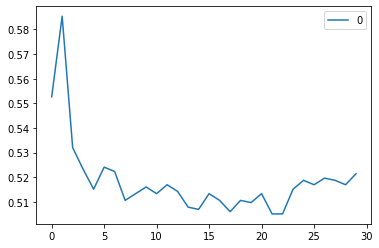

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
knn_clf = neighbors. KNeighborsClassifier(n_neighbors =23)
knn_clf.fit(X_train, y_train)

#cross validate
knn_cv_scores = cross_val_score(knn_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', knn_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(knn_cv_scores)))

Accuracy Scores for the 5 folds:  [0.76247505 0.77245509 0.76646707 0.77644711 0.784     ]
Mean Cross Validation Score: 0.772368862275449097332113979064161


In [ ]:
#generate predictions
knn_preds = knn_clf.predict(X_test)

#get score report on predictions
knn_report = classification_report(y_test, knn_preds)
print(knn_report)

              precision    recall  f1-score   support

           0       0.95      0.43      0.59        47
           1       0.66      0.25      0.36       110
           2       0.80      0.98      0.88       812
           3       0.38      0.06      0.10       105

    accuracy                           0.79      1074
   macro avg       0.70      0.43      0.48      1074
weighted avg       0.75      0.79      0.74      1074



In [ ]:
#more performance metrics
knn_score_train = knn_clf.score(X_train, y_train)
knn_score_test = knn_clf.score(X_test, y_test)
knn_prec_test = precision_score(y_test, knn_preds, average='weighted')
knn_recall_test = recall_score(y_test, knn_preds, average='weighted')
knn_f1_test = f1_score(y_test, knn_preds, average='weighted')
knn_rsquared_train = knn_clf.score(X_train, y_train)
knn_rsquared_test = knn_clf.score(X_test, y_test)
knn_mae = mean_absolute_error(y_test, knn_preds)
knn_mse = mse(y_test, knn_preds)
knn_rmse = rmse(y_test, knn_preds)
knn_mape = np.mean(np.abs((y_test - knn_preds)/y_test)*100)

#create easily readable display of performance metrics
knn_dictionary = {'Training Set Accuracy': knn_score_train, 
  'Test Set Accuracy': knn_score_test, 'Testing Set Precision': knn_prec_test, 
  'Testing Set Recall': knn_recall_test, 'Testing Set F1':knn_f1_test,
 'Training Set R Squared': knn_rsquared_train, 
  'Test Set R Squared': knn_rsquared_test, 'Mean Absolute Error': knn_mae, 
  'Mean Sqaured Error': knn_mse, 'Root Mean Squared Error': knn_rmse,
  'Mean Absolute Percentage Error': knn_mape}

knn_df = pd.DataFrame(knn_dictionary, index=[0])

knn_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.784744,0.792365,0.75154,0.792365,0.739465,0.784744,0.792365,0.223464,0.255121,0.505095,inf


##**4. Cross Validation with KNN Weighted** <a name="16"></a>

In [ ]:
#find best value for k, weighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K, weights='distance')

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.5526304121557902
RMSe Value for K=  2 is  0.5526304121557902
RMSe Value for K=  3 is  0.5178382224025236
RMSe Value for K=  4 is  0.512415683212599
RMSe Value for K=  5 is  0.49766680948084674
RMSe Value for K=  6 is  0.5078526744243113
RMSe Value for K=  7 is  0.5133234176410584
RMSe Value for K=  8 is  0.5087685501447464
RMSe Value for K=  9 is  0.5105953730786356
RMSe Value for K=  10 is  0.5078526744243113
RMSe Value for K=  11 is  0.506015949874114
RMSe Value for K=  12 is  0.506935144001147
RMSe Value for K=  13 is  0.5087685501447464
RMSe Value for K=  14 is  0.5004653328136035
RMSe Value for K=  15 is  0.5004653328136035
RMSe Value for K=  16 is  0.505095082960169
RMSe Value for K=  17 is  0.5087685501447464
RMSe Value for K=  18 is  0.49953423371353545
RMSe Value for K=  19 is  0.5041725340933183
RMSe Value for K=  20 is  0.505095082960169
RMSe Value for K=  21 is  0.5133234176410584
RMSe Value for K=  22 is  0.5096827800827188
RMSe Value for K=  23 

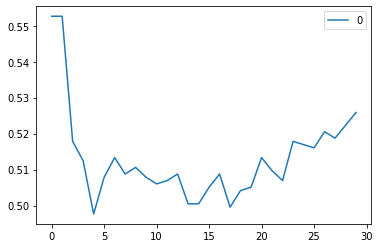

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
knn_w_clf = neighbors. KNeighborsClassifier(n_neighbors =5, weights='distance')
knn_w_clf.fit(X_train, y_train)

#cross validate
knn_w_cv_scores = cross_val_score(knn_w_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', knn_w_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(knn_w_cv_scores)))

Accuracy Scores for the 5 folds:  [0.74850299 0.74451098 0.75249501 0.76646707 0.78      ]
Mean Cross Validation Score: 0.758395209580838391971724377071951


In [ ]:
#generate predictions
knn_w_preds = knn_w_clf.predict(X_test)

#get score report on predictions
knn_w_report = classification_report(y_test, knn_w_preds)
print(knn_report)

              precision    recall  f1-score   support

           0       0.95      0.43      0.59        47
           1       0.66      0.25      0.36       110
           2       0.80      0.98      0.88       812
           3       0.38      0.06      0.10       105

    accuracy                           0.79      1074
   macro avg       0.70      0.43      0.48      1074
weighted avg       0.75      0.79      0.74      1074



In [ ]:
#more performance metrics
knn_w_score_train = knn_w_clf.score(X_train, y_train)
knn_w_score_test = knn_w_clf.score(X_test, y_test)
knn_w_prec_test = precision_score(y_test, knn_w_preds, average='weighted')
knn_w_recall_test = recall_score(y_test, knn_w_preds, average='weighted')
knn_w_f1_test = f1_score(y_test, knn_w_preds, average='weighted')
knn_w_rsquared_train = knn_w_clf.score(X_train, y_train)
knn_w_rsquared_test = knn_w_clf.score(X_test, y_test)
knn_w_mae = mean_absolute_error(y_test, knn_w_preds)
knn_w_mse = mse(y_test, knn_w_preds)
knn_w_rmse = rmse(y_test, knn_w_preds)
knn_w_mape = np.mean(np.abs((y_test - knn_w_preds)/y_test)*100)

#create easily readable display of performance metrics
knn_w_dictionary = {'Training Set Accuracy': knn_w_score_train, 
  'Test Set Accuracy': knn_w_score_test, 'Testing Set Precision': knn_w_prec_test, 
  'Testing Set Recall': knn_w_recall_test, 'Testing Set F1':knn_w_f1_test,
'Training Set R Squared': knn_w_rsquared_train, 
  'Test Set R Squared': knn_w_rsquared_test,'Mean Absolute Error': knn_w_mae, 
  'Mean Sqaured Error': knn_w_mse,  'Root Mean Squared Error': knn_w_rmse}

knn_w_df = pd.DataFrame(knn_w_dictionary, index=[0])

knn_w_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.791434,0.766796,0.791434,0.76952,1.0,0.791434,0.221601,0.247672,0.497667


##**5. Cross Validation with SVM** <a name="17"></a>

In [ ]:
#set model with ideal number of neighbors from above
svm_clf = svm.SVC(kernel = 'linear', C=1, decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)

#cross validate
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', svm_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(svm_cv_scores)))

Accuracy Scores for the 5 folds:  [0.84830339 0.8502994  0.87225549 0.84830339 0.838     ]
Mean Cross Validation Score: 0.851432335329341372087696981907357


In [ ]:
#generate predictions
svm_preds = svm_clf.predict(X_test)

#get score report on predictions
svm_report = classification_report(y_test, svm_preds)
print(svm_report)

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        47
           1       0.97      0.95      0.96       110
           2       0.88      0.99      0.93       812
           3       0.62      0.12      0.21       105

    accuracy                           0.88      1074
   macro avg       0.80      0.65      0.68      1074
weighted avg       0.86      0.88      0.85      1074



In [ ]:
#more performance metrics
svm_score_train = svm_clf.score(X_train, y_train)
svm_score_test = svm_clf.score(X_test, y_test)
svm_prec_test = precision_score(y_test, svm_preds, average='weighted')
svm_recall_test = recall_score(y_test, svm_preds, average='weighted')
svm_f1_test = f1_score(y_test, svm_preds, average='weighted')
svm_rsquared_train = svm_clf.score(X_train, y_train)
svm_rsquared_test = svm_clf.score(X_test, y_test)
svm_mae = mean_absolute_error(y_test, svm_preds)
svm_mse = mse(y_test, svm_preds)
svm_rmse = rmse(y_test, svm_preds)
svm_mape = np.mean(np.abs((y_test - svm_preds)/y_test)*100)

#create easily readable display of performance metrics
svm_dictionary = {'Training Set Accuracy': svm_score_train, 
  'Test Set Accuracy': svm_score_test, 'Testing Set Precision': svm_prec_test, 
  'Testing Set Recall': svm_recall_test, 'Testing Set F1':svm_f1_test,
  'Training Set R Squared': svm_rsquared_train, 
  'Test Set R Squared': svm_rsquared_test,'Mean Absolute Error': svm_mae, 
  'Mean Sqaured Error': svm_mse,  'Root Mean Squared Error': svm_rmse}

svm_df = pd.DataFrame(svm_dictionary, index=[0])

svm_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.872204,0.877095,0.855261,0.877095,0.84711,0.872204,0.877095,0.14432,0.187151,0.432609


##**6. Cross Fold Validation with Gradient Boosting** <a name="18"></a>

In [ ]:
#set model parameters
params = {'n_estimators': 2000,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate':0.2, 
          'max_features':4}

#set model 
gb_clf = ensemble.GradientBoostingClassifier(**params)
gb_clf.fit(X_train, y_train)

#cross validate
gb_cv_scores = cross_val_score(gb_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', gb_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(gb_cv_scores)))

Accuracy Scores for the 5 folds:  [0.85229541 0.85229541 0.86227545 0.84630739 0.86      ]
Mean Cross Validation Score: 0.854634730538922249287736576661700


In [ ]:
#generate predictions
gb_preds = gb_clf.predict(X_test)

#get score report on predictions
gb_report = classification_report(y_test, gb_preds)
print(gb_report)

              precision    recall  f1-score   support

           0       0.71      0.57      0.64        47
           1       0.97      0.99      0.98       110
           2       0.90      0.94      0.92       812
           3       0.52      0.38      0.44       105

    accuracy                           0.88      1074
   macro avg       0.78      0.72      0.74      1074
weighted avg       0.86      0.88      0.87      1074



In [ ]:
#more performance metrics
gb_score_train = gb_clf.score(X_train, y_train)
gb_score_test = gb_clf.score(X_test, y_test)
gb_prec_test = precision_score(y_test, gb_preds, average='weighted')
gb_recall_test = recall_score(y_test, gb_preds, average='weighted')
gb_f1_test = f1_score(y_test, gb_preds, average='weighted')
gb_rsquared_train = gb_clf.score(X_train, y_train)
gb_rsquared_test = gb_clf.score(X_test, y_test)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mse(y_test, gb_preds)
gb_rmse = rmse(y_test, gb_preds)
gb_mape = np.mean(np.abs((y_test - gb_preds)/y_test)*100)

#create easily readable display of performance metrics
gb_dictionary = {'Training Set Accuracy': gb_score_train, 
  'Test Set Accuracy': gb_score_test, 'Testing Set Precision': gb_prec_test, 
  'Testing Set Recall': gb_recall_test, 'Testing Set F1':gb_f1_test,
 'Training Set R Squared': gb_rsquared_train, 
  'Test Set R Squared': gb_rsquared_test,'Mean Absolute Error': gb_mae, 
  'Mean Sqaured Error': gb_mse, 'Root Mean Squared Error': gb_rmse}

gb_df = pd.DataFrame(gb_dictionary, index=[0])

gb_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.876164,0.864415,0.876164,0.868614,1.0,0.876164,0.148976,0.199255,0.44638


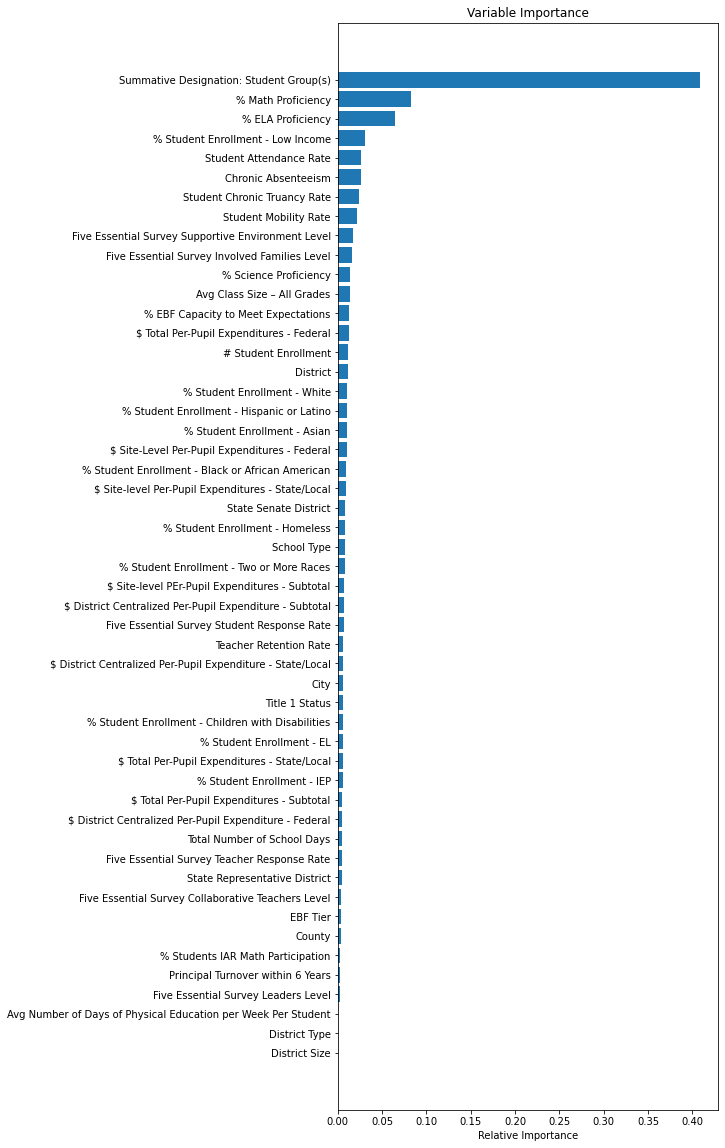

In [ ]:
#feature importance
feature_importance = gb_clf.feature_importances_

#make importances relative to max importance
plt.figure(figsize=(15,20))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##**7. Cross Validation with Ridge Classifier** <a name="19"></a>

In [ ]:
#Tuning Regularization Parameter
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

#set model with ideal number of neighbors from above
ridge_clf = RidgeClassifierCV(alphas= alphas, cv = 5)
ridge_clf.fit(X_train, y_train)

#cross validate
ridge_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)

print('Best alpha value is: {}'.format(ridge_clf.alpha_))
print('Accuracy Scores for the 5 folds: ', ridge_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(ridge_cv_scores)))

Best alpha value is: 100.0
Accuracy Scores for the 5 folds:  [0.84830339 0.8502994  0.87225549 0.84830339 0.838     ]
Mean Cross Validation Score: 0.851432335329341372087696981907357


In [ ]:
#generate predictions
ridge_preds = ridge_clf.predict(X_test)

#get score report on predictions
ridge_report = classification_report(y_test, ridge_preds)
print(ridge_report)

              precision    recall  f1-score   support

           0       0.79      0.23      0.36        47
           1       0.73      0.17      0.28       110
           2       0.79      0.99      0.88       812
           3       0.67      0.04      0.07       105

    accuracy                           0.78      1074
   macro avg       0.74      0.36      0.40      1074
weighted avg       0.77      0.78      0.71      1074



In [ ]:
#more performance metrics
ridge_score_train = ridge_clf.score(X_train, y_train)
ridge_score_test = ridge_clf.score(X_test, y_test)
ridge_prec_test = precision_score(y_test, ridge_preds, average='weighted')
ridge_recall_test = recall_score(y_test, ridge_preds, average='weighted')
ridge_f1_test = f1_score(y_test, ridge_preds, average='weighted')
ridge_rsquared_train = ridge_clf.score(X_train, y_train)
ridge_rsquared_test = ridge_clf.score(X_test, y_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mse(y_test, ridge_preds)
ridge_rmse = rmse(y_test, ridge_preds)
ridge_mape = np.mean(np.abs((y_test - ridge_preds)/y_test)*100)

#create easily readable display of performance metrics
ridge_dictionary = {'Training Set Accuracy': ridge_score_train, 
  'Test Set Accuracy': ridge_score_test, 'Testing Set Precision': ridge_prec_test, 
  'Testing Set Recall': ridge_recall_test, 'Testing Set F1':ridge_f1_test,
 'Training Set R Squared': ridge_rsquared_train, 
  'Test Set R Squared': ridge_rsquared_test,'Mean Absolute Error': ridge_mae, 
  'Mean Sqaured Error': ridge_mse,  'Root Mean Squared Error': ridge_rmse}

ridge_df = pd.DataFrame(ridge_dictionary, index=[0])

ridge_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.771166,0.783054,0.767923,0.783054,0.714636,0.771166,0.783054,0.246741,0.306331,0.553472


# **Regression Model Testing with all illinois_df features** <a name="20"></a>

##**8. Cross Validation with KNN Unweighted Regression with all illinois_df features.** <a name="21"></a>

In [ ]:
#find best value for k, unweighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K)

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5526304121557902
RMSe Value for K=  2 is  0.49178540686559524
RMSe Value for K=  3 is  0.4669946528532238
RMSe Value for K=  4 is  0.4608130819126394
RMSe Value for K=  5 is  0.4570572212952937
RMSe Value for K=  6 is  0.4548745117457793
RMSe Value for K=  7 is  0.4535171461444383
RMSe Value for K=  8 is  0.45153241045452674
RMSe Value for K=  9 is  0.4539132053241852
RMSe Value for K=  10 is  0.4494047376803392
RMSe Value for K=  11 is  0.44911261478330666
RMSe Value for K=  12 is  0.4507333610877215
RMSe Value for K=  13 is  0.45055693720954665
RMSe Value for K=  14 is  0.44983602496869024
RMSe Value for K=  15 is  0.45046358629998834
RMSe Value for K=  16 is  0.45102465847358103
RMSe Value for K=  17 is  0.44984545260296704
RMSe Value for K=  18 is  0.45143096542657407
RMSe Value for K=  19 is  0.45252603452533174
RMSe Value for K=  20 is  0.4528026730349932
RMSe Value for K=  21 is  0.4526877142336712
RMSe Value for K=  22 is  0.45273254518316564
RMSe Val

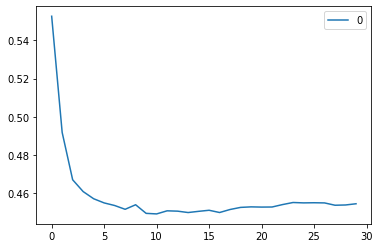

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
knn_reg = neighbors. KNeighborsRegressor(n_neighbors =14)
knn_reg.fit(X_train, y_train)

#cross validate
knn_reg_cv_scores = cross_val_score(knn_reg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', knn_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(knn_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.41491237 0.40511447 0.3895276  0.41224938 0.44319424]
Mean Cross Validation Score: 0.412999610319031706939796322330949


In [ ]:
#generate predictions
knn_reg_preds = knn_reg.predict(X_test)

In [ ]:
#more performance metrics
knn_reg_rsquared_train = knn_reg.score(X_train, y_train)
knn_reg_rsquared_test = knn_reg.score(X_test, y_test)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_preds)
knn_reg_mse = mse(y_test, knn_reg_preds)
knn_reg_rmse = rmse(y_test, knn_reg_preds)
knn_reg_mape = np.mean(np.abs((y_test - knn_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
knn_reg_dictionary = {'Training Set R Squared': knn_reg_rsquared_train, 
  'Test Set R Squared': knn_reg_rsquared_test, 'Mean Absolute Error': knn_reg_mae, 
  'Mean Sqaured Error': knn_reg_mse, 'Root Mean Squared Error': knn_reg_rmse,
  'Mean Absolute Percentage Error': knn_reg_mape}

knn_reg_df = pd.DataFrame(knn_reg_dictionary, index=[0])

knn_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.495184,0.448234,0.308859,0.202352,0.449836,inf


##**9. Cross Validation with KNN Weighted Regression with all illinois_df features.** <a name="22"></a>

In [ ]:
#find best value for k, weighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='distance')

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5526304121557902
RMSe Value for K=  2 is  0.49056564783269047
RMSe Value for K=  3 is  0.46494223963894643
RMSe Value for K=  4 is  0.4569861961637842
RMSe Value for K=  5 is  0.4534677478806649
RMSe Value for K=  6 is  0.4513237533478518
RMSe Value for K=  7 is  0.44996702111196957
RMSe Value for K=  8 is  0.4479931419051483
RMSe Value for K=  9 is  0.4503187216114739
RMSe Value for K=  10 is  0.44611482074530234
RMSe Value for K=  11 is  0.4458085839354325
RMSe Value for K=  12 is  0.44704141201427894
RMSe Value for K=  13 is  0.44686571587116686
RMSe Value for K=  14 is  0.4461949406037096
RMSe Value for K=  15 is  0.4467169383987194
RMSe Value for K=  16 is  0.44705365385205886
RMSe Value for K=  17 is  0.44599105778623344
RMSe Value for K=  18 is  0.4474170250666145
RMSe Value for K=  19 is  0.4485332268996044
RMSe Value for K=  20 is  0.4488671076774403
RMSe Value for K=  21 is  0.4486373817456288
RMSe Value for K=  22 is  0.4487426449609378
RMSe Value 

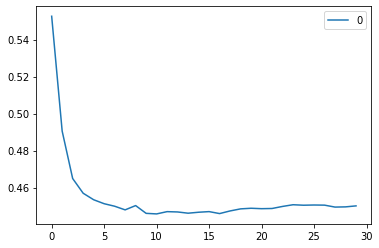

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
knn_wreg = neighbors. KNeighborsRegressor(n_neighbors =11)
knn_wreg.fit(X_train, y_train)

#cross validate
knn_wreg_cv_scores = cross_val_score(knn_wreg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', knn_wreg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(knn_wreg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.40259551 0.4129765  0.3936126  0.40440683 0.42531999]
Mean Cross Validation Score: 0.407782286544633998381925721332664


In [ ]:
#generate predictions
knn_wreg_preds = knn_wreg.predict(X_test)

In [ ]:
#more performance metrics
knn_wreg_rsquared_train = knn_wreg.score(X_train, y_train)
knn_wreg_rsquared_test = knn_wreg.score(X_test, y_test)
knn_wreg_mae = mean_absolute_error(y_test, knn_wreg_preds)
knn_wreg_mse = mse(y_test, knn_wreg_preds)
knn_wreg_rmse = rmse(y_test, knn_wreg_preds)
knn_wreg_mape = np.mean(np.abs((y_test - knn_wreg_preds)/y_test)*100)

#create easily readable display of performance metrics
knn_wreg_dictionary = {'Training Set R Squared': knn_wreg_rsquared_train, 
  'Test Set R Squared': knn_wreg_rsquared_test, 'Mean Absolute Error': knn_wreg_mae, 
  'Mean Sqaured Error': knn_wreg_mse, 'Root Mean Squared Error': knn_wreg_rmse,
  'Mean Absolute Percentage Error': knn_wreg_mape}

knn_wreg_df = pd.DataFrame(knn_wreg_dictionary, index=[0])

knn_wreg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.514211,0.450007,0.306585,0.201702,0.449113,inf


##**10. Cross Validation with Random Forest Regression with all illinois_df features.** <a name="23"></a>

In [ ]:
#Instanstiate RandomForest regressor
rf_reg = RandomForestRegressor(n_estimators =30 , random_state = 52)
rf_reg.fit(X_train, y_train)

#cross validate
rf_reg_cv_scores = cross_val_score(rf_reg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', rf_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(rf_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.50714558 0.55296635 0.59938445 0.5539953  0.607805  ]
Mean Cross Validation Score: 0.564259337813441286257898354961071


In [ ]:
#generate predictions
rf_reg_preds = rf_reg.predict(X_test)

In [ ]:
#more performance metrics
rf_reg_rsquared_train = rf_reg.score(X_train, y_train)
rf_reg_rsquared_test = rf_reg.score(X_test, y_test)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_preds)
rf_reg_mse = mse(y_test, rf_reg_preds)
rf_reg_rmse = rmse(y_test, rf_reg_preds)
rf_reg_mape = np.mean(np.abs((y_test - rf_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
rf_reg_dictionary = {'Training Set R Squared': rf_reg_rsquared_train, 
  'Test Set R Squared': rf_reg_rsquared_test, 'Mean Absolute Error': rf_reg_mae, 
  'Mean Sqaured Error': rf_reg_mse, 'Root Mean Squared Error': rf_reg_rmse,
  'Mean Absolute Percentage Error': rf_reg_mape}

rf_reg_df = pd.DataFrame(rf_reg_dictionary, index=[0])

rf_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.933495,0.64138,0.212787,0.131519,0.362655,inf


##**11. Cross Validation with SVM Regressor with all illinois_df features.** <a name="24"></a>

In [ ]:
#reshape y, was having issues with model without doing it
y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

#set model with ideal number of neighbors from above
svm_reg = svm.SVR(kernel = 'linear', C=1, max_iter= 100)
svm_reg.fit(X_train, y_train)

#cross validate
svm_reg_cv_scores = cross_val_score(svm_reg, X_train, y_train.ravel(), cv = 5)

print('Accuracy Scores for the 5 folds: ', svm_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(svm_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [-0.32318537 -2.35921772 -1.02923568 -1.51945251 -0.57997063]
Mean Cross Validation Score: -1.162212383517166935931186344532762


In [ ]:
#generate predictions
svm_reg_preds = svm_reg.predict(X_test)

In [ ]:
#more performance metrics
svm_reg_rsquared_train = svm_reg.score(X_train, y_train)
svm_reg_rsquared_test = svm_reg.score(X_test, y_test)
svm_reg_mae = mean_absolute_error(y_test, svm_reg_preds)
svm_reg_mse = mse(y_test.ravel(), svm_reg_preds)
svm_reg_rmse = rmse(y_test.ravel(), svm_reg_preds)
svm_reg_mape = np.mean(np.abs((y_test - svm_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
svm_reg_dictionary = {'Training Set R Squared': svm_reg_rsquared_train, 
  'Test Set R Squared': svm_reg_rsquared_test,'Mean Absolute Error': svm_reg_mae, 
  'Mean Sqaured Error': svm_reg_mse,  'Root Mean Squared Error': svm_reg_rmse, 
  'Mean Absolute Percentage Error': svm_reg_mape}

svm_reg_df = pd.DataFrame(svm_reg_dictionary, index=[0])

svm_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,-0.392154,-0.551876,0.589997,0.569129,0.754406,inf


# **Prep for Model Testing with focused_illinois_df features** <a name="25"></a>

In [ ]:
#some unique identifier columns still exist because they were used during 
#feature engineering but are no longer needed. Let's drop them
focused_illinois_df = focused_illinois_df.drop(['Type', 'School Name'],1)
focused_illinois_df.columns

Index(['District', 'City', 'County', 'District Type', 'District Size',
       'School Type', 'Summative Designation',
       'Summative Designation: Student Group(s)', 'Title 1 Status',
       'State Senate District', '# Student Enrollment',
       '% Student Enrollment - White',
       '% Student Enrollment - Black or African American',
       '% Student Enrollment - Hispanic or Latino',
       '% Student Enrollment - Asian',
       '% Student Enrollment - Two or More Races',
       '% Student Enrollment - Children with Disabilities',
       '% Student Enrollment - Low Income', '% Student Enrollment - Homeless',
       'Total Number of School Days', 'Student Attendance Rate',
       'Student Mobility Rate', 'Student Chronic Truancy Rate',
       'Avg Class Size – All Grades',
       'Avg Number of Days of Physical Education per Week Per Student',
       'Teacher Retention Rate', 'Principal Turnover within 6 Years',
       'Five Essential Survey Leaders Level',
       'Five Essential S

In [ ]:
focused_illinois_df['Summative Designation'].unique()

array(['Commendable', 'Targeted', 'Comprehensive', 'Exemplary'],
      dtype=object)

In [ ]:
#encode following columns with number classifiers
labelencoder= LabelEncoder()
focused_illinois_df['District']=labelencoder.fit_transform(focused_illinois_df['District'])
focused_illinois_df['City']=labelencoder.fit_transform(focused_illinois_df['City'])
focused_illinois_df['County']=labelencoder.fit_transform(focused_illinois_df['County'])
focused_illinois_df['District Type']=labelencoder.fit_transform(focused_illinois_df['District Type'])
focused_illinois_df['District Size']=labelencoder.fit_transform(focused_illinois_df['District Size'])
focused_illinois_df['School Type']=labelencoder.fit_transform(focused_illinois_df['School Type'])
focused_illinois_df['Summative Designation: Student Group(s)']=labelencoder.fit_transform(focused_illinois_df['Summative Designation: Student Group(s)'])


#Assign numeric values to unique values of Summative Designation
focused_illinois_df.loc[focused_illinois_df['Summative Designation']== 'Comprehensive', 'Summative Designation'] = 0
focused_illinois_df.loc[focused_illinois_df['Summative Designation']== 'Targeted', 'Summative Designation'] = 1
focused_illinois_df.loc[focused_illinois_df['Summative Designation']== 'Commendable', 'Summative Designation'] = 2
focused_illinois_df.loc[focused_illinois_df['Summative Designation']== 'Exemplary', 'Summative Designation'] = 3

focused_illinois_df.head()

,District,City,County,District Type,District Size,School Type,Summative Designation,Summative Designation: Student Group(s),Title 1 Status,State Senate District,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Student Mobility Rate,Student Chronic Truancy Rate,Avg Class Size – All Grades,Avg Number of Days of Physical Education per Week Per Student,Teacher Retention Rate,Principal Turnover within 6 Years,Five Essential Survey Leaders Level,Five Essential Survey Supportive Environment Level,Five Essential Survey Teacher Response Rate,EBF Tier,$ Site-Level Per-Pupil Expenditures - Federal,$ Site-level Per-Pupil Expenditures - State/Local,$ District Centralized Per-Pupil Expenditure - Federal,$ District Centralized Per-Pupil Expenditure - State/Local,$ Total Per-Pupil Expenditures - State/Local,% ELA Proficiency,% Science Proficiency,% Students IAR Math Participation
0,573,583,0,2,1,2,2,0,1,47.0,239,95.4,0.0,0.4,0.8,3.3,16.7,46.4,0.0,167.0,95.1,7.9,7.2,16.9,5.0,86.8,2.0,4.0,3.0,84.2,1.0,311.0000,5370.0000,294.0000,2637.0000,8007.0000,31.4,48.7,99.6
1,573,583,0,2,1,1,2,0,3,47.0,316,94.6,0.3,0.0,0.3,4.7,19.6,51.9,0.0,167.0,96.0,7.5,4.9,19.1,5.0,86.7,3.0,3.0,4.0,87.5,1.0,623.0000,4377.0000,310.0000,2498.0000,6875.0000,25.7,46.3,100.0
2,409,410,0,2,1,2,2,0,1,47.0,288,97.6,0.3,0.0,0.0,2.1,25.3,20.5,0.0,170.0,95.8,4.1,2.2,15.3,3.0,83.9,2.0,3.0,4.0,83.9,2.0,358.0000,6547.0000,198.0000,2561.0000,9108.0000,40.1,54.9,100.0
3,409,410,0,2,1,1,2,0,3,47.0,350,97.4,0.3,0.0,0.0,2.3,18.6,25.1,0.0,170.0,96.7,4.4,0.4,17.9,3.0,86.9,1.0,3.0,5.0,75.6,2.0,313.0000,5359.0000,198.0000,2561.0000,7920.0000,45.2,71.1,99.6
4,132,106,0,2,1,2,2,0,1,47.0,237,98.3,0.0,0.0,0.0,1.7,21.1,42.2,1.3,169.0,94.9,10.4,6.1,12.4,5.0,83.3,2.0,4.0,4.0,81.0,1.0,240.6874,6940.4054,525.0821,3620.1878,10560.5932,26.2,69.2,99.5


In [ ]:
#investigate shape of focused_illinois_df
print('The number of rows in the dataset is: ', focused_illinois_df.shape[0])
print('The number of features in the dataset is: ', focused_illinois_df.shape[1])

The number of rows in the dataset is:  3578
The number of features in the dataset is:  39


In [ ]:
#investigate distribution of target classes
np.bincount(focused_illinois_df['Summative Designation'])

array([ 155,  373, 2667,  383])

In [ ]:
#investigate percentage of target classes
samples_list = ( 155,  373, 2667,  383)

for sample in samples_list:
  percentage = (sample/3578)*100
  print(percentage)

4.332029066517608
10.424818334264954
74.53884851872554
10.704304080491895


The classes are severly unbalanced.

# **Classification Model Testing with focused_illinois_df features** <a name="26"></a>

##**12. Cross Validation with Logistic Regression** <a name="27"></a>

In [ ]:
#set features & targets
X=focused_illinois_df.drop(['Summative Designation'],1)
y= focused_illinois_df['Summative Designation']
y = y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [ ]:
#view shapes of training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2504, 38)
(2504,)
(1074, 38)
(1074,)


In [ ]:
#standardize the data
scaler = StandardScaler()

#fit training set
scaler.fit(X_train)
scaler.fit(X_test)

#apply transformation to training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Instanstiate LogisticRegression classifier
foc_lr_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter=1000)
foc_lr_clf.fit(X_train, y_train)

#cross validate
foc_lr_cv_scores = cross_val_score(foc_lr_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.84031936 0.83832335 0.86027944 0.83832335 0.844     ]
Mean Cross Validation Score: 0.844249101796407108722064549510833


In [ ]:
#generate predictions
foc_lr_preds = foc_lr_clf.predict(X_test)

#get score report on predictions
foc_lr_report = classification_report(y_test, foc_lr_preds)
print(foc_lr_report)

              precision    recall  f1-score   support

           0       0.79      0.32      0.45        47
           1       0.92      0.92      0.92       110
           2       0.87      0.97      0.92       812
           3       0.49      0.18      0.26       105

    accuracy                           0.86      1074
   macro avg       0.77      0.60      0.64      1074
weighted avg       0.84      0.86      0.84      1074



In [ ]:
#more performance metrics
foc_lr_score_train = foc_lr_clf.score(X_train, y_train)
foc_lr_score_test = foc_lr_clf.score(X_test, y_test)
foc_lr_prec_test = precision_score(y_test, foc_lr_preds, average='weighted')
foc_lr_recall_test = recall_score(y_test, foc_lr_preds, average='weighted')
foc_lr_f1_test = f1_score(y_test, foc_lr_preds, average='weighted')
foc_lr_rsquared_train = foc_lr_clf.score(X_train, y_train)
foc_lr_rsquared_test = foc_lr_clf.score(X_test, y_test)
foc_lr_mae = mean_absolute_error(y_test, foc_lr_preds)
foc_lr_mse = mse(y_test, foc_lr_preds)
foc_lr_rmse = rmse(y_test, foc_lr_preds)
foc_lr_mape = np.mean(np.abs((y_test - foc_lr_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_lr_dictionary = {'Training Set Accuracy': foc_lr_score_train, 
  'Test Set Accuracy': foc_lr_score_test,'Testing Set Precision': foc_lr_prec_test, 
'Testing Set Recall': foc_lr_recall_test, 'Testing Set F1':foc_lr_f1_test,
 'Training Set R Squared': foc_lr_rsquared_train, 
  'Test Set R Squared': foc_lr_rsquared_test, 'Mean Absolute Error': foc_lr_mae, 
  'Mean Sqaured Error': foc_lr_mse, 'Root Mean Squared Error': foc_lr_rmse}

foc_lr_df = pd.DataFrame(foc_lr_dictionary, index=[0])

foc_lr_df


,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.853435,0.861266,0.83547,0.861266,0.835053,0.853435,0.861266,0.163873,0.214153,0.462766


##**13. Cross Validation with Random Forest** <a name="28"></a>

In [ ]:
#Instanstiate RandomForest classifier
foc_rf_clf = RandomForestClassifier(n_estimators =30 , random_state = 52)
foc_rf_clf.fit(X_train, y_train)

#cross validate
foc_rf_cv_scores = cross_val_score(foc_rf_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_rf_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_rf_cv_scores)))

Accuracy Scores for the 5 folds:  [0.87025948 0.85229541 0.87225549 0.85429142 0.86      ]
Mean Cross Validation Score: 0.861820359281437076148790765728336


In [ ]:
#generate predictions
foc_rf_preds = foc_rf_clf.predict(X_test)

#get score report on predictions
foc_rf_report = classification_report(y_test, foc_rf_preds)
print(foc_rf_report)

              precision    recall  f1-score   support

           0       0.91      0.43      0.58        47
           1       0.96      0.99      0.97       110
           2       0.88      0.98      0.93       812
           3       0.56      0.22      0.32       105

    accuracy                           0.88      1074
   macro avg       0.83      0.65      0.70      1074
weighted avg       0.86      0.88      0.86      1074



In [ ]:
#more performance metrics
foc_rf_score_train = foc_rf_clf.score(X_train, y_train)
foc_rf_score_test = foc_rf_clf.score(X_test, y_test)
foc_rf_prec_test = precision_score(y_test, foc_rf_preds, average='weighted')
foc_rf_recall_test = recall_score(y_test, foc_rf_preds, average='weighted')
foc_rf_f1_test = f1_score(y_test, foc_rf_preds, average='weighted')
foc_rf_rsquared_train = foc_rf_clf.score(X_train, y_train)
foc_rf_rsquared_test = foc_rf_clf.score(X_test, y_test)
foc_rf_mae = mean_absolute_error(y_test, foc_rf_preds)
foc_rf_mse = mse(y_test, foc_rf_preds)
foc_rf_rmse = rmse(y_test, foc_rf_preds)
foc_rf_mape = np.mean(np.abs((y_test - foc_rf_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_rf_dictionary = {'Training Set Accuracy': foc_rf_score_train, 
  'Test Set Accuracy': foc_rf_score_test, 'Testing Set Precision': foc_rf_prec_test, 
'Testing Set Recall':foc_rf_recall_test, 'Testing Set F1':foc_rf_f1_test,
 'Training Set R Squared': foc_rf_rsquared_train, 
  'Test Set R Squared': foc_rf_rsquared_test, 'Mean Absolute Error': foc_rf_mae, 
  'Mean Sqaured Error': foc_rf_mse, 'Root Mean Squared Error': foc_rf_rmse}

foc_rf_df = pd.DataFrame(foc_rf_dictionary, index=[0])

foc_rf_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.999601,0.878957,0.860107,0.878957,0.856602,0.999601,0.878957,0.143389,0.188082,0.433684


##**14. Cross Validation with KNN** <a name="29"></a>

In [ ]:
#find best value for k, unweighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K)

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5829674298008133
RMSe Value for K=  2 is  0.6056838171900906
RMSe Value for K=  3 is  0.5475525365302472
RMSe Value for K=  4 is  0.5398461743798424
RMSe Value for K=  5 is  0.5142295497102032
RMSe Value for K=  6 is  0.5205283091921045
RMSe Value for K=  7 is  0.5223140033191861
RMSe Value for K=  8 is  0.5169384159496601
RMSe Value for K=  9 is  0.5169384159496601
RMSe Value for K=  10 is  0.5151340878757881
RMSe Value for K=  11 is  0.521421920681182
RMSe Value for K=  12 is  0.4939107798712214
RMSe Value for K=  13 is  0.5105953730786356
RMSe Value for K=  14 is  0.5041725340933183
RMSe Value for K=  15 is  0.5041725340933183
RMSe Value for K=  16 is  0.5087685501447464
RMSe Value for K=  17 is  0.5196331609644723
RMSe Value for K=  18 is  0.506935144001147
RMSe Value for K=  19 is  0.5142295497102032
RMSe Value for K=  20 is  0.5133234176410584
RMSe Value for K=  21 is  0.5133234176410584
RMSe Value for K=  22 is  0.5078526744243113
RMSe Value for K=  23

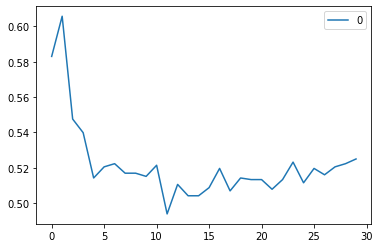

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
foc_knn_clf = neighbors. KNeighborsClassifier(n_neighbors =12)
foc_knn_clf.fit(X_train, y_train)

#cross validate
foc_knn_cv_scores = cross_val_score(foc_knn_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_knn_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_knn_cv_scores)))

Accuracy Scores for the 5 folds:  [0.76846307 0.7744511  0.75848303 0.77245509 0.778     ]
Mean Cross Validation Score: 0.770370459081836433945511544152396


In [ ]:
#generate predictions
foc_knn_preds = foc_knn_clf.predict(X_test)

#get score report on predictions
foc_knn_report = classification_report(y_test, foc_knn_preds)
print(foc_knn_report)

              precision    recall  f1-score   support

           0       0.93      0.55      0.69        47
           1       0.67      0.32      0.43       110
           2       0.81      0.97      0.89       812
           3       0.57      0.11      0.19       105

    accuracy                           0.80      1074
   macro avg       0.75      0.49      0.55      1074
weighted avg       0.78      0.80      0.76      1074



In [ ]:
#more performance metrics
foc_knn_score_train = foc_knn_clf.score(X_train, y_train)
foc_knn_score_test = foc_knn_clf.score(X_test, y_test)
foc_knn_prec_test = precision_score(y_test, foc_knn_preds, average='weighted')
foc_knn_recall_test = recall_score(y_test,foc_knn_preds, average='weighted')
foc_knn_f1_test = f1_score(y_test, foc_knn_preds, average='weighted')
foc_knn_rsquared_train = foc_knn_clf.score(X_train, y_train)
foc_knn_rsquared_test = foc_knn_clf.score(X_test, y_test)
foc_knn_mae = mean_absolute_error(y_test, foc_knn_preds)
foc_knn_mse = mse(y_test, foc_knn_preds)
foc_knn_rmse = rmse(y_test, foc_knn_preds)
foc_knn_mape = np.mean(np.abs((y_test - foc_knn_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_knn_dictionary = {'Training Set Accuracy': foc_knn_score_train, 
  'Test Set Accuracy': foc_knn_score_test, 'Testing Set Precision': foc_knn_prec_test, 
'Testing Set Recall': foc_knn_recall_test, 'Testing Set F1':foc_knn_f1_test,
'Training Set R Squared': foc_knn_rsquared_train, 
  'Test Set R Squared': foc_knn_rsquared_test, 'Mean Absolute Error': foc_knn_mae, 
  'Mean Sqaured Error': foc_knn_mse, 'Root Mean Squared Error': foc_knn_rmse}

foc_knn_df = pd.DataFrame(foc_knn_dictionary, index=[0])

foc_knn_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.801118,0.803538,0.779294,0.803538,0.762442,0.801118,0.803538,0.212291,0.243948,0.493911


##**15. Cross Validation with KNN Weighted** <a name="30"></a>

In [ ]:
#find best value for k, weighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K, weights='distance')

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.5829674298008133
RMSe Value for K=  2 is  0.5829674298008133
RMSe Value for K=  3 is  0.5424271269783036
RMSe Value for K=  4 is  0.5196331609644723
RMSe Value for K=  5 is  0.5105953730786356
RMSe Value for K=  6 is  0.521421920681182
RMSe Value for K=  7 is  0.5169384159496601
RMSe Value for K=  8 is  0.5187364680427504
RMSe Value for K=  9 is  0.5169384159496601
RMSe Value for K=  10 is  0.512415683212599
RMSe Value for K=  11 is  0.5142295497102032
RMSe Value for K=  12 is  0.5133234176410584
RMSe Value for K=  13 is  0.506015949874114
RMSe Value for K=  14 is  0.5087685501447464
RMSe Value for K=  15 is  0.5004653328136035
RMSe Value for K=  16 is  0.5105953730786356
RMSe Value for K=  17 is  0.5087685501447464
RMSe Value for K=  18 is  0.5078526744243113
RMSe Value for K=  19 is  0.511506337894041
RMSe Value for K=  20 is  0.511506337894041
RMSe Value for K=  21 is  0.5133234176410584
RMSe Value for K=  22 is  0.5105953730786356
RMSe Value for K=  23 is

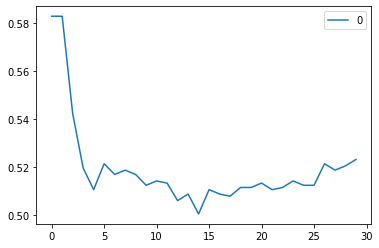

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
foc_knn_w_clf = neighbors. KNeighborsClassifier(n_neighbors =15, weights='distance')
foc_knn_w_clf.fit(X_train, y_train)

#cross validate
foc_knn_w_cv_scores = cross_val_score(foc_knn_w_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_knn_w_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_knn_w_cv_scores)))

Accuracy Scores for the 5 folds:  [0.77644711 0.76247505 0.76846307 0.76646707 0.782     ]
Mean Cross Validation Score: 0.771170459081836456860514772415627


In [ ]:
#generate predictions
foc_knn_w_preds = foc_knn_w_clf.predict(X_test)

#get score report on predictions
foc_knn_w_report = classification_report(y_test, foc_knn_w_preds)
print(foc_knn_w_report)

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        47
           1       0.68      0.27      0.39       110
           2       0.81      0.98      0.88       812
           3       0.46      0.12      0.20       105

    accuracy                           0.80      1074
   macro avg       0.74      0.45      0.52      1074
weighted avg       0.77      0.80      0.75      1074



In [ ]:
#more performance metrics
foc_knn_w_score_train = foc_knn_w_clf.score(X_train, y_train)
foc_knn_w_score_test = foc_knn_w_clf.score(X_test, y_test)
foc_knn_w_prec_test = precision_score(y_test, foc_knn_w_preds, average='weighted')
foc_knn_w_recall_test = recall_score(y_test, foc_knn_w_preds, average='weighted')
foc_knn_w_f1_test = f1_score(y_test, foc_knn_w_preds, average='weighted')
foc_knn_w_rsquared_train = foc_knn_w_clf.score(X_train, y_train)
foc_knn_w_rsquared_test = foc_knn_w_clf.score(X_test, y_test)
foc_knn_w_mae = mean_absolute_error(y_test, foc_knn_w_preds)
foc_knn_w_mse = mse(y_test, foc_knn_w_preds)
foc_knn_w_rmse = rmse(y_test, foc_knn_w_preds)
foc_knn_w_mape = np.mean(np.abs((y_test - foc_knn_w_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_knn_w_dictionary = {'Training Set Accuracy': foc_knn_w_score_train, 
  'Test Set Accuracy': foc_knn_w_score_test, 'Testing Set Precision': foc_knn_w_prec_test, 
'Testing Set Recall':foc_knn_w_recall_test, 'Testing Set F1':foc_knn_w_f1_test,
 'Training Set R Squared': foc_knn_w_rsquared_train, 
  'Test Set R Squared': foc_knn_w_rsquared_test,'Mean Absolute Error': foc_knn_w_mae, 
  'Mean Sqaured Error': foc_knn_w_mse,  'Root Mean Squared Error': foc_knn_w_rmse}

foc_knn_w_df = pd.DataFrame(foc_knn_w_dictionary, index=[0])

foc_knn_w_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.79702,0.769376,0.79702,0.753969,1.0,0.79702,0.218808,0.250466,0.500465


##**16. Cross Validation with SVM wth focused_illinois_df features.** <a name="31"></a>

In [ ]:
#set model with ideal number of neighbors from above
foc_svm_clf = svm.SVC(kernel = 'linear', C=1, decision_function_shape='ovo')
foc_svm_clf.fit(X_train, y_train)

#cross validate
foc_svm_cv_scores = cross_val_score(foc_svm_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_svm_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_svm_cv_scores)))

Accuracy Scores for the 5 folds:  [0.8502994  0.85828343 0.85229541 0.84231537 0.842     ]
Mean Cross Validation Score: 0.849038722554890212812495065008989


In [ ]:
#generate predictions
foc_svm_preds = foc_svm_clf.predict(X_test)

#get score report on predictions
foc_svm_report = classification_report(y_test, foc_svm_preds)
print(foc_svm_report)

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        47
           1       0.96      0.95      0.95       110
           2       0.87      0.99      0.93       812
           3       0.00      0.00      0.00       105

    accuracy                           0.87      1074
   macro avg       0.63      0.61      0.61      1074
weighted avg       0.78      0.87      0.82      1074



In [ ]:
#more performance metrics
foc_svm_score_train = foc_svm_clf.score(X_train, y_train)
foc_svm_score_test = foc_svm_clf.score(X_test, y_test)
foc_svm_prec_test = precision_score(y_test, foc_svm_preds, average='weighted')
foc_svm_recall_test = recall_score(y_test, foc_svm_preds, average='weighted')
foc_svm_f1_test = f1_score(y_test, foc_svm_preds, average='weighted')
foc_svm_rsquared_train = foc_svm_clf.score(X_train, y_train)
foc_svm_rsquared_test = foc_svm_clf.score(X_test, y_test)
foc_svm_mae = mean_absolute_error(y_test, foc_svm_preds)
foc_svm_mse = mse(y_test, foc_svm_preds)
foc_svm_rmse = rmse(y_test, foc_svm_preds)
foc_svm_mape = np.mean(np.abs((y_test - foc_svm_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_svm_dictionary = {'Training Set Accuracy': foc_svm_score_train, 
  'Test Set Accuracy': foc_svm_score_test, 'Testing Set Precision': foc_svm_prec_test, 
'Testing Set Recall': foc_svm_recall_test, 'Testing Set F1':foc_svm_f1_test,
'Training Set R Squared': foc_svm_rsquared_train, 
  'Test Set R Squared': foc_svm_rsquared_test,'Mean Absolute Error': foc_svm_mae, 
  'Mean Sqaured Error': foc_svm_mse,  'Root Mean Squared Error': foc_svm_rmse}

foc_svm_df = pd.DataFrame(foc_svm_dictionary, index=[0])

foc_svm_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.859026,0.869646,0.782881,0.869646,0.82227,0.859026,0.869646,0.153631,0.200186,0.447422


##**17. Cross Fold Validation with Gradient Boosting** <a name="32"></a>

In [ ]:
#set model parameters
params = {'n_estimators': 2000,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate':0.2, 
          'max_features':4}

#set model 
foc_gb_clf = ensemble.GradientBoostingClassifier(**params)
foc_gb_clf.fit(X_train, y_train)

#cross validate
foc_gb_cv_scores = cross_val_score(foc_gb_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_gb_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_gb_cv_scores)))

Accuracy Scores for the 5 folds:  [0.86826347 0.84031936 0.85628743 0.84630739 0.868     ]
Mean Cross Validation Score: 0.855835528942115786321664927527308


In [ ]:
#generate predictions
foc_gb_preds = foc_gb_clf.predict(X_test)

#get score report on predictions
foc_gb_report = classification_report(y_test, foc_gb_preds)
print(foc_gb_report)

              precision    recall  f1-score   support

           0       0.69      0.57      0.63        47
           1       0.97      0.99      0.98       110
           2       0.90      0.94      0.92       812
           3       0.49      0.31      0.38       105

    accuracy                           0.87      1074
   macro avg       0.76      0.71      0.73      1074
weighted avg       0.86      0.87      0.86      1074



In [ ]:
#more performance metrics
foc_gb_score_train = foc_gb_clf.score(X_train, y_train)
foc_gb_score_test = foc_gb_clf.score(X_test, y_test)
foc_gb_prec_test = precision_score(y_test, foc_gb_preds, average='weighted')
foc_gb_recall_test = recall_score(y_test, foc_gb_preds, average='weighted')
foc_gb_f1_test = f1_score(y_test, foc_gb_preds, average='weighted')
foc_gb_rsquared_train = foc_gb_clf.score(X_train, y_train)
foc_gb_rsquared_test = foc_gb_clf.score(X_test, y_test)
foc_gb_mae = mean_absolute_error(y_test, foc_gb_preds)
foc_gb_mse = mse(y_test, foc_gb_preds)
foc_gb_rmse = rmse(y_test, foc_gb_preds)
foc_gb_mape = np.mean(np.abs((y_test - foc_gb_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_gb_dictionary = {'Training Set Accuracy': foc_gb_score_train, 
  'Test Set Accuracy': foc_gb_score_test,'Testing Set Precision': foc_gb_prec_test, 
'Testing Set Recall': foc_gb_recall_test, 'Testing Set F1':foc_gb_f1_test,
 'Training Set R Squared': foc_gb_rsquared_train, 
  'Test Set R Squared': foc_gb_rsquared_test,'Mean Absolute Error': foc_gb_mae, 
  'Mean Sqaured Error': foc_gb_mse, 'Root Mean Squared Error': foc_gb_rmse}

foc_gb_df = pd.DataFrame(foc_gb_dictionary, index=[0])

foc_gb_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.871508,0.855571,0.871508,0.860882,1.0,0.871508,0.154562,0.206704,0.454647


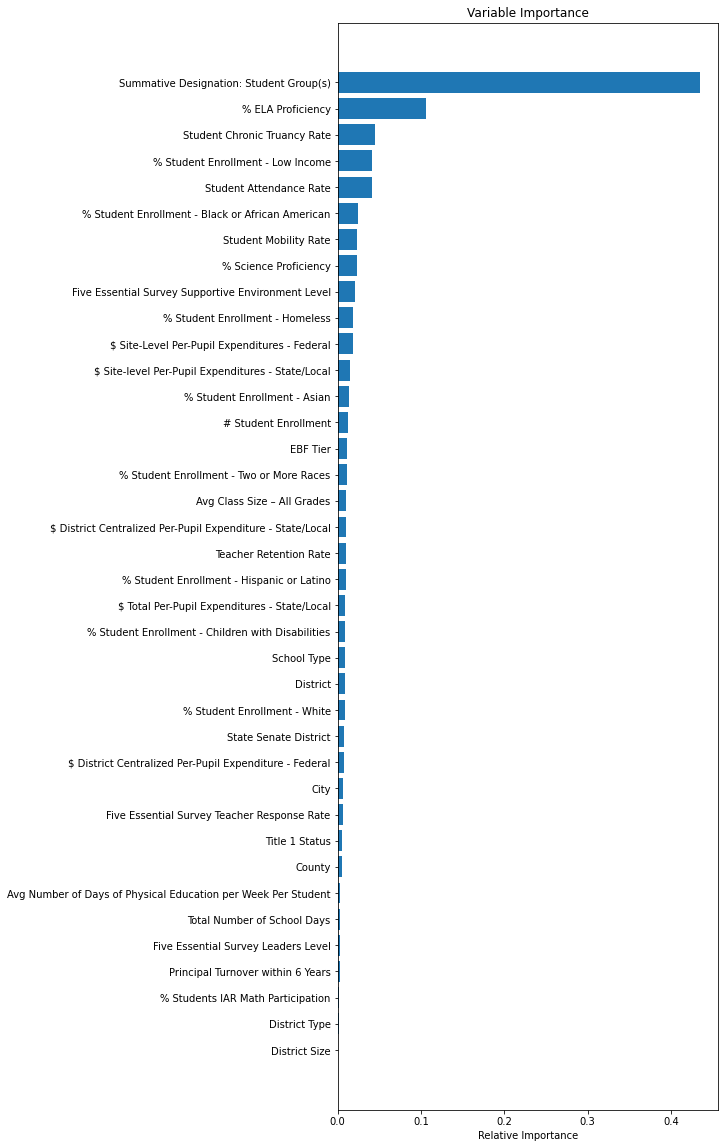

In [ ]:
#feature importance
feature_importance = foc_gb_clf.feature_importances_

#make importances relative to max importance
plt.figure(figsize=(15,20))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# **Regression Model Testing with all focused_illinois_df features** <a name="33"></a>

##**18. Cross Validation with KNN Unweighted Regression** <a name="34"></a>

In [ ]:
#find best value for k, unweighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K)

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5829674298008133
RMSe Value for K=  2 is  0.5011625219133782
RMSe Value for K=  3 is  0.47544723410572864
RMSe Value for K=  4 is  0.46981760793948685
RMSe Value for K=  5 is  0.4670921178471489
RMSe Value for K=  6 is  0.4615351456480015
RMSe Value for K=  7 is  0.45758408475233225
RMSe Value for K=  8 is  0.45554211877051415
RMSe Value for K=  9 is  0.45503874233873803
RMSe Value for K=  10 is  0.4505428135212485
RMSe Value for K=  11 is  0.4529937964888893
RMSe Value for K=  12 is  0.45128532212062317
RMSe Value for K=  13 is  0.4523204478389126
RMSe Value for K=  14 is  0.4525104475752438
RMSe Value for K=  15 is  0.4510740796889871
RMSe Value for K=  16 is  0.4524457319537101
RMSe Value for K=  17 is  0.4530106656723467
RMSe Value for K=  18 is  0.452629345709156
RMSe Value for K=  19 is  0.4511389039209899
RMSe Value for K=  20 is  0.45133260165695516
RMSe Value for K=  21 is  0.45045046243370246
RMSe Value for K=  22 is  0.4517371347296594
RMSe Value f

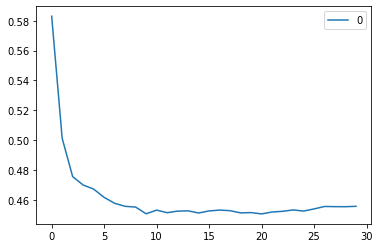

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
foc_knn_reg = neighbors. KNeighborsRegressor(n_neighbors =21)
foc_knn_reg.fit(X_train, y_train)

#cross validate
foc_knn_reg_cv_scores = cross_val_score(foc_knn_reg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_knn_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_knn_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.4181613  0.39684991 0.39161487 0.40853616 0.43482154]
Mean Cross Validation Score: 0.409996753685777037823356749868253


In [ ]:
#generate predictions
foc_knn_reg_preds = foc_knn_reg.predict(X_test)

In [ ]:
#more performance metrics
foc_knn_reg_rsquared_train = foc_knn_reg.score(X_train, y_train)
foc_knn_reg_rsquared_test = foc_knn_reg.score(X_test, y_test)
foc_knn_reg_mae = mean_absolute_error(y_test, foc_knn_reg_preds)
foc_knn_reg_mse = mse(y_test, foc_knn_reg_preds)
foc_knn_reg_rmse = rmse(y_test, foc_knn_reg_preds)
foc_knn_reg_mape = np.mean(np.abs((y_test - foc_knn_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_knn_reg_dictionary = {'Training Set R Squared': foc_knn_reg_rsquared_train, 
  'Test Set R Squared': foc_knn_reg_rsquared_test, 'Mean Absolute Error': foc_knn_reg_mae, 
  'Mean Sqaured Error': foc_knn_reg_mse, 'Root Mean Squared Error': foc_knn_reg_rmse,
  'Mean Absolute Percentage Error': foc_knn_reg_mape}

foc_knn_reg_df = pd.DataFrame(knn_reg_dictionary, index=[0])

foc_knn_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.495184,0.448234,0.308859,0.202352,0.449836,inf


##**19. Cross Validation with KNN Weighted Regression** <a name="35"></a>

In [ ]:
#find best value for k, weighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K, weights='distance')

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.5829674298008133
RMSe Value for K=  2 is  0.4994253520105508
RMSe Value for K=  3 is  0.4731174773760366
RMSe Value for K=  4 is  0.4671093529731661
RMSe Value for K=  5 is  0.46410488888851537
RMSe Value for K=  6 is  0.45861165040818713
RMSe Value for K=  7 is  0.4544964364620134
RMSe Value for K=  8 is  0.4524289956776426
RMSe Value for K=  9 is  0.4518622461484959
RMSe Value for K=  10 is  0.44764060471886963
RMSe Value for K=  11 is  0.44979114689288807
RMSe Value for K=  12 is  0.4483248414702601
RMSe Value for K=  13 is  0.4491487169442879
RMSe Value for K=  14 is  0.44916159673987904
RMSe Value for K=  15 is  0.4479066015796628
RMSe Value for K=  16 is  0.4492508036656195
RMSe Value for K=  17 is  0.4496774948081632
RMSe Value for K=  18 is  0.4493364659072345
RMSe Value for K=  19 is  0.44802078656060557
RMSe Value for K=  20 is  0.44821290599967933
RMSe Value for K=  21 is  0.4474016424052339
RMSe Value for K=  22 is  0.4485926284059058
RMSe Value f

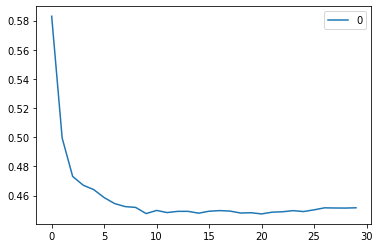

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
foc_knn_wreg = neighbors.KNeighborsRegressor(n_neighbors =21)
foc_knn_wreg.fit(X_train, y_train)

#cross validate
foc_knn_wreg_cv_scores = cross_val_score(foc_knn_wreg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_knn_wreg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_knn_wreg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.4181613  0.39684991 0.39161487 0.40853616 0.43482154]
Mean Cross Validation Score: 0.409996753685777037823356749868253


In [ ]:
#generate predictions
foc_knn_wreg_preds = foc_knn_wreg.predict(X_test)

In [ ]:
#more performance metrics
foc_knn_wreg_rsquared_train = foc_knn_wreg.score(X_train, y_train)
foc_knn_wreg_rsquared_test = foc_knn_wreg.score(X_test, y_test)
foc_knn_wreg_mae = mean_absolute_error(y_test, foc_knn_wreg_preds)
foc_knn_wreg_mse = mse(y_test, foc_knn_wreg_preds)
foc_knn_wreg_rmse = rmse(y_test, foc_knn_wreg_preds)
foc_knn_wreg_mape = np.mean(np.abs((y_test - foc_knn_wreg_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_knn_wreg_dictionary = {'Training Set R Squared': foc_knn_wreg_rsquared_train, 
  'Test Set R Squared': foc_knn_wreg_rsquared_test, 'Mean Absolute Error': foc_knn_wreg_mae, 
  'Mean Sqaured Error': foc_knn_wreg_mse, 'Root Mean Squared Error': foc_knn_wreg_rmse,
  'Mean Absolute Percentage Error': foc_knn_wreg_mape}

foc_knn_wreg_df = pd.DataFrame(foc_knn_wreg_dictionary, index=[0])

foc_knn_wreg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.469164,0.446725,0.310233,0.202906,0.45045,inf


##**20. Cross Validation with Random Forest Regression** <a name="36"></a>

In [ ]:
#Instanstiate RandomForest regressor
foc_rf_reg = RandomForestRegressor(n_estimators =30 , random_state = 52)
foc_rf_reg.fit(X_train, y_train)

#cross validate
foc_rf_reg_cv_scores = cross_val_score(rf_reg, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_rf_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_rf_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53723627 0.5299701  0.59589051 0.53064555 0.58093238]
Mean Cross Validation Score: 0.554934962487737770686635485617444


In [ ]:
#generate predictions
foc_rf_reg_preds = foc_rf_reg.predict(X_test)

In [ ]:
#more performance metrics
foc_rf_reg_rsquared_train = foc_rf_reg.score(X_train, y_train)
foc_rf_reg_rsquared_test = foc_rf_reg.score(X_test, y_test)
foc_rf_reg_mae = mean_absolute_error(y_test, foc_rf_reg_preds)
foc_rf_reg_mse = mse(y_test, foc_rf_reg_preds)
foc_rf_reg_rmse = rmse(y_test, foc_rf_reg_preds)
foc_rf_reg_mape = np.mean(np.abs((y_test - foc_rf_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
foc_rf_reg_dictionary = {'Training Set R Squared': foc_rf_reg_rsquared_train, 
  'Test Set R Squared': foc_rf_reg_rsquared_test, 'Mean Absolute Error': foc_rf_reg_mae, 
  'Mean Sqaured Error': foc_rf_reg_mse, 'Root Mean Squared Error': foc_rf_reg_rmse,
  'Mean Absolute Percentage Error': foc_rf_reg_mape}

foc_rf_reg_df = pd.DataFrame(foc_rf_reg_dictionary, index=[0])

foc_rf_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.932501,0.63345,0.213998,0.134427,0.366643,inf


##**21. Cross Validation with SVM Regressor with focused_illinois_df features.** <a name="37"></a>

In [ ]:
#reshape y, was having issues with model without doing it
y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

#set model with ideal number of neighbors from above
foc_svm_reg = svm.SVR(kernel = 'linear', C=1, max_iter= 100)
foc_svm_reg.fit(X_train, y_train)

#cross validate
foc_svm_reg_cv_scores = cross_val_score(foc_svm_reg, X_train, y_train.ravel(), cv = 5)

print('Accuracy Scores for the 5 folds: ', foc_svm_reg_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(foc_svm_reg_cv_scores)))

Accuracy Scores for the 5 folds:  [-1.15967472 -0.86832246 -2.1037473  -0.84376735 -0.95916629]
Mean Cross Validation Score: -1.186935624132034572397742522298358


In [ ]:
#generate predictions
foc_svm_reg_preds = foc_svm_reg.predict(X_test)

In [ ]:
#more performance metrics
foc_svm_reg_rsquared_train = foc_svm_reg.score(X_train, y_train)
foc_svm_reg_rsquared_test = foc_svm_reg.score(X_test, y_test)
foc_svm_reg_mae = mean_absolute_error(y_test, foc_svm_reg_preds)
foc_svm_reg_mse = mse(y_test, foc_svm_reg_preds)
foc_svm_reg_rmse = rmse(y_test, foc_svm_reg_preds)
foc_svm_reg_mape = np.mean(np.abs((y_test - foc_svm_reg_preds)/y_test)*100)

#create easily readable display of performance metrics
svm_reg_dictionary = {'Training Set R Squared': svm_reg_rsquared_train, 
  'Test Set R Squared': svm_reg_rsquared_test,'Mean Absolute Error': svm_reg_mae, 
  'Mean Sqaured Error': svm_reg_mse,  'Root Mean Squared Error': svm_reg_rmse, 
  'Mean Absolute Percentage Error': svm_reg_mape}

svm_reg_df = pd.DataFrame(svm_reg_dictionary, index=[1])

svm_reg_df

,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
1,-0.392154,-0.551876,0.589997,0.569129,0.754406,inf


# **Prep for Building all illinois_df Models With log(y)** <a name="38"></a>

Since the classification models with all_illinois features performed better overall, let's investigate if they are improved by log transforming y.

In [ ]:
illinois_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3578 entries, 0 to 3861
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   District                                                       3578 non-null   int64  
 1   City                                                           3578 non-null   int64  
 2   County                                                         3578 non-null   int64  
 3   District Type                                                  3578 non-null   int64  
 4   District Size                                                  3578 non-null   int64  
 5   School Type                                                    3578 non-null   int64  
 6   Summative Designation                                          3578 non-null   object 
 7   Summative Designation: Student Group(s)                     

In [ ]:
#take log of Summative Designation to test improved model performance.

#set features & targets
X=illinois_df.drop(['Summative Designation'],1)
y= np.log1p(illinois_df['Summative Designation'].astype(int))
y=y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

In [ ]:
#investigate distribution of target classes
np.bincount(y)

array([ 528, 3050])

In [ ]:
#standardize the data
scaler = StandardScaler()

#fit training set
scaler.fit(X_train)
scaler.fit(X_test)

#apply transformation to training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#test for normality of log y
jb_stats = jarque_bera(y)
norm_stats = normaltest(y)
print(jb_stats)
print(norm_stats)
if jb_stats[1] < 0.05 and norm_stats[1]<0.05:
    print('Evidence to suggest log y IS NOT normally distributed')
else:
    print('Evidence to support log y is normally distributed.')

(2921.9701803387857, 0.0)
NormaltestResult(statistic=1217.7296535043015, pvalue=3.744255846205507e-265)
Evidence to suggest log y IS NOT normally distributed


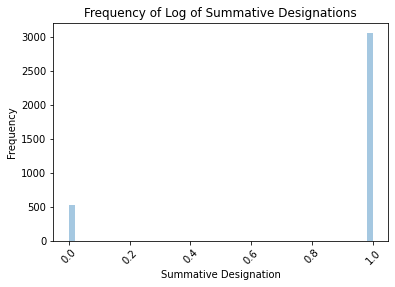

In [ ]:
#visualize log of y
all_illinois =sns.distplot(y, kde = False)
plt.xlabel('Summative Designation')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Summative Designations')
plt.xticks(rotation = 45)
plt.show()

# **Classification Model Testing with all focused_illinois_df features & log of y** <a name="39"></a>


##**22. Cross Validation with Logistic Regression Classifier** <a name="40"></a>

In [ ]:
#Instanstiate LogisticRegression classifier
log_lr_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter=1000)
log_lr_clf.fit(X_train, y_train)

#cross validate
log_lr_cv_scores = cross_val_score(log_lr_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.95608782 0.96207585 0.98003992 0.96207585 0.968     ]
Mean Cross Validation Score: 0.965655888223552971716401316371048


In [ ]:
#generate predictions
log_lr_preds = log_lr_clf.predict(X_test)

#get score report on predictions
log_lr_report = classification_report(y_test, log_lr_preds)
print(log_lr_report)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       157
           1       0.98      1.00      0.99       917

    accuracy                           0.98      1074
   macro avg       0.98      0.93      0.95      1074
weighted avg       0.98      0.98      0.98      1074



In [ ]:
#more performance metrics
log_lr_score_train = log_lr_clf.score(X_train, y_train)
log_lr_score_test = log_lr_clf.score(X_test, y_test)
log_lr_prec_test = precision_score(y_test, log_lr_preds, average='weighted')
log_lr_recall_test = recall_score(y_test, log_lr_preds, average='weighted')
log_lr_f1_test = f1_score(y_test, log_lr_preds, average='weighted')
log_lr_rsquared_train = log_lr_clf.score(X_train, y_train)
log_lr_rsquared_test = log_lr_clf.score(X_test, y_test)
log_lr_mae = mean_absolute_error(y_test, log_lr_preds)
log_lr_mse = mse(y_test, log_lr_preds)
log_lr_rmse = rmse(y_test, log_lr_preds)
log_lr_mape = np.mean(np.abs((y_test - log_lr_preds)/y_test)*100)

#create easily readable display of performance metrics
log_lr_dictionary = {'Training Set Accuracy': log_lr_score_train, 
  'Test Set Accuracy': log_lr_score_test,'Testing Set Precision': log_lr_prec_test, 
'Testing Set Recall': log_lr_recall_test, 'Testing Set F1':log_lr_f1_test,
'Training Set R Squared': log_lr_rsquared_train, 
  'Test Set R Squared': log_lr_rsquared_test, 'Mean Absolute Error': log_lr_mae, 
  'Mean Sqaured Error': log_lr_mse, 'Root Mean Squared Error': log_lr_rmse,
  'Mean Absolute Percentage Error': log_lr_mape}

log_lr_df = pd.DataFrame(log_lr_dictionary, index=[0])

log_lr_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.970447,0.976723,0.976754,0.976723,0.976092,0.970447,0.976723,0.023277,0.023277,0.15257,inf


In [ ]:
lr_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.86222,0.859404,0.835073,0.859404,0.838649,0.86222,0.859404,0.164804,0.213222,0.461759


##**23. Cross Validation with Random Forest Classifier** <a name="41"></a>

In [ ]:
#Instanstiate RandomForest classifier
log_rf_clf = RandomForestClassifier(n_estimators =30 , random_state = 52)
log_rf_clf.fit(X_train, y_train)

#cross validate
log_rf_cv_scores = cross_val_score(log_rf_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_rf_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_rf_cv_scores)))

Accuracy Scores for the 5 folds:  [0.96407186 0.96806387 0.9740519  0.96407186 0.974     ]
Mean Cross Validation Score: 0.968851896207584828424330680718413


In [ ]:
#generate predictions
log_rf_preds = log_rf_clf.predict(X_test)

#get score report on predictions
log_rf_report = classification_report(y_test, log_rf_preds)
print(log_rf_report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       157
           1       0.99      1.00      0.99       917

    accuracy                           0.99      1074
   macro avg       0.99      0.96      0.97      1074
weighted avg       0.99      0.99      0.99      1074



In [ ]:
#more performance metrics
log_rf_score_train = log_rf_clf.score(X_train, y_train)
log_rf_score_test = log_rf_clf.score(X_test, y_test)
log_rf_prec_test = precision_score(y_test, log_rf_preds, average='weighted')
log_rf_recall_test = recall_score(y_test, log_rf_preds, average='weighted')
log_rf_f1_test = f1_score(y_test, log_rf_preds, average='weighted')
log_rf_rsquared_train = log_rf_clf.score(X_train, y_train)
log_rf_rsquared_test = log_rf_clf.score(X_test, y_test)
log_rf_mae = mean_absolute_error(y_test, log_rf_preds)
log_rf_mse = mse(y_test, log_rf_preds)
log_rf_rmse = rmse(y_test, log_rf_preds)
log_rf_mape = np.mean(np.abs((y_test - log_rf_preds)/y_test)*100)

#create easily readable display of performance metrics
log_rf_dictionary = {'Training Set Accuracy': log_rf_score_train, 
  'Test Set Accuracy': log_rf_score_test,'Testing Set Precision': log_rf_prec_test, 
'Testing Set Recall': log_rf_recall_test, 'Testing Set F1':log_rf_f1_test,
'Training Set R Squared': log_rf_rsquared_train, 
  'Test Set R Squared':log_rf_rsquared_test, 'Mean Absolute Error': log_rf_mae, 
  'Mean Sqaured Error': log_rf_mse, 'Root Mean Squared Error': log_rf_rmse,
  'Mean Absolute Percentage Error': log_rf_mape}

log_rf_df = pd.DataFrame(log_rf_dictionary, index=[0])

log_rf_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,1.0,0.986034,0.986037,0.986034,0.985822,1.0,0.986034,0.013966,0.013966,0.11818,inf


In [ ]:
rf_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.998802,0.876164,0.84605,0.876164,0.852199,0.998802,0.876164,0.140596,0.174115,0.417271


##**24. Cross Validation with KNN** <a name="42"></a>

In [ ]:
#find best value for k, unweighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K)

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.35057813384887665
RMSe Value for K=  2 is  0.3978527094271324
RMSe Value for K=  3 is  0.3272252283872835
RMSe Value for K=  4 is  0.3492476617480768
RMSe Value for K=  5 is  0.3243673113927885
RMSe Value for K=  6 is  0.3370371507242824
RMSe Value for K=  7 is  0.33005840011433357
RMSe Value for K=  8 is  0.3257994036161639
RMSe Value for K=  9 is  0.3272252283872835
RMSe Value for K=  10 is  0.3286448672801261
RMSe Value for K=  11 is  0.33146590500758194
RMSe Value for K=  12 is  0.3397885200551459
RMSe Value for K=  13 is  0.3257994036161639
RMSe Value for K=  14 is  0.3243673113927885
RMSe Value for K=  15 is  0.3200325867951586
RMSe Value for K=  16 is  0.32148398919271637
RMSe Value for K=  17 is  0.32148398919271637
RMSe Value for K=  18 is  0.3185745719832939
RMSe Value for K=  19 is  0.32148398919271637
RMSe Value for K=  20 is  0.3185745719832939
RMSe Value for K=  21 is  0.33005840011433357
RMSe Value for K=  22 is  0.32292886833438167
RMSe Value 

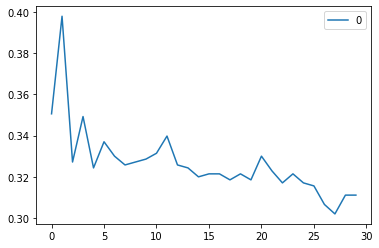

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
log_knn_clf = neighbors. KNeighborsClassifier(n_neighbors =28)
log_knn_clf.fit(X_train, y_train)

#cross validate
log_knn_cv_scores = cross_val_score(log_knn_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_knn_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_knn_cv_scores)))

Accuracy Scores for the 5 folds:  [0.89221557 0.90818363 0.88023952 0.9001996  0.908     ]
Mean Cross Validation Score: 0.897767664670658716019602252345067


In [ ]:
#generate predictions
log_knn_preds = log_knn_clf.predict(X_test)

#get score report on predictions
log_knn_report = classification_report(y_test, log_knn_preds)
print(log_knn_report)

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       157
           1       0.92      0.98      0.95       917

    accuracy                           0.91      1074
   macro avg       0.87      0.73      0.78      1074
weighted avg       0.90      0.91      0.90      1074



In [ ]:
#more performance metrics
log_knn_score_train = log_knn_clf.score(X_train, y_train)
log_knn_score_test = log_knn_clf.score(X_test, y_test)
log_knn_prec_test = precision_score(y_test, log_knn_preds, average='weighted')
log_knn_recall_test = recall_score(y_test, log_knn_preds, average='weighted')
log_knn_f1_test = f1_score(y_test, log_knn_preds, average='weighted')
log_knn_rsquared_train = log_knn_clf.score(X_train, y_train)
log_knn_rsquared_test = log_knn_clf.score(X_test, y_test)
log_knn_mae = mean_absolute_error(y_test, log_knn_preds)
log_knn_mse = mse(y_test, log_knn_preds)
log_knn_rmse = rmse(y_test, log_knn_preds)
log_knn_mape = np.mean(np.abs((y_test - log_knn_preds)/y_test)*100)

#create easily readable display of performance metrics
log_knn_dictionary = {'Training Set Accuracy': log_knn_score_train, 
  'Test Set Accuracy': log_knn_score_test,'Testing Set Precision': log_knn_prec_test, 
'Testing Set Recall': log_knn_recall_test, 'Testing Set F1':log_knn_f1_test,
'Training Set R Squared': log_knn_rsquared_train, 
  'Test Set R Squared': log_knn_rsquared_test, 'Mean Absolute Error': log_knn_mae, 
  'Mean Sqaured Error': log_knn_mse, 'Root Mean Squared Error': log_knn_rmse,
  'Mean Absolute Percentage Error': log_knn_mape}

log_knn_df = pd.DataFrame(log_knn_dictionary, index=[0])

log_knn_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.902157,0.908752,0.903416,0.908752,0.897772,0.902157,0.908752,0.091248,0.091248,0.302072,inf


In [ ]:
knn_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.784744,0.792365,0.75154,0.792365,0.739465,0.784744,0.792365,0.223464,0.255121,0.505095,inf


##**25. Cross Validation with KNN Weighted** <a name="43"></a>

In [ ]:
#find best value for k, weighted
rmse_val = [] #to store rmse values for different k
for K in range (30):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K, weights='distance')

  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.35057813384887665
RMSe Value for K=  2 is  0.35057813384887665
RMSe Value for K=  3 is  0.3272252283872835
RMSe Value for K=  4 is  0.3286448672801261
RMSe Value for K=  5 is  0.32292886833438167
RMSe Value for K=  6 is  0.317109853549014
RMSe Value for K=  7 is  0.3272252283872835
RMSe Value for K=  8 is  0.3200325867951586
RMSe Value for K=  9 is  0.3257994036161639
RMSe Value for K=  10 is  0.31563833816793435
RMSe Value for K=  11 is  0.33005840011433357
RMSe Value for K=  12 is  0.3286448672801261
RMSe Value for K=  13 is  0.3243673113927885
RMSe Value for K=  14 is  0.32292886833438167
RMSe Value for K=  15 is  0.3200325867951586
RMSe Value for K=  16 is  0.3243673113927885
RMSe Value for K=  17 is  0.32148398919271637
RMSe Value for K=  18 is  0.32148398919271637
RMSe Value for K=  19 is  0.3200325867951586
RMSe Value for K=  20 is  0.3200325867951586
RMSe Value for K=  21 is  0.3243673113927885
RMSe Value for K=  22 is  0.3185745719832939
RMSe Value f

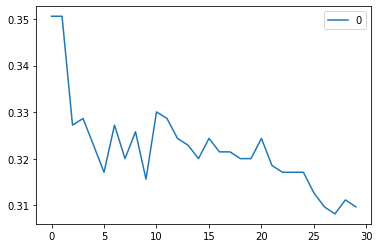

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
log_knn_w_clf = neighbors. KNeighborsClassifier(n_neighbors =28, weights='distance')
log_knn_w_clf.fit(X_train, y_train)

#cross validate
log_knn_w_cv_scores = cross_val_score(log_knn_w_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_knn_w_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_knn_w_cv_scores)))

Accuracy Scores for the 5 folds:  [0.88822355 0.9001996  0.88023952 0.89421158 0.908     ]
Mean Cross Validation Score: 0.894174850299401358100226389069576


In [ ]:
#generate predictions
log_knn_w_preds = log_knn_w_clf.predict(X_test)

#get score report on predictions
log_knn_w_report = classification_report(y_test, log_knn_w_preds)
print(log_knn_report)

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       157
           1       0.92      0.98      0.95       917

    accuracy                           0.91      1074
   macro avg       0.87      0.73      0.78      1074
weighted avg       0.90      0.91      0.90      1074



In [ ]:
#more performance metrics
log_knn_w_score_train = log_knn_w_clf.score(X_train, y_train)
log_knn_w_score_test = log_knn_w_clf.score(X_test, y_test)
log_knn_w_prec_test = precision_score(y_test, log_knn_w_preds, average='weighted')
log_knn_w_recall_test = recall_score(y_test, log_knn_w_preds, average='weighted')
log_knn_w_f1_test = f1_score(y_test, log_knn_w_preds, average='weighted')
log_knn_w_rsquared_train = log_knn_w_clf.score(X_train, y_train)
log_knn_w_rsquared_test = log_knn_w_clf.score(X_test, y_test)
log_knn_w_mae = mean_absolute_error(y_test, log_knn_w_preds)
log_knn_w_mse = mse(y_test, log_knn_w_preds)
log_knn_w_rmse = rmse(y_test, log_knn_w_preds)
log_knn_w_mape = np.mean(np.abs((y_test - log_knn_w_preds)/y_test)*100)

#create easily readable display of performance metrics
log_knn_w_dictionary = {'Training Set Accuracy': log_knn_w_score_train, 
  'Test Set Accuracy': log_knn_w_score_test,'Testing Set Precision': log_knn_w_prec_test, 
'Testing Set Recall': log_knn_w_recall_test, 'Testing Set F1':log_knn_w_f1_test,
'Training Set R Squared': log_knn_w_rsquared_train, 
  'Test Set R Squared': log_knn_w_rsquared_test,'Mean Absolute Error': log_knn_w_mae, 
  'Mean Sqaured Error': log_knn_w_mse,  'Root Mean Squared Error': log_knn_w_rmse, 
  'Mean Absolute Percentage Error': log_knn_w_mape}

log_knn_w_df = pd.DataFrame(log_knn_w_dictionary, index=[0])

log_knn_w_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,1.0,0.905028,0.901186,0.905028,0.890778,1.0,0.905028,0.094972,0.094972,0.308175,inf


In [ ]:
knn_w_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.791434,0.766796,0.791434,0.76952,1.0,0.791434,0.221601,0.247672,0.497667


##**26. Cross Validation with SVM** <a name="44"></a>

In [ ]:
#set model with ideal number of neighbors from above
log_svm_clf = svm.SVC(kernel = 'linear', C=1, decision_function_shape='ovo')
log_svm_clf.fit(X_train, y_train)

#cross validate
log_svm_cv_scores = cross_val_score(log_svm_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_svm_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_svm_cv_scores)))

Accuracy Scores for the 5 folds:  [0.95808383 0.96207585 0.97804391 0.96007984 0.966     ]
Mean Cross Validation Score: 0.964856686626746506973972827836405


In [ ]:
#generate predictions
log_svm_preds = log_svm_clf.predict(X_test)

#get score report on predictions
log_svm_report = classification_report(y_test, log_svm_preds)
print(log_svm_report)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       157
           1       0.97      1.00      0.98       917

    accuracy                           0.97      1074
   macro avg       0.98      0.92      0.94      1074
weighted avg       0.97      0.97      0.97      1074



In [ ]:
#more performance metrics
log_svm_score_train = log_svm_clf.score(X_train, y_train)
log_svm_score_test = log_svm_clf.score(X_test, y_test)
log_svm_prec_test = precision_score(y_test, log_svm_preds, average='weighted')
log_svm_recall_test = recall_score(y_test, log_svm_preds, average='weighted')
log_svm_f1_test = f1_score(y_test, log_svm_preds, average='weighted')
log_svm_rsquared_train = log_svm_clf.score(X_train, y_train)
log_svm_rsquared_test = log_svm_clf.score(X_test, y_test)
log_svm_mae = mean_absolute_error(y_test, log_svm_preds)
log_svm_mse = mse(y_test, log_svm_preds)
log_svm_rmse = rmse(y_test, log_svm_preds)
log_svm_mape = np.mean(np.abs((y_test - log_svm_preds)/y_test)*100)

#create easily readable display of performance metrics
log_svm_dictionary = {'Training Set Accuracy': log_svm_score_train, 
  'Test Set Accuracy': log_svm_score_test, 'Testing Set Precision': log_svm_prec_test, 
'Testing Set Recall': log_svm_recall_test, 'Testing Set F1':log_svm_f1_test,
'Training Set R Squared': log_svm_rsquared_train, 
  'Test Set R Squared': log_svm_rsquared_test,'Mean Absolute Error': log_svm_mae, 
  'Mean Sqaured Error': log_svm_mse,  'Root Mean Squared Error': log_svm_rmse, 
  'Mean Absolute Percentage Error': log_svm_mape}

log_svm_df = pd.DataFrame(log_svm_dictionary, index=[0])

log_svm_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.972045,0.973929,0.974211,0.973929,0.973019,0.972045,0.973929,0.026071,0.026071,0.161464,inf


In [ ]:
svm_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.872204,0.877095,0.855261,0.877095,0.84711,0.872204,0.877095,0.14432,0.187151,0.432609


##**27. Cross Fold Validation with Gradient Boosting** <a name="45"></a>

In [ ]:
#set model parameters
params = {'n_estimators': 2000,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate':0.2, 
          'max_features':4}

#set model 
log_gb_clf = ensemble.GradientBoostingClassifier(**params)
log_gb_clf.fit(X_train, y_train)

#cross validate
log_gb_cv_scores = cross_val_score(log_gb_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_gb_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_gb_cv_scores)))

Accuracy Scores for the 5 folds:  [0.97005988 0.9760479  0.97804391 0.96007984 0.978     ]
Mean Cross Validation Score: 0.972446307385229524733460948482389


In [ ]:
#generate predictions
log_gb_preds = log_gb_clf.predict(X_test)

#get score report on predictions
log_gb_report = classification_report(y_test, log_gb_preds)
print(log_gb_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       157
           1       0.98      0.99      0.99       917

    accuracy                           0.98      1074
   macro avg       0.97      0.95      0.96      1074
weighted avg       0.98      0.98      0.98      1074



In [ ]:
#more performance metrics
log_gb_score_train = log_gb_clf.score(X_train, y_train)
log_gb_score_test = log_gb_clf.score(X_test, y_test)
log_gb_prec_test = precision_score(y_test, log_gb_preds, average='weighted')
log_gb_recall_test = recall_score(y_test, log_gb_preds, average='weighted')
log_gb_f1_test = f1_score(y_test, log_gb_preds, average='weighted')
log_gb_rsquared_train = log_gb_clf.score(X_train, y_train)
log_gb_rsquared_test = log_gb_clf.score(X_test, y_test)
log_gb_mae = mean_absolute_error(y_test, log_gb_preds)
log_gb_mse = mse(y_test, log_gb_preds)
log_gb_rmse = rmse(y_test, log_gb_preds)
log_gb_mape = np.mean(np.abs((y_test - log_gb_preds)/y_test)*100)

#create easily readable display of performance metrics
log_gb_dictionary = {'Training Set Accuracy': log_gb_score_train, 
  'Test Set Accuracy': log_gb_score_test,'Testing Set Precision': log_gb_prec_test, 
'Testing Set Recall': log_gb_recall_test, 'Testing Set F1':log_gb_f1_test,
'Training Set R Squared': log_gb_rsquared_train, 
  'Test Set R Squared': log_gb_rsquared_test,'Mean Absolute Error': log_gb_mae, 
  'Mean Sqaured Error': log_gb_mse, 'Root Mean Squared Error': log_gb_rmse, 
  'Mean Absolute Percentage Error': log_gb_mape}

log_gb_df = pd.DataFrame(log_gb_dictionary, index=[0])

log_gb_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,1.0,0.978585,0.978333,0.978585,0.978321,1.0,0.978585,0.021415,0.021415,0.14634,inf


In [ ]:
gb_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,1.0,0.876164,0.864415,0.876164,0.868614,1.0,0.876164,0.148976,0.199255,0.44638


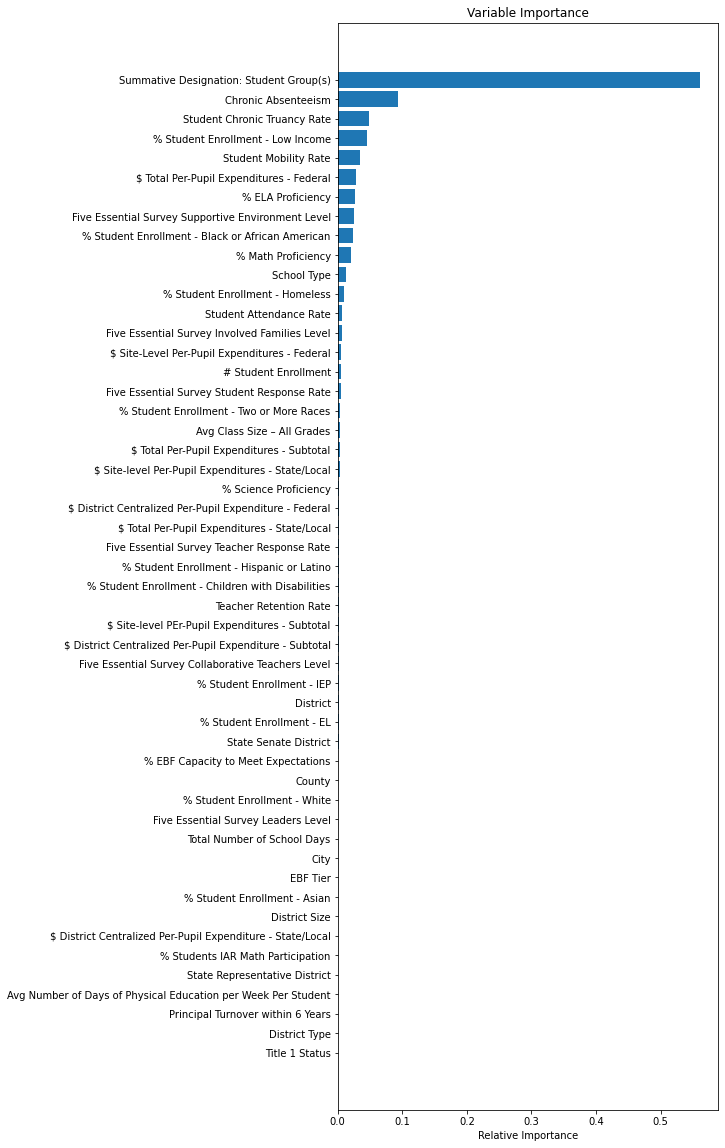

In [ ]:
#feature importance
feature_importance = log_gb_clf.feature_importances_

#make importances relative to max importance
plt.figure(figsize=(15,20))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##**28. Cross Validation with Ridge Classifier** <a name="46"></a>

In [ ]:
#Tuning Regularization Parameter
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

#set model with ideal number of neighbors from above
log_ridge_clf = RidgeClassifierCV(alphas= alphas, cv = 5)
log_ridge_clf.fit(X_train, y_train)

#cross validate
log_ridge_cv_scores = cross_val_score(log_ridge_clf, X_train, y_train, cv = 5)

print('Best alpha value is: {}'.format(log_ridge_clf.alpha_))
print('Accuracy Scores for the 5 folds: ', log_ridge_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_ridge_cv_scores)))

Best alpha value is: 100.0
Accuracy Scores for the 5 folds:  [0.89620758 0.88622754 0.90618762 0.89820359 0.914     ]
Mean Cross Validation Score: 0.900165269461077777179980330402032


In [ ]:
#generate predictions
log_ridge_preds = log_ridge_clf.predict(X_test)

#get score report on predictions
log_ridge_report = classification_report(y_test, log_ridge_preds)
print(log_ridge_report)

              precision    recall  f1-score   support

           0       0.92      0.36      0.51       157
           1       0.90      0.99      0.95       917

    accuracy                           0.90      1074
   macro avg       0.91      0.68      0.73      1074
weighted avg       0.90      0.90      0.88      1074



In [ ]:
#more performance metrics
log_ridge_score_train = log_ridge_clf.score(X_train, y_train)
log_ridge_score_test = log_ridge_clf.score(X_test, y_test)
log_ridge_prec_test = precision_score(y_test, log_ridge_preds, average='weighted')
log_ridge_recall_test = recall_score(y_test, log_ridge_preds, average='weighted')
log_ridge_f1_test = f1_score(y_test, log_ridge_preds, average='weighted')
log_ridge_score_train = log_ridge_clf.score(X_train, y_train)
log_ridge_score_test = log_ridge_clf.score(X_test, y_test)
log_ridge_rsquared_train = log_ridge_clf.score(X_train, y_train)
log_ridge_rsquared_test = log_ridge_clf.score(X_test, y_test)
log_ridge_mae = mean_absolute_error(y_test, log_ridge_preds)
log_ridge_mse = mse(y_test, log_ridge_preds)
log_ridge_rmse = rmse(y_test, log_ridge_preds)
log_ridge_mape = np.mean(np.abs((y_test - log_ridge_preds)/y_test)*100)

#create easily readable display of performance metrics
log_ridge_dictionary = {'Training Set Accuracy': log_ridge_score_train, 
  'Test Set Accuracy': log_ridge_score_test, 'Training Set R Squared': log_ridge_rsquared_train, 
  'Test Set R Squared': log_ridge_rsquared_test,'Mean Absolute Error': log_ridge_mae, 
  'Mean Sqaured Error': log_ridge_mse,  'Root Mean Squared Error': log_ridge_rmse}

log_ridge_df = pd.DataFrame(ridge_dictionary, index=[0])

log_ridge_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.771166,0.783054,0.767923,0.783054,0.714636,0.771166,0.783054,0.246741,0.306331,0.553472


# **Model Comparisons** <a name="47"></a>

##**Data Frame Creation for Model Comparisons** <a name="48"></a>

In [ ]:
clf_results_list = [lr_df, rf_df, knn_df, knn_w_df, svm_df, gb_df, ridge_df, 
    foc_lr_df, foc_rf_df, foc_knn_df, foc_knn_w_df, foc_svm_df, foc_gb_df,  
    log_lr_df, log_rf_df, log_knn_df, log_knn_w_df, log_svm_df, log_gb_df, 
    log_ridge_df]

clf_results_df = pd.concat(clf_results_list)

reg_results_list =[ knn_reg_df, knn_wreg_df, rf_reg_df, svm_reg_df,
    foc_knn_reg_df, foc_knn_wreg_df, foc_rf_reg_df, svm_reg_df]

reg_results_df = pd.concat(reg_results_list)

In [ ]:
#reset index twice so renaming a column with model names is possible next.
clf_results_df.reset_index(inplace=True)
clf_results_df.reset_index(inplace=True)

reg_results_df.reset_index(inplace=True)
reg_results_df.reset_index(inplace=True)

In [ ]:
#add model name to level_0 for clf_results_df
clf_results_df.loc[clf_results_df['level_0']==0, 'level_0']='LR Classifier'
clf_results_df.loc[clf_results_df['level_0']==1, 'level_0']='RF Classifier'
clf_results_df.loc[clf_results_df['level_0']==2, 'level_0']='KNN Unweighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==3, 'level_0']='KNN Weighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==4, 'level_0']='SVM Classifier'
clf_results_df.loc[clf_results_df['level_0']==5, 'level_0']='Gradient Boosting Classifier'
clf_results_df.loc[clf_results_df['level_0']==6, 'level_0']='Ridge Classifier'
clf_results_df.loc[clf_results_df['level_0']==7, 'level_0']=' Focused LR Classifier'
clf_results_df.loc[clf_results_df['level_0']==8, 'level_0']='Focused RF Classifier'
clf_results_df.loc[clf_results_df['level_0']==9, 'level_0']='Focused KNN Unweighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==10, 'level_0']='Focused KNN Weighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==11, 'level_0']='Focused SVM Classifier'
clf_results_df.loc[clf_results_df['level_0']==12, 'level_0']='Focused Gradient Boosting Classifier'
clf_results_df.loc[clf_results_df['level_0']==13, 'level_0']='Log LR Classifier'
clf_results_df.loc[clf_results_df['level_0']==14, 'level_0']='Log RF Classifier'
clf_results_df.loc[clf_results_df['level_0']==15, 'level_0']='Log KNN Unweighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==16, 'level_0']='Log KNN Weighted Classifier'
clf_results_df.loc[clf_results_df['level_0']==17, 'level_0']='Log SVM Classifier'
clf_results_df.loc[clf_results_df['level_0']==18, 'level_0']='Log Gradient Boosting Classifier'
clf_results_df.loc[clf_results_df['level_0']==19, 'level_0']='Log Ridge Classifier'
clf_results_df.rename(columns={'level_0': 'Model'}, inplace=True)

#add model name to level_0 for reg_results_df
reg_results_df.loc[reg_results_df['level_0']==0, 'level_0']='KNN Unweighted Regression'
reg_results_df.loc[reg_results_df['level_0']==1, 'level_0']='KNN Weighted Regression'
reg_results_df.loc[reg_results_df['level_0']==2, 'level_0']='RF Regression'
reg_results_df.loc[reg_results_df['level_0']==3, 'level_0']='SVM Regression'
reg_results_df.loc[reg_results_df['level_0']==4, 'level_0']='Focused KNN Unweighted Regression'
reg_results_df.loc[reg_results_df['level_0']==5, 'level_0']='Focused KNN Weighted Regression'
reg_results_df.loc[reg_results_df['level_0']==6, 'level_0']='Focused RF Regression'
reg_results_df.loc[reg_results_df['level_0']==7, 'level_0']='SVM Regression'
reg_results_df.rename(columns={'level_0': 'Model'}, inplace=True)

##**Classification Model Comparisons** <a name="49"></a>

In [ ]:
clf_results_df

,Model,index,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,LR Classifier,0,0.862220,0.859404,0.835073,0.859404,0.838649,0.862220,0.859404,0.164804,0.213222,0.461759,NaN
1,RF Classifier,0,0.998802,0.876164,0.846050,0.876164,0.852199,0.998802,0.876164,0.140596,0.174115,0.417271,NaN
2,KNN Unweighted Classifier,0,0.784744,0.792365,0.751540,0.792365,0.739465,0.784744,0.792365,0.223464,0.255121,0.505095,inf
3,KNN Weighted Classifier,0,1.000000,0.791434,0.766796,0.791434,0.769520,1.000000,0.791434,0.221601,0.247672,0.497667,NaN
4,SVM Classifier,0,0.872204,0.877095,0.855261,0.877095,0.847110,0.872204,0.877095,0.144320,0.187151,0.432609,NaN
5,Gradient Boosting Classifier,0,1.000000,0.876164,0.864415,0.876164,0.868614,1.000000,0.876164,0.148976,0.199255,0.446380,NaN
6,Ridge Classifier,0,0.771166,0.783054,0.767923,0.783054,0.714636,0.771166,0.783054,0.246741,0.306331,0.553472,NaN
7,Focused LR Classifier,0,0.853435,0.861266,0.835470,0.861266,0.835053,0.853435,0.861266,0.163873,0.214153,0.462766,NaN
8,Focused RF Classifier,0,0.999601,0.878957,0.860107,0.878957,0.856602,0.999601,0.878957,0.143389,0.188082,0.433684,NaN
9,Focused KNN Unweighted Classifier,0,0.801118,0.803538,0.779294,0.803538,0.762442,0.801118,0.803538,0.212291,0.243948,0.493911,NaN


##**Regression Model Comparisons** <a name="50"></a>

In [ ]:
reg_results_df

,Model,index,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,KNN Unweighted Regression,0,0.495184,0.448234,0.308859,0.202352,0.449836,inf
1,KNN Weighted Regression,0,0.514211,0.450007,0.306585,0.201702,0.449113,inf
2,RF Regression,0,0.933495,0.641380,0.212787,0.131519,0.362655,inf
3,SVM Regression,1,-0.392154,-0.551876,0.589997,0.569129,0.754406,inf
4,Focused KNN Unweighted Regression,0,0.495184,0.448234,0.308859,0.202352,0.449836,inf
5,Focused KNN Weighted Regression,0,0.469164,0.446725,0.310233,0.202906,0.450450,inf
6,Focused RF Regression,0,0.932501,0.633450,0.213998,0.134427,0.366643,inf
7,SVM Regression,1,-0.392154,-0.551876,0.589997,0.569129,0.754406,inf


##**Confusion Matrices** <a name="51"></a>

The top performing models were all classifiers. We will investigate Top 3 Performing (Accuracy, Precisioin, Recall) Models' Confusion Matrices

In [ ]:
#define function to plot confusion matrix cmap = 'RdGy_r'
def plot_confusion_matrix(cm, target_names,title='Confusion matrix', cmap=None,
    normalize=True):
  
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

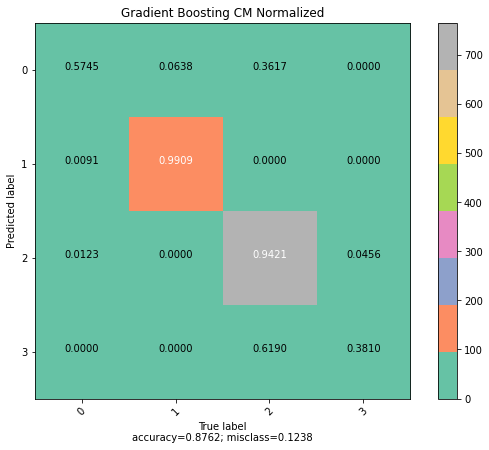

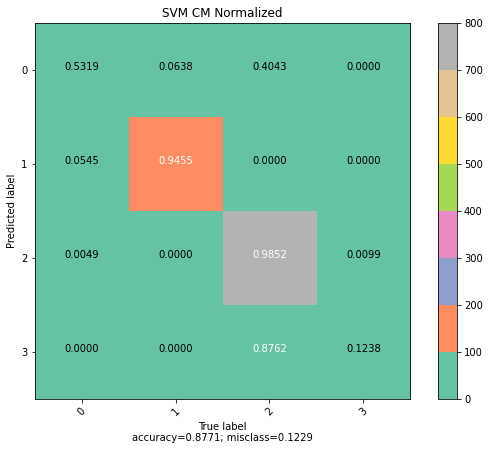

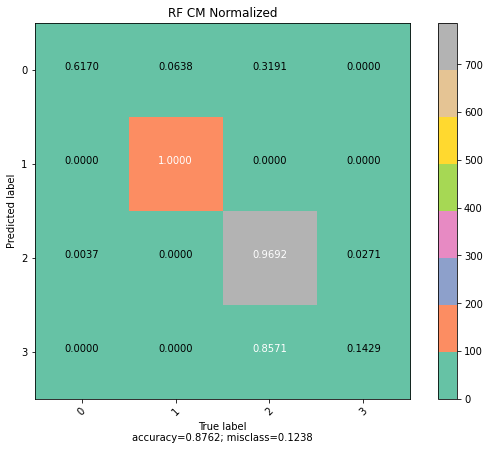

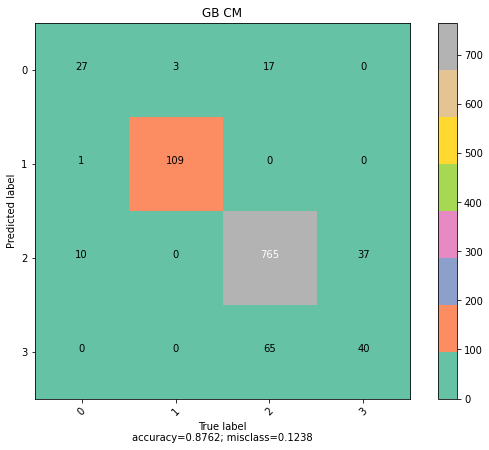

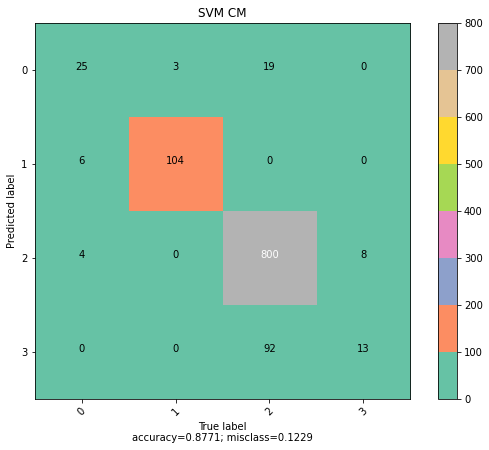

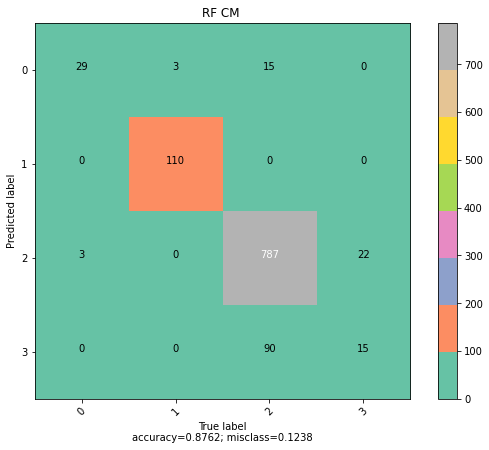

In [ ]:
#set features & targets
X=illinois_df.drop(['Summative Designation'],1)
y= illinois_df['Summative Designation'].astype(int)
y=y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

#run confusion matrix function on top models
predictions = gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Gradient Boosting CM Normalized', cmap ='Set2', normalize = True)

predictions = svm_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'SVM CM Normalized', cmap ='Set2', normalize = True)

predictions = rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'RF CM Normalized', cmap ='Set2', normalize = True)

predictions = gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'GB CM', cmap ='Set2', normalize = False)

predictions = svm_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'SVM CM', cmap ='Set2', normalize = False)

predictions = rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'RF CM ', cmap ='Set2', normalize = False)


Confusion Matrices of Top 3 Focused Models

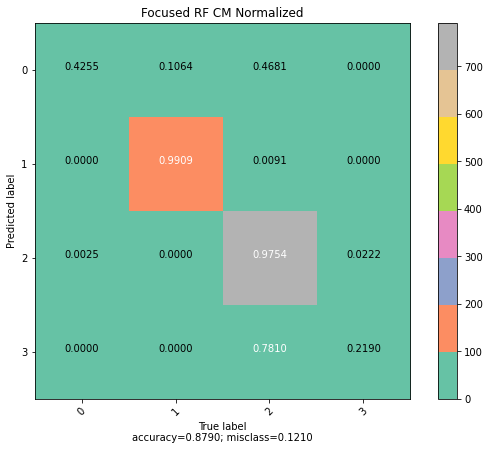

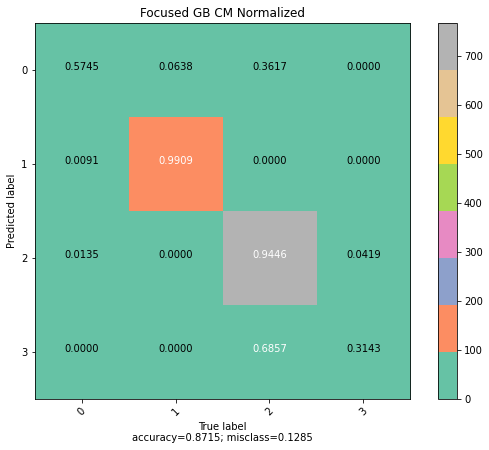

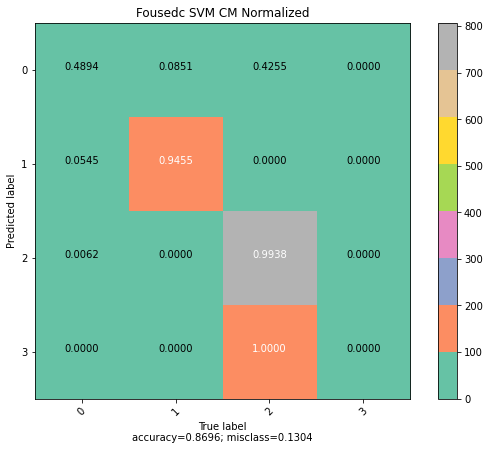

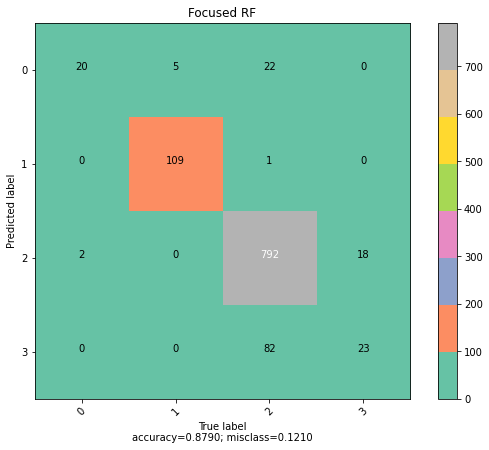

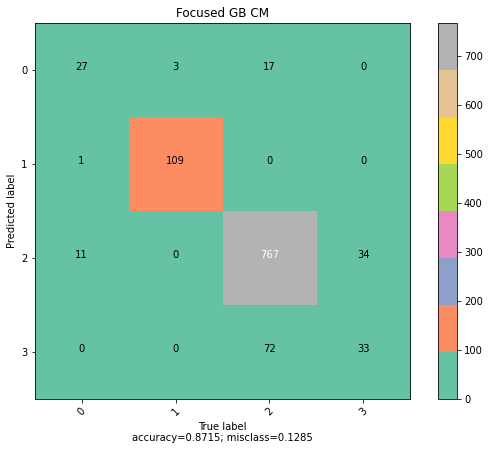

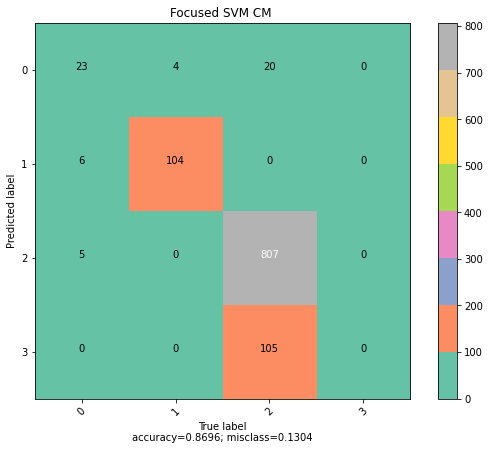

In [ ]:
#set features & targets
X=focused_illinois_df.drop(['Summative Designation'],1)
y= focused_illinois_df['Summative Designation'].astype(int)
y=y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

predictions = foc_rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Focused RF CM Normalized', cmap ='Set2', normalize = True)

predictions = foc_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Focused GB CM Normalized', cmap ='Set2', normalize = True)

predictions = foc_svm_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Fousedc SVM CM Normalized', cmap ='Set2', normalize = True)

predictions = foc_rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Focused RF', cmap ='Set2', normalize = False)

predictions = foc_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Focused GB CM', cmap ='Set2', normalize = False)

predictions = foc_svm_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1', '2', '3'] ,
    title = 'Focused SVM CM ', cmap ='Set2', normalize = False)



Confusion Matrices of Top 3 Log Models

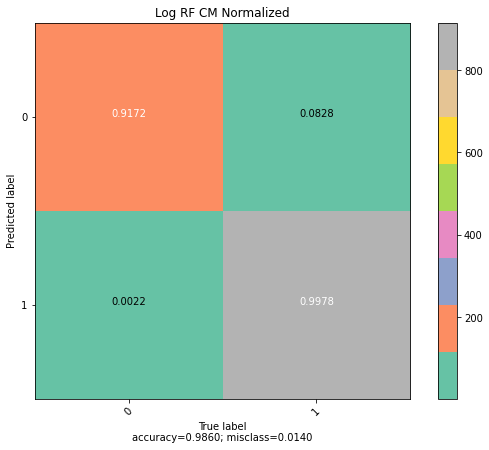

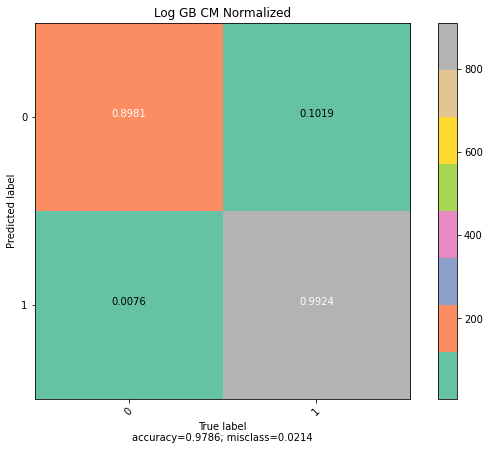

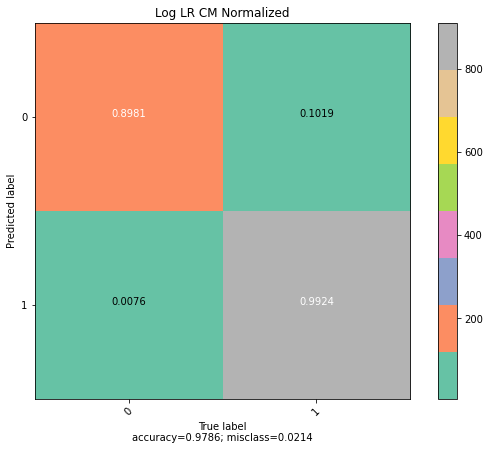

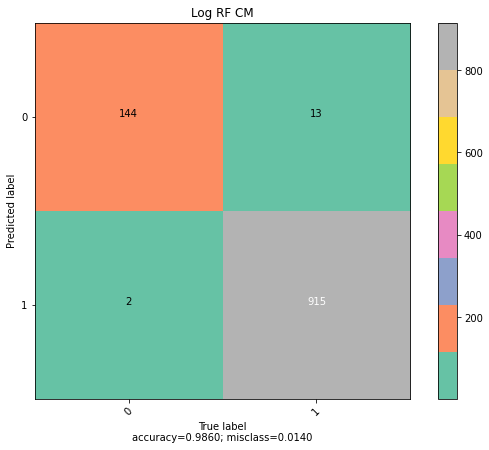

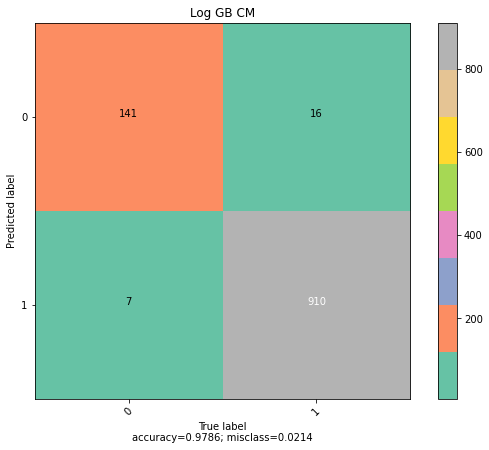

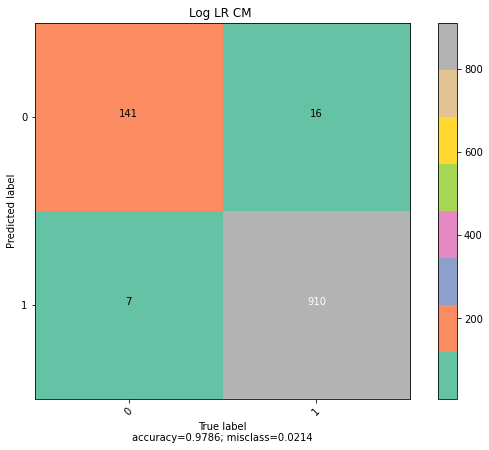

In [ ]:
#set features & targets
X=illinois_df.drop(['Summative Designation'],1)
y= np.log1p(illinois_df['Summative Designation'].astype(int))
y=y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

predictions = log_rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log RF CM Normalized', cmap ='Set2', normalize = True)

predictions = log_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log GB CM Normalized', cmap ='Set2', normalize = True)

predictions = log_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log LR CM Normalized', cmap ='Set2', normalize = True)

predictions = log_rf_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log RF CM', cmap ='Set2', normalize = False)

predictions = log_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log GB CM', cmap ='Set2', normalize = False)

predictions = log_gb_preds
confusion = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm=confusion, target_names =['0', '1'] ,
    title = 'Log LR CM ', cmap ='Set2', normalize = False)

# **Conclusion** <a name="52"></a>

When evaluating performance of models, accuracy of the test sets was first evaluated. And while the log transformed models did have better accuracy, it came at the expense of only having 2 target classes versus the original 4 like I mentioned earlier. 

When looking beyond the log transformed models, the remaining models had anywhere between 78 and 88% accuracy. With the top models being so close in accuracy and precision, a further look into performance by target class was necessary. 

In this study, it is more important to correctly identify the true class of a school rather than correctly identifying the negative class, so a greater emphasis on precision is applicable here. 

Since it’s more desirable for a school to have a higher rating, the best model at predicting those higher ratings was the SVM Classification Model. As you can see it has the highest precision for level 3, the Exemplary Schools, when the other models had a difficult time predicting that rating, and it’s also tied for highest precision at rating 1, the Targeted schools. Finally, the range of precision scores amongst the classes of the SVM model is smaller than the other models and therefore the SVM model was chosen as the best performer. 